In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [19]:
import datetime
import time 
import random

In [20]:
def generate_customer_profile_table(n_customers,random_state=0):
    np.random.seed(random_state)
    customer_id_properties=[]
    
    for customer_id in range(n_customers):
        x_customer_id=np.random.uniform(0,100)
        y_customer_id=np.random.uniform(0,100)
        
        mean_amount=np.random.uniform(5,100)
        std_amount=mean_amount/2
        
        mean_nb_tx_per_day=np.random.uniform(0,4)
        
        customer_id_properties.append([customer_id,x_customer_id,y_customer_id,mean_amount,std_amount,
                                       mean_nb_tx_per_day])
        
        
    customer_profile_table=pd.DataFrame(customer_id_properties,columns=['customer_id','x_customer_id','y_customer_id',
                                                                           'mean_amount','std_amount','mean_nb_tx_per_day'])
    
    return customer_profile_table
        

    
n_customers=5   
customer_profile_table = generate_customer_profile_table(n_customers,random_state=0)
customer_profile_table
        
    


customer_id  x_customer_id  y_customer_id  mean_amount  std_amount  \
0            0      54.881350      71.518937    62.262521   31.131260   
1            1      42.365480      64.589411    46.570785   23.285393   
2            2      96.366276      38.344152    80.213879   40.106939   
3            3      56.804456      92.559664    11.748426    5.874213   
4            4       2.021840      83.261985    78.924891   39.462446   

   mean_nb_tx_per_day  
0            2.179533  
1            3.567092  
2            2.115580  
3            0.348517  
4            3.480049

In [21]:
def generate_terminal_profiles_table(n_terminals,random_state=0):
    np.random.seed(random_state)
    terminal_id_properties=[]
    
    for terminal_id in range(n_terminals):
        x_terminal_id=np.random.uniform(0,100)
        y_terminal_id=np.random.uniform(0,100)
        
        terminal_id_properties.append([terminal_id,x_terminal_id,y_terminal_id])
        
    terminal_profiles_table=pd.DataFrame(terminal_id_properties,columns=['terminal_id','x_terminal_id','y_terminal_id'])
    
    return terminal_profiles_table

n_terminals=5
terminal_profiles_table=generate_terminal_profiles_table(n_terminals,random_state=0)
terminal_profiles_table


terminal_id  x_terminal_id  y_terminal_id
0            0      54.881350      71.518937
1            1      60.276338      54.488318
2            2      42.365480      64.589411
3            3      43.758721      89.177300
4            4      96.366276      38.344152

### Get list of terminals within radius of customers

In [22]:
def get_list_of_terminals_within_radius(customer_profile,x_y_terminals,r):
    
    x_y_customer=customer_profile[['x_customer_id','y_customer_id']].values.astype(float)
    
    sqrd_diff_x_y=np.square(x_y_customer-x_y_terminals)
    
    dist_x_y=np.sqrt(np.sum(sqrd_diff_x_y,axis=1))
    
    available_terminals=list(np.where(dist_x_y<r)[0])
    
    return available_terminals

x_y_terminals=terminal_profiles_table[['x_terminal_id','y_terminal_id']].values.astype(float)
get_list_of_terminals_within_radius(customer_profile_table.iloc[4],x_y_terminals=x_y_terminals,r=50)

[2, 3]

### GRAPH OF TERMINALS AND LOCATION OF LAST CUSTOMER

(0.0, 100.0)

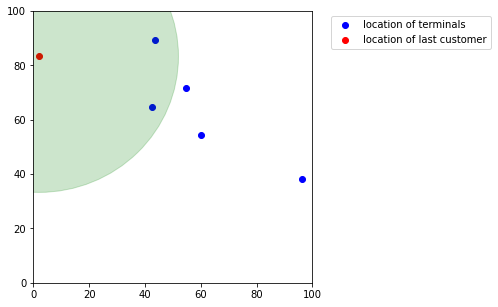

In [23]:
terminals_available_to_customer_fig,ax=plt.subplots(figsize=(5,5))

ax.scatter(terminal_profiles_table.x_terminal_id.values,
          terminal_profiles_table.y_terminal_id.values,
          color='blue',label='location of terminals')

customer_id=4
ax.scatter(customer_profile_table.iloc[customer_id].x_customer_id,
          customer_profile_table.iloc[customer_id].y_customer_id,
          color='red',label='location of last customer')

ax.legend(loc='upper left',bbox_to_anchor=(1.05,1))

circ=plt.Circle((customer_profile_table.iloc[customer_id].x_customer_id,
          customer_profile_table.iloc[customer_id].y_customer_id,
          ),radius=50,color='green',alpha=0.2)

ax.add_patch(circ)

fontsize=50

ax.set_xlim([0,100])
ax.set_ylim([0,100])




In [24]:
customer_profile_table['available_terminals']=customer_profile_table.apply(lambda x:get_list_of_terminals_within_radius(x,x_y_terminals=x_y_terminals,r=50),axis=1)
customer_profile_table

customer_id  x_customer_id  y_customer_id  mean_amount  std_amount  \
0            0      54.881350      71.518937    62.262521   31.131260   
1            1      42.365480      64.589411    46.570785   23.285393   
2            2      96.366276      38.344152    80.213879   40.106939   
3            3      56.804456      92.559664    11.748426    5.874213   
4            4       2.021840      83.261985    78.924891   39.462446   

   mean_nb_tx_per_day available_terminals  
0            2.179533        [0, 1, 2, 3]  
1            3.567092        [0, 1, 2, 3]  
2            2.115580              [1, 4]  
3            0.348517        [0, 1, 2, 3]  
4            3.480049              [2, 3]

In [25]:
def generate_transactions_table(customer_profile,start_date="2018-04-01",nb_days=10):
    
    customer_transactions=[]
    random.seed(int(customer_profile.customer_id))
    np.random.seed(int(customer_profile.customer_id))
    
    for day in range(nb_days):
        
        nb_tx=np.random.poisson(customer_profile.mean_nb_tx_per_day)
        
        if nb_tx>0:
            
            for tx in range(nb_tx):
                time_tx=int(np.random.normal(86400/2,2000))
                
                if(time_tx>0)and (time_tx<86400):
                    amount=np.random.normal(customer_profile.mean_amount,customer_profile.std_amount)
                    
                    if amount<0:
                        np.random.uniform(0,customer_profile.mean_amount*2)
                        
                    amount=np.round(amount,decimals=2)
                    
                    if len(customer_profile.available_terminals)>0:
                        terminal_id=random.choice(customer_profile.available_terminals)
                        
                        customer_transactions.append([time_tx+day*86400,day,customer_profile.customer_id,
                                                     terminal_id,amount])
                        
                        
    customer_transactions=pd.DataFrame(customer_transactions,columns=['TX_TIME_SECONDS','TX_TIME_DAYS','customer_id',
                                                                     'terminal_id','TX_AMOUNT'])
    
    if len(customer_transactions)>0:
        customer_transactions['TX_DateTime']=pd.to_datetime(customer_transactions["TX_TIME_SECONDS"],unit='s' ,origin=start_date)
        customer_transactions=customer_transactions[['TX_DateTime','customer_id','terminal_id','TX_AMOUNT',
                                                    'TX_TIME_SECONDS','TX_TIME_DAYS']]
        
    
    return customer_transactions
                
                    
                    
                    

In [26]:
transaction_table_customer_0=generate_transactions_table(customer_profile_table.iloc[0],start_date="2018-04-01",
                                                        nb_days=5)
transaction_table_customer_0

TX_DateTime  customer_id  terminal_id  TX_AMOUNT  TX_TIME_SECONDS  \
0  2018-04-01 11:31:54            0            3     123.59            41514   
1  2018-04-01 12:42:12            0            3      46.51            45732   
2  2018-04-01 13:24:50            0            0      95.91            48290   
3  2018-04-01 12:16:08            0            2      80.29            44168   
4  2018-04-02 11:27:58            0            3      74.00           127678   
5  2018-04-02 12:01:06            0            3      83.45           129666   
6  2018-04-02 11:07:53            0            2      44.62           126473   
7  2018-04-02 11:51:55            0            3     109.41           129115   
8  2018-04-02 11:48:53            0            2      63.74           128933   
9  2018-04-03 12:59:34            0            1      44.53           219574   
10 2018-04-03 12:05:50            0            1      47.86           216350   
11 2018-04-03 11:23:48            0            2      82.18           213828   
12 2018-04-03 11:47:08            0            1      38.11           215228   
13 2018-04-03 12:33:11            0            0       2.08           217991   
14 2018-04-04 11:43:00            0            2      48.62           301380   
15 2018-04-04 11:18:14            0            1      86.47           299894   
16 2018-04-05 12:10:22            0            2      38.10           389422   
17 2018-04-05 11:49:45            0            0      50.85           388185   

    TX_TIME_DAYS  
0              0  
1              0  
2              0  
3              0  
4              1  
5              1  
6              1  
7              1  
8              1  
9              2  
10             2  
11             2  
12             2  
13             2  
14             3  
15             3  
16             4  
17             4

In [27]:
transactions_df=customer_profile_table.groupby('customer_id').apply(lambda x:generate_transactions_table(x.iloc[0],nb_days=5)).reset_index(drop=True)
transactions_df

TX_DateTime  customer_id  terminal_id  TX_AMOUNT  TX_TIME_SECONDS  \
0  2018-04-01 11:31:54            0            3     123.59            41514   
1  2018-04-01 12:42:12            0            3      46.51            45732   
2  2018-04-01 13:24:50            0            0      95.91            48290   
3  2018-04-01 12:16:08            0            2      80.29            44168   
4  2018-04-02 11:27:58            0            3      74.00           127678   
..                 ...          ...          ...        ...              ...   
62 2018-04-05 12:27:24            4            3      43.41           390444   
63 2018-04-05 12:01:12            4            2     117.23           388872   
64 2018-04-05 11:38:18            4            2      85.04           387498   
65 2018-04-05 11:24:06            4            3      83.52           386646   
66 2018-04-05 11:08:08            4            3     130.51           385688   

    TX_TIME_DAYS  
0              0  
1              0  
2              0  
3              0  
4              1  
..           ...  
62             4  
63             4  
64             4  
65             4  
66             4  

[67 rows x 6 columns]

### Generating DataSet

In [28]:
def generate_dataset(n_customers=100000,n_terminals=10000000,nb_days=90,start_date="2018-04-01",r=5):
    start_time=time.time()
    customer_profile_table=generate_customer_profile_table(n_customers,random_state=0)
    print("Time to generate customer profile table: {0:.2}s ".format(time.time()-start_time))
    
    start_time=time.time()
    terminal_profiles_table=generate_terminal_profiles_table(n_terminals,random_state=1)
    print("Time to generate terminals profile table: {0:.2}s ".format(time.time()-start_time))
    
    start_time=time.time()
    x_y_terminals = terminal_profiles_table[['x_terminal_id','y_terminal_id']].values.astype(float)
    customer_profile_table['available_terminals'] = customer_profile_table.apply(lambda x : get_list_of_terminals_within_radius(x, x_y_terminals=x_y_terminals, r=r), axis=1)
    customer_profile_table['nb_terminals']=customer_profile_table.available_terminals.apply(len)
    print("Time to associate terminals to customers: {0:.2}s".format(time.time()-start_time))
    
    
    start_time=time.time()
    transactions_df=customer_profile_table.groupby('customer_id').apply(lambda x: generate_transactions_table(x.iloc[0],nb_days=nb_days)).reset_index(drop=True)
    print("Time to generate transactions: {0:.2}s ".format(time.time()-start_time))
    
    
    transactions_df=transactions_df.sort_values('TX_DateTime')
    transactions_df.reset_index(inplace=True,drop=True)
    transactions_df.reset_index(inplace=True)
    
    transactions_df.rename(columns={'index':'transaction_id'},inplace=True)
    
    return(customer_profile_table,terminal_profiles_table,transactions_df)
    
        
        

In [29]:
(customer_profile_table, terminal_profiles_table, transactions_df)=\
    generate_dataset(n_customers = 5000, 
                     n_terminals = 1000, 
                     nb_days=800, 
                     start_date="2018-04-01", 
                     r=5000)

Time to generate customer profile table: 0.027s 
Time to generate terminals profile table: 0.004s 
Time to associate terminals to customers: 0.66s
Time to generate transactions: 1.8e+02s 


In [30]:
transactions_df

transaction_id         TX_DateTime customer_id terminal_id  \
0                     0 2018-04-01 10:02:12        2718         222   
1                     1 2018-04-01 10:06:21        3493          16   
2                     2 2018-04-01 10:11:32         839         813   
3                     3 2018-04-01 10:13:17        1561         771   
4                     4 2018-04-01 10:13:50        4877         580   
...                 ...                 ...         ...         ...   
7911319         7911319 2020-06-08 13:50:31         987         241   
7911320         7911320 2020-06-08 13:51:08        4674         677   
7911321         7911321 2020-06-08 13:55:26        3178         578   
7911322         7911322 2020-06-08 13:56:29         375         820   
7911323         7911323 2020-06-08 14:09:26         254         547   

         TX_AMOUNT TX_TIME_SECONDS TX_TIME_DAYS  
0            60.05           36132            0  
1            22.70           36381            0  
2            47.60           36692            0  
3           134.33           36797            0  
4           104.80           36830            0  
...            ...             ...          ...  
7911319      76.05        69083431          799  
7911320      16.31        69083468          799  
7911321      21.46        69083726          799  
7911322      22.32        69083789          799  
7911323      63.27        69084566          799  

[7911324 rows x 7 columns]

/usr/local/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Time (days)'), Text(0, 0.5, 'Number of transactions')]

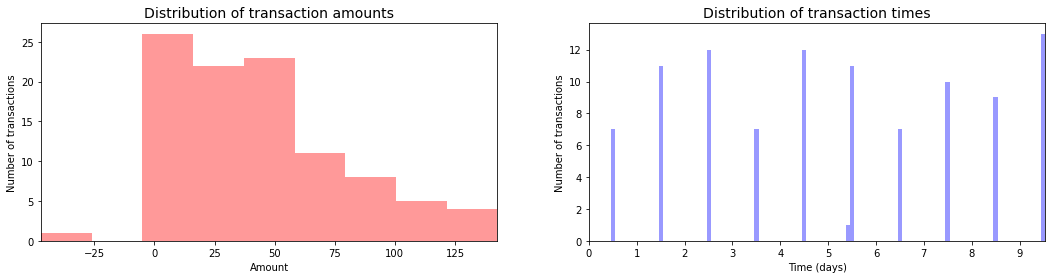

In [31]:
distribution_amount_times_fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = transactions_df[transactions_df.TX_TIME_DAYS<10]['TX_AMOUNT'].sample(n=100).values
time_val = transactions_df[transactions_df.TX_TIME_DAYS<10]['TX_TIME_SECONDS'].sample(n=100).values

sns.distplot(amount_val, ax=ax[0], color='r', hist = True, kde = False)
ax[0].set_title('Distribution of transaction amounts', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set(xlabel = "Amount", ylabel="Number of transactions")


sns.distplot(time_val/86400, ax=ax[1], color='b', bins = 100, hist = True, kde = False)
ax[1].set_title('Distribution of transaction times', fontsize=14)
ax[1].set_xlim([min(time_val/86400), max(time_val/86400)])
ax[1].set_xticks(range(10))
ax[1].set(xlabel = "Time (days)", ylabel="Number of transactions")




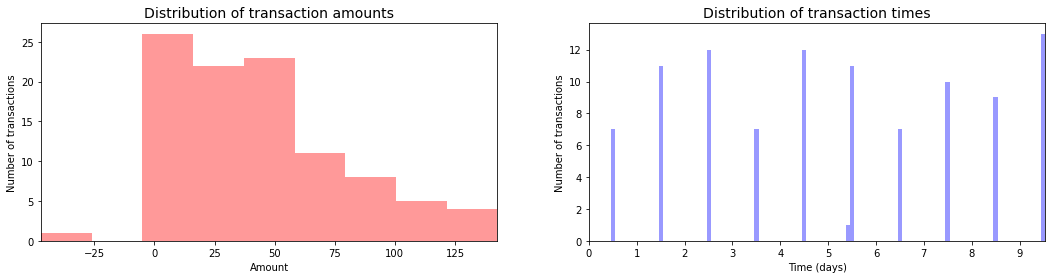

In [32]:
distribution_amount_times_fig

### adding frauds to the dataset

In [33]:
def add_frauds(customer_profile_table, terminal_profiles_table, transactions_df):
    transactions_df['TX_FRAUD']=0
    transactions_df['TX_FRAUD_SCENARIO']=0
    #scenario 1
    transactions_df.loc[transactions_df.TX_AMOUNT>220,'TX_FRAUD']=1
    transactions_df.loc[transactions_df.TX_AMOUNT>220,'TX_FRAUD_SCENARIO']=1
    nb_fraud_scenario_1=transactions_df.TX_FRAUD.sum()
    print("Number of frauds from scenario 1 :",(nb_fraud_scenario_1))
    
    #scenario 2
    
    for day in range(transactions_df.TX_TIME_DAYS.max()):
        
        compromised_terminals=terminal_profiles_table.terminal_id.sample(n=2,random_state=day)
        
        compromised_transactions=transactions_df[(transactions_df.TX_TIME_DAYS>=day)&
                                                (transactions_df.TX_TIME_DAYS<day+20)&
                                                (transactions_df.terminal_id.isin(compromised_terminals))]
        transactions_df.loc[compromised_transactions.index,'TX_FRAUD']=1
        transactions_df.loc[compromised_transactions.index,'TX_FRAUD_SCENARIO']=2
        
    
    nb_fraud_scenario_2=transactions_df.TX_FRAUD.sum()-nb_fraud_scenario_1
    print("Number of frauds from scenario 2 :",(nb_fraud_scenario_2))
    
    #scenario 3
    
    for day in range(transactions_df.TX_TIME_DAYS.max()):
            compromised_customers=customer_profile_table.customer_id.sample(n=3,random_state=day).values
            
            compromised_transactions=transactions_df[(transactions_df.TX_TIME_DAYS>=day)&
                                                (transactions_df.TX_TIME_DAYS<day+10)&
                                                (transactions_df.customer_id.isin(compromised_customers))]
             

            nb_compromised_transactions=len(compromised_transactions)
        
            random.seed(day)
            index_frauds=random.sample(list(compromised_transactions.index.values),k =int(nb_compromised_transactions/3))
        
            transactions_df.loc[index_frauds,'TX_AMOUNT']=transactions_df.loc[index_frauds,'TX_AMOUNT']*5
            transactions_df.loc[index_frauds,'TX_FRAUD']=1
            transactions_df.loc[index_frauds,'TX_FRAUD_SCENARIO']=3
        
    nb_frauds_scenario_3=transactions_df.TX_FRAUD.sum()-nb_fraud_scenario_2-nb_fraud_scenario_1
    print("Number of frauds from scenario 3: ",(nb_frauds_scenario_3))
    
    return transactions_df 
    
    

In [34]:
%time transactions_df=add_frauds(customer_profile_table,terminal_profiles_table,transactions_df)


Number of frauds from scenario 1 : 4267
Number of frauds from scenario 2 : 306849
Number of frauds from scenario 3:  14717
CPU times: user 17min 25s, sys: 36.2 s, total: 18min 1s
Wall time: 18min 3s


In [35]:
transactions_df.TX_FRAUD.mean()

0.04118564730758088

In [36]:
transactions_df.TX_FRAUD.sum()

325833

In [37]:
transactions_df.head()

transaction_id         TX_DateTime customer_id terminal_id  TX_AMOUNT  \
0               0 2018-04-01 10:02:12        2718         222      60.05   
1               1 2018-04-01 10:06:21        3493          16      22.70   
2               2 2018-04-01 10:11:32         839         813      47.60   
3               3 2018-04-01 10:13:17        1561         771     134.33   
4               4 2018-04-01 10:13:50        4877         580     104.80   

  TX_TIME_SECONDS TX_TIME_DAYS  TX_FRAUD  TX_FRAUD_SCENARIO  
0           36132            0         0                  0  
1           36381            0         0                  0  
2           36692            0         0                  0  
3           36797            0         0                  0  
4           36830            0         0                  0

In [38]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==1].shape

(4094, 9)

In [39]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==2].shape

(306387, 9)

In [40]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==3].shape

(15352, 9)

In [41]:
def get_stats(transactions_df):
    nb_tx_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['customer_id'].count()
    nb_frauds_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['TX_FRAUD'].sum()
    nb_fraudcard_per_day=transactions_df[transactions_df['TX_FRAUD']>0].groupby(['TX_TIME_DAYS']).customer_id.nunique()
    return (nb_tx_per_day,nb_frauds_per_day,nb_fraudcard_per_day)

(nb_tx_per_day,nb_frauds_per_day,nb_fraudcard_per_day)=get_stats(transactions_df)
n_days=len(nb_tx_per_day)
tx_stats=pd.DataFrame({'value':pd.concat([nb_tx_per_day/50,nb_frauds_per_day,nb_fraudcard_per_day])})
tx_stats['stat_type']=['nb_tx_per_day']*n_days+['nb_frauds_per_day']*n_days+['nb_fraudcard_per_day']*n_days
tx_stats=tx_stats.reset_index()

In [42]:
%%capture

sns.set(style='darkgrid')
sns.set(font_scale=1.4)

fraud_and_transactions_stats_fig=plt.gcf()
fraud_and_transactions_stats_fig.set_size_inches(15,8)
sns_plot=sns.lineplot(x='TX_TIME_DAYS',y='value',data=tx_stats,hue='stat_type',hue_order=['nb_tx_per_day','nb_frauds_per_day','nb_fraudcard_per_day'],legend=False)
sns_plot.set(xlabel='Number of days since data generation',ylabel='Number')
sns_plot.set_ylim([0,300])
labels_legend=['transactions per day (/50)','frauds per day','fraudcards per day']
sns_plot.legend(loc='upper left',labels=labels_legend,bbox_to_anchor=(1.05,1),fontsize=15)


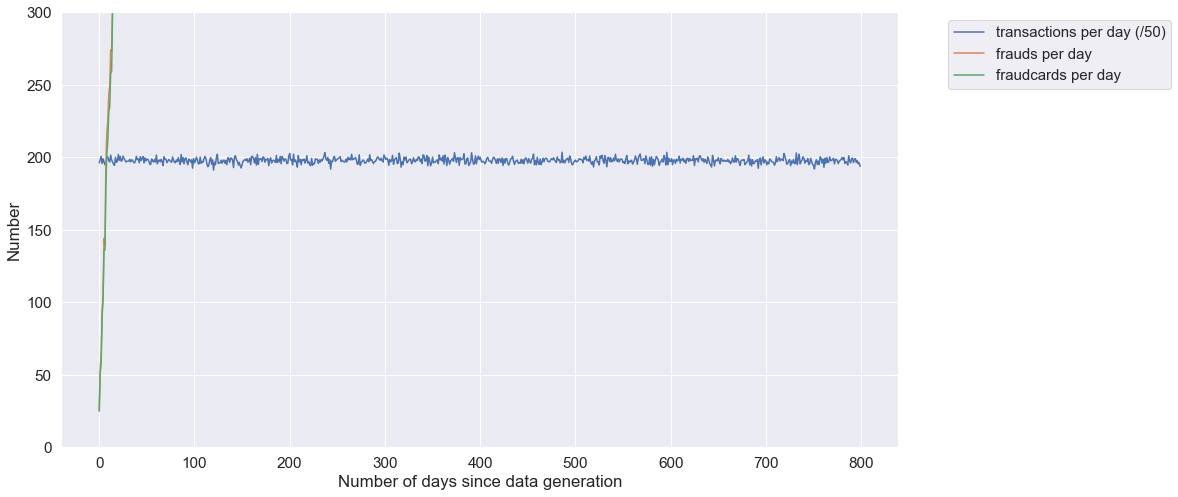

In [43]:
fraud_and_transactions_stats_fig

In [44]:
import os

### Saving the Dataset

In [45]:
DIR_OUTPUT = "./simulated-data-raw/"

if not os.path.exists(DIR_OUTPUT):
    os.makedirs(DIR_OUTPUT)

start_date = datetime.datetime.strptime("2018-04-01", "%Y-%m-%d")

for day in range(transactions_df.TX_TIME_DAYS.max()+1):
    
    transactions_day = transactions_df[transactions_df.TX_TIME_DAYS==day].sort_values('TX_TIME_SECONDS')
    
    date = start_date + datetime.timedelta(days=day)
    filename_output = date.strftime("%Y-%m-%d")+'.pkl'
    
    
    transactions_day.to_pickle(DIR_OUTPUT+filename_output, protocol=4)

In [46]:



if not os.path.exists("simulated-data-raw"):
    !git clone https://github.com/Fraud-Detection-Handbook/simulated-data-raw

In [47]:
DIR_INPUT='./simulated-data-raw/data/' 

BEGIN_DATE = "2018-04-01"
END_DATE = "2018-09-30"

print("Load  files")
%time transactions_df=read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)
print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))

Load  files


NameError: name 'read_from_files' is not defined

7911324 transactions loaded, containing 325833 fraudulent transactions


In [48]:
transactions_df.head()

transaction_id         TX_DateTime customer_id terminal_id  TX_AMOUNT  \
0               0 2018-04-01 10:02:12        2718         222      60.05   
1               1 2018-04-01 10:06:21        3493          16      22.70   
2               2 2018-04-01 10:11:32         839         813      47.60   
3               3 2018-04-01 10:13:17        1561         771     134.33   
4               4 2018-04-01 10:13:50        4877         580     104.80   

  TX_TIME_SECONDS TX_TIME_DAYS  TX_FRAUD  TX_FRAUD_SCENARIO  
0           36132            0         0                  0  
1           36381            0         0                  0  
2           36692            0         0                  0  
3           36797            0         0                  0  
4           36830            0         0                  0

In [49]:
def is_weekend(tx_datetime):
    weekday=tx_datetime.weekday()
    is_weekend=weekday>=5
    return int(is_weekend)
    
    

In [50]:
%time transactions_df['TX_WEEKEND']=transactions_df.TX_DateTime.apply(is_weekend)

CPU times: user 12.4 s, sys: 275 ms, total: 12.6 s
Wall time: 12.7 s


In [51]:
def is_night(tx_datetime):
    tx_hour=tx_datetime.hour
    is_night=tx_hour<=6
    return int(is_night)
    

In [52]:
%time transactions_df['TX_NIGHT']=transactions_df.TX_DateTime.apply(is_night)

CPU times: user 11.7 s, sys: 216 ms, total: 11.9 s
Wall time: 11.9 s


In [53]:
transactions_df[transactions_df.TX_TIME_DAYS>=30]

transaction_id         TX_DateTime customer_id terminal_id  \
297067           297067 2018-05-01 09:45:44        3616         597   
297068           297068 2018-05-01 10:00:53         291         718   
297069           297069 2018-05-01 10:02:40        2971         170   
297070           297070 2018-05-01 10:04:20         267         408   
297071           297071 2018-05-01 10:04:24        4075         341   
...                 ...                 ...         ...         ...   
7911319         7911319 2020-06-08 13:50:31         987         241   
7911320         7911320 2020-06-08 13:51:08        4674         677   
7911321         7911321 2020-06-08 13:55:26        3178         578   
7911322         7911322 2020-06-08 13:56:29         375         820   
7911323         7911323 2020-06-08 14:09:26         254         547   

         TX_AMOUNT TX_TIME_SECONDS TX_TIME_DAYS  TX_FRAUD  TX_FRAUD_SCENARIO  \
297067      118.32         2627144           30         0                  0   
297068       -7.77         2628053           30         0                  0   
297069       55.09         2628160           30         0                  0   
297070        8.49         2628260           30         0                  0   
297071       49.16         2628264           30         0                  0   
...            ...             ...          ...       ...                ...   
7911319      76.05        69083431          799         0                  0   
7911320      16.31        69083468          799         0                  0   
7911321      21.46        69083726          799         0                  0   
7911322      22.32        69083789          799         0                  0   
7911323      63.27        69084566          799         1                  2   

         TX_WEEKEND  TX_NIGHT  
297067            0         0  
297068            0         0  
297069            0         0  
297070            0         0  
297071            0         0  
...             ...       ...  
7911319           0         0  
7911320           0         0  
7911321           0         0  
7911322           0         0  
7911323           0         0  

[7614257 rows x 11 columns]

In [54]:
def get_customer_spending_behaviour_features(customer_transactions,windows_size_in_days=[1,7,30]):
    customer_transactions=customer_transactions.sort_values('TX_DateTime')
    customer_transactions.index=customer_transactions.TX_DateTime
    
    for window_size in windows_size_in_days:
        sum_amount_transactions_window=customer_transactions['TX_AMOUNT'].rolling(str(window_size)+'d').sum()
        nb_tx_window=customer_transactions['TX_AMOUNT'].rolling(str(window_size)+'d').count()  
        
        avg_amount_transactions_window=sum_amount_transactions_window/nb_tx_window
        
        customer_transactions['CUSTOMER_ID_NB_TX'+str(window_size)+'DAY_WINDOW']=list(nb_tx_window)
        customer_transactions['CUSTOMER_ID_AVG_AMOUNT'+str(window_size)+'DAY_WINDOW ']=list(avg_amount_transactions_window)
        
        
    customer_transactions.index=customer_transactions.transaction_id
    
    return customer_transactions
        

In [55]:
spending_behaviour_customer_0=get_customer_spending_behaviour_features(transactions_df[transactions_df.customer_id==0])
spending_behaviour_customer_0

transaction_id         TX_DateTime customer_id terminal_id  \
transaction_id                                                               
1928                      1928 2018-04-01 11:31:54           0         864   
6709                      6709 2018-04-01 12:16:08           0         911   
8783                      8783 2018-04-01 12:42:12           0         394   
9742                      9742 2018-04-01 13:24:50           0         776   
10416                    10416 2018-04-02 11:07:53           0         265   
...                        ...                 ...         ...         ...   
7885869                7885869 2020-06-06 11:50:37           0         765   
7886905                7886905 2020-06-06 11:59:35           0         743   
7887513                7887513 2020-06-06 12:04:41           0         322   
7897640                7897640 2020-06-07 12:08:20           0         984   
7906803                7906803 2020-06-08 12:03:37           0         255   

                TX_AMOUNT TX_TIME_SECONDS TX_TIME_DAYS  TX_FRAUD  \
transaction_id                                                     
1928               123.59           41514            0         0   
6709                80.29           44168            0         0   
8783                46.51           45732            0         0   
9742                95.91           48290            0         0   
10416               44.62          126473            1         0   
...                   ...             ...          ...       ...   
7885869             98.98        68903437          797         0   
7886905             54.99        68903975          797         0   
7887513             35.64        68904281          797         0   
7897640             82.15        68990900          798         0   
7906803            137.73        69077017          799         0   

                TX_FRAUD_SCENARIO  TX_WEEKEND  TX_NIGHT  \
transaction_id                                            
1928                            0           1         0   
6709                            0           1         0   
8783                            0           1         0   
9742                            0           1         0   
10416                           0           0         0   
...                           ...         ...       ...   
7885869                         0           1         0   
7886905                         0           1         0   
7887513                         0           1         0   
7897640                         0           1         0   
7906803                         0           0         0   

                CUSTOMER_ID_NB_TX1DAY_WINDOW  \
transaction_id                                 
1928                                     1.0   
6709                                     2.0   
8783                                     3.0   
9742                                     4.0   
10416                                    5.0   
...                                      ...   
7885869                                  4.0   
7886905                                  5.0   
7887513                                  6.0   
7897640                                  1.0   
7906803                                  2.0   

                CUSTOMER_ID_AVG_AMOUNT1DAY_WINDOW   \
transaction_id                                       
1928                                    123.590000   
6709                                    101.940000   
8783                                     83.463333   
9742                                     86.575000   
10416                                    78.184000   
...                                            ...   
7885869                                  48.510000   
7886905                                  49.806000   
7887513                                  47.445000   
7897640                                  82.150000   
7906803                                 109.940000   

                CUST

In [56]:
%time transactions_df=transactions_df.groupby('customer_id').apply(lambda x: get_customer_spending_behaviour_features(x, windows_size_in_days=[1,7,30]))
transactions_df=transactions_df.sort_values('TX_DateTime').reset_index(drop=True)

CPU times: user 19.7 s, sys: 2.1 s, total: 21.8 s
Wall time: 22.9 s


In [57]:
transactions_df

transaction_id         TX_DateTime customer_id terminal_id  \
0                     0 2018-04-01 10:02:12        2718         222   
1                     1 2018-04-01 10:06:21        3493          16   
2                     2 2018-04-01 10:11:32         839         813   
3                     3 2018-04-01 10:13:17        1561         771   
4                     4 2018-04-01 10:13:50        4877         580   
...                 ...                 ...         ...         ...   
7911319         7911319 2020-06-08 13:50:31         987         241   
7911320         7911320 2020-06-08 13:51:08        4674         677   
7911321         7911321 2020-06-08 13:55:26        3178         578   
7911322         7911322 2020-06-08 13:56:29         375         820   
7911323         7911323 2020-06-08 14:09:26         254         547   

         TX_AMOUNT TX_TIME_SECONDS TX_TIME_DAYS  TX_FRAUD  TX_FRAUD_SCENARIO  \
0            60.05           36132            0         0                  0   
1            22.70           36381            0         0                  0   
2            47.60           36692            0         0                  0   
3           134.33           36797            0         0                  0   
4           104.80           36830            0         0                  0   
...            ...             ...          ...       ...                ...   
7911319      76.05        69083431          799         0                  0   
7911320      16.31        69083468          799         0                  0   
7911321      21.46        69083726          799         0                  0   
7911322      22.32        69083789          799         0                  0   
7911323      63.27        69084566          799         1                  2   

         TX_WEEKEND  TX_NIGHT  CUSTOMER_ID_NB_TX1DAY_WINDOW  \
0                 1         0                           1.0   
1                 1         0                           1.0   
2                 1         0                           1.0   
3                 1         0                           1.0   
4                 1         0                           1.0   
...             ...       ...                           ...   
7911319           0         0                           3.0   
7911320           0         0                           5.0   
7911321           0         0                           4.0   
7911322           0         0                           2.0   
7911323           0         0                           5.0   

         CUSTOMER_ID_AVG_AMOUNT1DAY_WINDOW   CUSTOMER_ID_NB_TX7DAY_WINDOW  \
0                                 60.050000                           1.0   
1                                 22.700000                           1.0   
2                                 47.600000                           1.0   
3                                134.330000                           1.0   
4                                104.800000                           1.0   
...                                     ...                           ...   
7911319                           44.006667                          22.0   
7911320                           24.394000                          27.0   
7911321                            7.415000                          12.0   
7911322                           27.830000                          10.0   
7911323                           76.590000                          22.0   

         CUSTOMER_ID_AVG_AMOUNT7DAY_WINDOW   CUSTOMER_ID_NB_TX30DAY_WINDOW  \
0                                 60.050000                            1.0   
1                                 22.700000                            1.0   
2                                 47.600000                            1.0   
3                                134.330000                            1.0   
4                                104.800000                            1.0   
...                                     ...  

In [58]:
def get_count_risk_rolling_window(terminal_transactions, delay_period=7, windows_size_in_days=[1,7,30], feature="terminal_id"):
    
    terminal_transactions=terminal_transactions.sort_values('TX_DateTime')
    
    terminal_transactions.index=terminal_transactions.TX_DateTime
    
    nb_fraud_delay=terminal_transactions['TX_FRAUD'].rolling(str(delay_period)+'d').sum()
    nb_tx_delay=terminal_transactions['TX_FRAUD'].rolling(str(delay_period)+'d').count()
    
    for window_size in windows_size_in_days:
    
        nb_fraud_delay_window=terminal_transactions['TX_FRAUD'].rolling(str(delay_period+window_size)+'d').sum()
        nb_tx_delay_window=terminal_transactions['TX_FRAUD'].rolling(str(delay_period+window_size)+'d').count()
        nb_fraud_window=nb_fraud_delay_window-nb_fraud_delay
        nb_tx_window=nb_tx_delay_window-nb_tx_delay
        
        risk_window=nb_fraud_window/nb_tx_window
    
       
        
        terminal_transactions[feature+'_NB_TX_'+str(window_size)+'DAY_WINDOW']=list(nb_tx_window)
        terminal_transactions[feature+'_RISK_'+str(window_size)+'DAY_WINDOW']=list(risk_window)
        
    terminal_transactions.index=terminal_transactions.transaction_id
    
    # Replace NA values with 0 (all undefined risk scores where NB_TX_WINDOW is 0) 
    terminal_transactions.fillna(0,inplace=True)
    
    return terminal_transactions

In [59]:
transactions_df[transactions_df.TX_FRAUD==1]


transaction_id         TX_DateTime customer_id terminal_id  \
461                 461 2018-04-01 11:04:01        4451         859   
1406               1406 2018-04-01 11:24:58        4261         993   
1475               1475 2018-04-01 11:25:50        3988         993   
1660               1660 2018-04-01 11:28:38        1428         993   
1734               1735 2018-04-01 11:29:29        3902         859   
...                 ...                 ...         ...         ...   
7911210         7911210 2020-06-08 13:16:16        1380          63   
7911222         7911222 2020-06-08 13:18:33        2924         355   
7911300         7911300 2020-06-08 13:35:44         651         380   
7911302         7911303 2020-06-08 13:36:01        2367         823   
7911323         7911323 2020-06-08 14:09:26         254         547   

         TX_AMOUNT TX_TIME_SECONDS TX_TIME_DAYS  TX_FRAUD  TX_FRAUD_SCENARIO  \
461          74.08           39841            0         1                  2   
1406         25.27           41098            0         1                  2   
1475         23.05           41150            0         1                  2   
1660          2.01           41318            0         1                  2   
1734         18.29           41369            0         1                  2   
...            ...             ...          ...       ...                ...   
7911210      13.07        69081376          799         1                  2   
7911222      43.90        69081513          799         1                  2   
7911300      98.43        69082544          799         1                  2   
7911302       4.06        69082561          799         1                  2   
7911323      63.27        69084566          799         1                  2   

         TX_WEEKEND  TX_NIGHT  CUSTOMER_ID_NB_TX1DAY_WINDOW  \
461               1         0                           1.0   
1406              1         0                           1.0   
1475              1         0                           1.0   
1660              1         0                           1.0   
1734              1         0                           1.0   
...             ...       ...                           ...   
7911210           0         0                           8.0   
7911222           0         0                           2.0   
7911300           0         0                           4.0   
7911302           0         0                           2.0   
7911323           0         0                           5.0   

         CUSTOMER_ID_AVG_AMOUNT1DAY_WINDOW   CUSTOMER_ID_NB_TX7DAY_WINDOW  \
461                                 74.0800                           1.0   
1406                                25.2700                           1.0   
1475                                23.0500                           1.0   
1660                                 2.0100                           1.0   
1734                                18.2900                           1.0   
...                                     ...                           ...   
7911210                              8.1125                          26.0   
7911222                             46.0700                          21.0   
7911300                             62.2975                          28.0   
7911302                             14.2450                          26.0   
7911323                             76.5900                          22.0   

         CUSTOMER_ID_AVG_AMOUNT7DAY_WINDOW   CUSTOMER_ID_NB_TX30DAY_WINDOW  \
461                               74.080000                            1.0   
1406                              25.270000                            1.0   
1475                              23.050000                            1.0   
1660                               2.010000                            1.0   
1734                              18.290000                            1.0   
...                                     ...  

In [60]:
transactions_df[transactions_df.TX_FRAUD==0].terminal_id[0]

222

In [61]:
get_count_risk_rolling_window(transactions_df[transactions_df.terminal_id==3059], delay_period=7, windows_size_in_days=[1,7,30])

Empty DataFrame
Columns: [transaction_id, TX_DateTime, customer_id, terminal_id, TX_AMOUNT, TX_TIME_SECONDS, TX_TIME_DAYS, TX_FRAUD, TX_FRAUD_SCENARIO, TX_WEEKEND, TX_NIGHT, CUSTOMER_ID_NB_TX1DAY_WINDOW, CUSTOMER_ID_AVG_AMOUNT1DAY_WINDOW , CUSTOMER_ID_NB_TX7DAY_WINDOW, CUSTOMER_ID_AVG_AMOUNT7DAY_WINDOW , CUSTOMER_ID_NB_TX30DAY_WINDOW, CUSTOMER_ID_AVG_AMOUNT30DAY_WINDOW , terminal_id_NB_TX_1DAY_WINDOW, terminal_id_RISK_1DAY_WINDOW, terminal_id_NB_TX_7DAY_WINDOW, terminal_id_RISK_7DAY_WINDOW, terminal_id_NB_TX_30DAY_WINDOW, terminal_id_RISK_30DAY_WINDOW]
Index: []

[0 rows x 23 columns]

In [62]:
%time transactions_df=transactions_df.groupby('terminal_id').apply(lambda x: get_count_risk_rolling_window(x, delay_period=7, windows_size_in_days=[1,7,30], feature="terminal_id"))
transactions_df=transactions_df.sort_values('TX_DateTime').reset_index(drop=True)

CPU times: user 33.2 s, sys: 2.05 s, total: 35.3 s
Wall time: 36.3 s


In [63]:
transactions_df

transaction_id         TX_DateTime  customer_id  terminal_id  \
0                     0 2018-04-01 10:02:12         2718          222   
1                     1 2018-04-01 10:06:21         3493           16   
2                     2 2018-04-01 10:11:32          839          813   
3                     3 2018-04-01 10:13:17         1561          771   
4                     4 2018-04-01 10:13:50         4877          580   
...                 ...                 ...          ...          ...   
7911319         7911319 2020-06-08 13:50:31          987          241   
7911320         7911320 2020-06-08 13:51:08         4674          677   
7911321         7911321 2020-06-08 13:55:26         3178          578   
7911322         7911322 2020-06-08 13:56:29          375          820   
7911323         7911323 2020-06-08 14:09:26          254          547   

         TX_AMOUNT  TX_TIME_SECONDS  TX_TIME_DAYS  TX_FRAUD  \
0            60.05            36132             0         0   
1            22.70            36381             0         0   
2            47.60            36692             0         0   
3           134.33            36797             0         0   
4           104.80            36830             0         0   
...            ...              ...           ...       ...   
7911319      76.05         69083431           799         0   
7911320      16.31         69083468           799         0   
7911321      21.46         69083726           799         0   
7911322      22.32         69083789           799         0   
7911323      63.27         69084566           799         1   

         TX_FRAUD_SCENARIO  TX_WEEKEND  ...  CUSTOMER_ID_NB_TX7DAY_WINDOW  \
0                        0           1  ...                           1.0   
1                        0           1  ...                           1.0   
2                        0           1  ...                           1.0   
3                        0           1  ...                           1.0   
4                        0           1  ...                           1.0   
...                    ...         ...  ...                           ...   
7911319                  0           0  ...                          22.0   
7911320                  0           0  ...                          27.0   
7911321                  0           0  ...                          12.0   
7911322                  0           0  ...                          10.0   
7911323                  2           0  ...                          22.0   

         CUSTOMER_ID_AVG_AMOUNT7DAY_WINDOW   CUSTOMER_ID_NB_TX30DAY_WINDOW  \
0                                 60.050000                            1.0   
1                                 22.700000                            1.0   
2                                 47.600000                            1.0   
3                                134.330000                            1.0   
4                                104.800000                            1.0   
...                                     ...                            ...   
7911319                           41.263182                           93.0   
7911320                           26.732593                          115.0   
7911321                           12.356667                           60.0   
7911322                           33.220000                           46.0   
7911323                           59.223182                           99.0   

         CUSTOMER_ID_AVG_AMOUNT30DAY_WINDOW   terminal_id_NB_TX_1DAY_WINDOW  \
0                                  60.050000                            0.0   
1                                  22.700000                            0.0   
2                                  47.600000                            0.0   
3                                 134.330000                            0.0   
4                                 104.800000                            0.0   
...                                    

In [64]:
DIR_OUTPUT = "./simulated-data-transformed/"

if not os.path.exists(DIR_OUTPUT):
    os.makedirs(DIR_OUTPUT)

start_date = datetime.datetime.strptime("2018-04-01", "%Y-%m-%d")

for day in range(transactions_df.TX_TIME_DAYS.max()+1):
    
    transactions_day = transactions_df[transactions_df.TX_TIME_DAYS==day].sort_values('TX_TIME_SECONDS')
    
    date = start_date + datetime.timedelta(days=day)
    filename_output = date.strftime("%Y-%m-%d")+'.pkl'
    

    transactions_day.to_pickle(DIR_OUTPUT+filename_output, protocol=4)



In [65]:
if not os.path.exists("simulated-data-transformed"):
    !git clone https://github.com/Fraud-Detection-Handbook/simulated-data-transformed
        

In [66]:
DIR_INPUT='./simulated-data-transformed/data/' 

BEGIN_DATE = "2018-07-25"
END_DATE = "2018-08-14"

print("Load  files")
%time transactions_df=read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)
print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))

Load  files


NameError: name 'read_from_files' is not defined

7911324 transactions loaded, containing 325833 fraudulent transactions


### Training and Testing set

In [67]:
def get_tx_stats(transactions_df,start_date_df='2018-04-01'):
    
    nb_tx_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['customer_id'].count()
    
    nb_fraud_tx_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['TX_FRAUD'].sum()
    
    nb_compromised_cards_per_day=transactions_df[transactions_df['TX_FRAUD']==1].groupby(['TX_TIME_DAYS']).customer_id.nunique()
    
    tx_stats=pd.DataFrame({"nb_tx_per_day":nb_tx_per_day,
                          "nb_fraud_tx_per_day":nb_fraud_tx_per_day,
                          "nb_compromised_cards_per_day":nb_compromised_cards_per_day})
    
    tx_stats=tx_stats.reset_index()
    
    start_date=datetime.datetime.strptime(start_date_df,'%Y-%m-%d')
    tx_date=start_date+tx_stats['TX_TIME_DAYS'].apply(datetime.timedelta)
    
    tx_stats['tx_date']=tx_date
    
    return tx_stats

tx_stats=get_tx_stats(transactions_df,start_date_df="2018-04-01")
    
    

In [68]:
%%capture

def get_template_tx_stats(ax,fs,
                         start_date_training,
                         title='',
                         delta_train=7,
                         delta_delay=7,
                         delta_test=7,
                         ylim=300):
    ax.set_title(title,fontsize=fs*1.5)
    ax.set_ylim([0,ylim])
    
    ax.set_xlabel('Date',fontsize=fs)
    ax.set_ylabel('Number',fontsize=fs)
    
    plt.yticks(fontsize=fs*0.7)
    plt.xticks(fontsize=fs*0.7)
    
    ax.axvline(start_date_training+datetime.timedelta(days=delta_train),0,ylim,color='black')
    ax.axvline(start_date_test,0,ylim,color='black')
        
    ax.text(start_date_training+datetime.timedelta(days=2), ylim-20,'Training period', fontsize=fs)
    ax.text(start_date_training+datetime.timedelta(days=delta_train+2), ylim-40,'Delay period', fontsize=fs)
    ax.text(start_date_training+datetime.timedelta(days=delta_train+delta_delay+2), ylim-60,'Test period', fontsize=fs)
    
cmap=plt.get_cmap('jet')
colors={'nb_tx_per_day':cmap(0),
           'nb_fraud_tx_per_day':cmap(200),
           'nb_compromised_cards_per_day':cmap(250)}

fraud_and_transactions_stats_fig,ax=plt.subplots(1,1,figsize=(15,8))
    
    #Training period
    
start_date_training=datetime.datetime.strptime("2018-07-25","%Y-%m-%d")
delta_train=delta_test=delta_delay=7
    
end_date_training=start_date_training+datetime.timedelta(days=delta_train-1)
    
    #Testing Period
    
start_date_test=start_date_training+datetime.timedelta(days=delta_train+delta_delay)
end_date_test=start_date_training+datetime.timedelta(days=delta_train+delta_delay+delta_test-1)
    
get_template_tx_stats(ax,fs=20,
                      start_date_training=start_date_training,
                         title='Number of transactions per day \n Number of fraudulent transactions \n Number of compromised transactions',
                         delta_train=delta_train,
                         delta_delay=delta_delay,
                         delta_test=delta_test
                         )
    
ax.plot(tx_stats['tx_date'], tx_stats['nb_tx_per_day']/50, 'b', color=colors['nb_tx_per_day'], label = '# transactions per day (/50)')
ax.plot(tx_stats['tx_date'], tx_stats['nb_fraud_tx_per_day'], 'b', color=colors['nb_fraud_tx_per_day'], label = '#number of fraudulent transactions')
ax.plot(tx_stats['tx_date'], tx_stats['nb_compromised_cards_per_day'], 'b', color=colors['nb_compromised_cards_per_day'], label = '# number of compromised cards')

ax.legend(loc = 'upper left',bbox_to_anchor=(1.05, 1),fontsize=20)


    

    

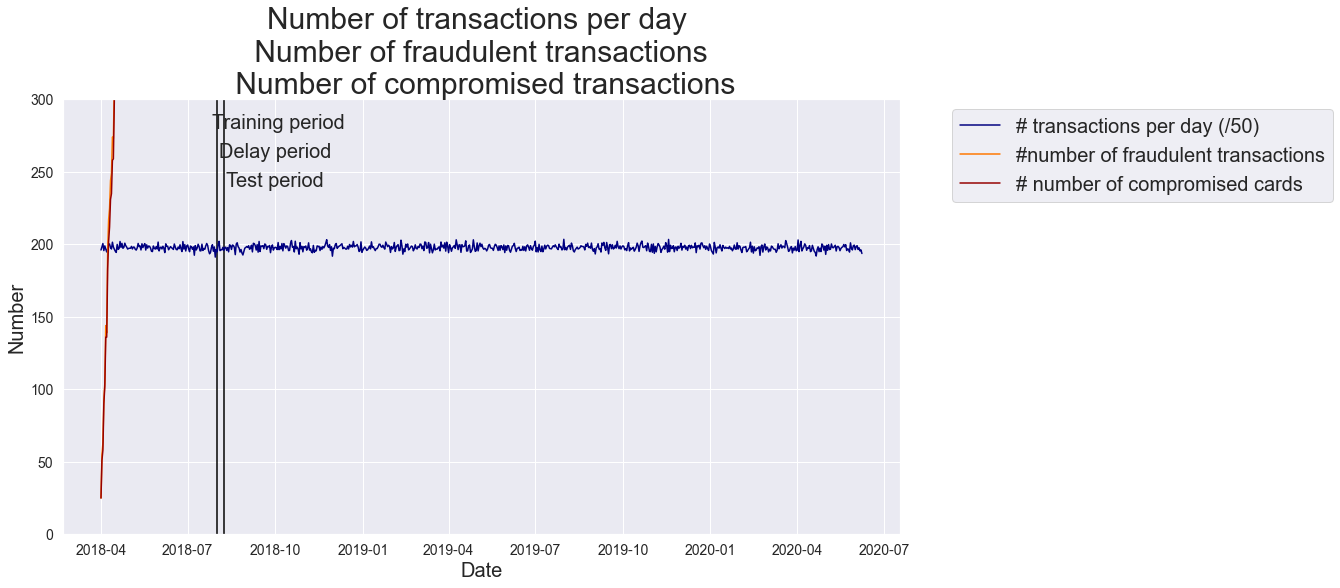

In [69]:
fraud_and_transactions_stats_fig

In [70]:
def get_train_test_set(transactions_df,start_date_training,
                      delta_train=7,
                      delta_delay=7,
                      delta_test=7):
    train_df=transactions_df[(transactions_df.TX_DateTime>=start_date_training)&
                            (transactions_df.TX_DateTime<start_date_training+datetime.timedelta(days=delta_train))]
    
    test_df=[]
    # to get the known frauds before delay 
    known_defrauded_customers=set(train_df[train_df.TX_FRAUD==1].customer_id)
    
    start_tx_time_days_training=train_df.TX_TIME_DAYS.min()
    
    for day in range(delta_test):
        test_df_day=transactions_df[transactions_df.TX_TIME_DAYS==start_tx_time_days_training+delta_train+delta_delay+day]
        
        test_df_day_delay_period=transactions_df[transactions_df.TX_TIME_DAYS==start_tx_time_days_training+delta_train+day-1]
        
        new_defrauded_customers=set(test_df_day_delay_period[test_df_day_delay_period.TX_FRAUD==1].customer_id)
        known_defrauded_customers=known_defrauded_customers.union(new_defrauded_customers)
        
        test_df_day=test_df_day[~test_df_day.customer_id.isin(known_defrauded_customers)]
        
        test_df.append(test_df_day)
        
    
    test_df=pd.concat(test_df)
    
    train_df=train_df.sort_values('transaction_id')
    test_df=test_df.sort_values('transaction_id')
    
    return (train_df,test_df)





    
        
        
    
    
    

In [71]:
(train_df,test_df)=get_train_test_set(transactions_df,start_date_training,
                                     delta_train=7,delta_delay=7,delta_test=7)

In [72]:
train_df.shape

(68677, 23)

In [73]:
train_df[train_df.TX_FRAUD==1].shape

(2964, 23)

In [74]:
test_df.shape

(26051, 23)

In [75]:
test_df[test_df.TX_FRAUD==1].shape

(1050, 23)

### MODEL TRAINING

In [76]:
output_feature="TX_FRAUD"
input_features=['TX_AMOUNT','TX_WEEKEND', 'TX_NIGHT', 'CUSTOMER_ID_NB_TX1DAY_WINDOW', 
                'CUSTOMER_ID_AVG_AMOUNT1DAY_WINDOW ',
       'CUSTOMER_ID_NB_TX7DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT7DAY_WINDOW ',
       'CUSTOMER_ID_NB_TX30DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT30DAY_WINDOW ',
       'terminal_id_NB_TX_1DAY_WINDOW', 'terminal_id_RISK_1DAY_WINDOW',
       'terminal_id_NB_TX_7DAY_WINDOW', 'terminal_id_RISK_7DAY_WINDOW',
       'terminal_id_NB_TX_30DAY_WINDOW', 'terminal_id_RISK_30DAY_WINDOW']


In [77]:
def scaleData(train,test,features):
    scaler = sklearn.preprocessing.StandardScaler()
    scaler.fit(train[features])
    train[features]=scaler.transform(train[features])
    test[features]=scaler.transform(test[features])
    
    return (train,test)

In [78]:
def fit_model_and_get_predictions(classifier,train_df,test_df,
                                 input_features,output_feature="TX_FRAUD",scale=True):
    
    if scale:
        (train_df,test_df)=scaleData(train_df,test_df,input_features)
        
    start_time=time.time()
    classifier.fit(train_df[input_features],train_df[output_feature])
    training_execution_time=time.time()-start_time
    
    
    start_time=time.time()
    predictions_test=classifier.predict_proba(test_df[input_features])[:,1]
    prediction_execution_time=time.time()-start_time
    
    predictions_train=classifier.predict_proba(train_df[input_features])[:,1]
    
    models_and_predictions_dictionary={'classifier': classifier,
                                        'predictions_test': predictions_test,
                                        'predictions_train': predictions_train,
                                        'training_execution_time': training_execution_time,
                                        'prediction_execution_time': prediction_execution_time
                                       }
    
    return models_and_predictions_dictionary

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
classifier = DecisionTreeClassifier(max_depth = 2, random_state=0)

models_and_predictions_dictionary = fit_model_and_get_predictions(classifier, train_df, test_df, 
                                                                 input_features, output_feature,
                                                                 scale=False)

In [81]:
test_df['TX_FRAUD_PREDICTED']=models_and_predictions_dictionary['predictions_test']
test_df.head()

transaction_id         TX_DateTime  customer_id  terminal_id  \
1275094         1275094 2018-08-08 10:05:02         2936          653   
1275097         1275097 2018-08-08 10:09:41         4905          587   
1275098         1275098 2018-08-08 10:09:47         2901          878   
1275104         1275104 2018-08-08 10:18:49         2427          174   
1275106         1275106 2018-08-08 10:19:22         2324          370   

         TX_AMOUNT  TX_TIME_SECONDS  TX_TIME_DAYS  TX_FRAUD  \
1275094      19.74         11181902           129         0   
1275097      54.28         11182181           129         0   
1275098      31.36         11182187           129         0   
1275104     124.56         11182729           129         0   
1275106      12.45         11182762           129         0   

         TX_FRAUD_SCENARIO  TX_WEEKEND  ...  \
1275094                  0           0  ...   
1275097                  0           0  ...   
1275098                  0           0  ...   
1275104                  0           0  ...   
1275106                  0           0  ...   

         CUSTOMER_ID_AVG_AMOUNT7DAY_WINDOW   CUSTOMER_ID_NB_TX30DAY_WINDOW  \
1275094                           33.418667                           48.0   
1275097                           60.083636                           37.0   
1275098                           55.767500                          118.0   
1275104                           95.745556                           22.0   
1275106                           11.517500                           48.0   

         CUSTOMER_ID_AVG_AMOUNT30DAY_WINDOW   terminal_id_NB_TX_1DAY_WINDOW  \
1275094                            27.824167                           11.0   
1275097                            51.108108                            6.0   
1275098                            57.285085                            8.0   
1275104                            98.349545                           11.0   
1275106                             9.352917                            4.0   

         terminal_id_RISK_1DAY_WINDOW  terminal_id_NB_TX_7DAY_WINDOW  \
1275094                           0.0                           57.0   
1275097                           0.0                           62.0   
1275098                           0.0                           71.0   
1275104                           0.0                           66.0   
1275106                           0.0                           58.0   

         terminal_id_RISK_7DAY_WINDOW  terminal_id_NB_TX_30DAY_WINDOW  \
1275094                           0.0                           284.0   
1275097                           0.0                           269.0   
1275098                           0.0                           300.0   
1275104                           0.0                           280.0   
1275106                           0.0                           312.0   

         terminal_id_RISK_30DAY_WINDOW  TX_FRAUD_PREDICTED  
1275094                       0.003521            0.016319  
1275097                       0.000000            0.016319  
1275098                       0.003333            0.016319  
1275104                       0.010714            0.016319  
1275106                       0.006410            0.016319  

[5 rows x 24 columns]

In [82]:
from sklearn.tree import export_graphviz

In [83]:
from sklearn import tree

[Text(0.5, 0.8333333333333334, 'X[10] <= 0.226\ngini = 0.083\nsamples = 68677\nvalue = [65713, 2964]'),
 Text(0.25, 0.5, 'X[0] <= 219.265\ngini = 0.035\nsamples = 65851\nvalue = [64679, 1172]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.032\nsamples = 65752\nvalue = [64679, 1073]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 99\nvalue = [0, 99]'),
 Text(0.75, 0.5, 'X[14] <= 0.448\ngini = 0.464\nsamples = 2826\nvalue = [1034, 1792]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.112\nsamples = 1780\nvalue = [106, 1674]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.2\nsamples = 1046\nvalue = [928, 118]')]

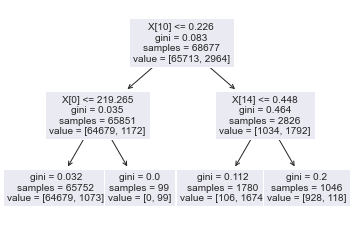

In [84]:
tree.plot_tree(classifier,fontsize=10)

In [85]:
import sklearn.metrics as metrics

In [86]:
def card_precision_top_k_day(df_day,top_k):
    
    # This takes the max of the predictions AND the max of label TX_FRAUD for each CUSTOMER_ID, 
    # and sorts by decreasing order of fraudulent prediction
    df_day = df_day.groupby('customer_id').max().sort_values(by="predictions", ascending=False).reset_index(drop=False)
            
    # Get the top k most suspicious cards
    df_day_top_k=df_day.head(top_k)
    list_detected_compromised_cards=list(df_day_top_k[df_day_top_k.TX_FRAUD==1].customer_id)
    
    # Compute precision top k
    card_precision_top_k = len(list_detected_compromised_cards) / top_k
    
    return list_detected_compromised_cards, card_precision_top_k

def card_precision_top_k(predictions_df, top_k, remove_detected_compromised_cards=True):

    # Sort days by increasing order
    list_days=list(predictions_df['TX_TIME_DAYS'].unique())
    list_days.sort()
    
    # At first, the list of detected compromised cards is empty
    list_detected_compromised_cards = []
    
    card_precision_top_k_per_day_list = []
    nb_compromised_cards_per_day = []
    
    # For each day, compute precision top k
    for day in list_days:
        
        df_day = predictions_df[predictions_df['TX_TIME_DAYS']==day]
        df_day = df_day[['predictions', 'customer_id', 'TX_FRAUD']]
        
        # Let us remove detected compromised cards from the set of daily transactions
        df_day = df_day[df_day.customer_id.isin(list_detected_compromised_cards)==False]
        
        nb_compromised_cards_per_day.append(len(df_day[df_day.TX_FRAUD==1].customer_id.unique()))
        
        detected_compromised_cards, card_precision_top_k = card_precision_top_k_day(df_day,top_k)
        
        card_precision_top_k_per_day_list.append(card_precision_top_k)
        
        # Let us update the list of detected compromised cards
        if remove_detected_compromised_cards:
            list_detected_compromised_cards.extend(detected_compromised_cards)
        
    # Compute the mean
    mean_card_precision_top_k = np.array(card_precision_top_k_per_day_list).mean()
    
    # Returns precision top k per day as a list, and resulting mean
    return nb_compromised_cards_per_day,card_precision_top_k_per_day_list,mean_card_precision_top_k

def performance_assessment(predictions_df, output_feature='TX_FRAUD', 
                           prediction_feature='predictions', top_k_list=[100],
                           rounded=True):
    
    AUC_ROC = metrics.roc_auc_score(predictions_df[output_feature], predictions_df[prediction_feature])
    AP = metrics.average_precision_score(predictions_df[output_feature], predictions_df[prediction_feature])
    
    performances = pd.DataFrame([[AUC_ROC, AP]], 
                           columns=['AUC ROC','Average precision'])
    
    for top_k in top_k_list:
    
        _, _, mean_card_precision_top_k = card_precision_top_k(predictions_df, top_k)
        performances['Card Precision@'+str(top_k)]=mean_card_precision_top_k
        
    if rounded:
        performances = performances.round(3)
    
    return performances

In [87]:
predictions_df=test_df
predictions_df['predictions']=models_and_predictions_dictionary['predictions_test']
performance_assessment(predictions_df,top_k_list=[100])

AUC ROC  Average precision  Card Precision@100
0    0.829              0.628               0.791

In [88]:
predictions_df['predictions']=0.5
performance_assessment(predictions_df,top_k_list=[100])

AUC ROC  Average precision  Card Precision@100
0      0.5               0.04               0.079

In [89]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [90]:
import sklearn

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb



In [92]:
classifiers_dictionary={'Logistic regression':LogisticRegression(random_state=0), 
                        'Decision tree with depth of two':DecisionTreeClassifier(max_depth=2,random_state=0), 
                        'Decision tree - unlimited depth':DecisionTreeClassifier(random_state=0), 
                        'Random forest':RandomForestClassifier(random_state=0,n_jobs=-1),
                        'XGBoost':xgb.XGBClassifier(random_state=0,n_jobs=-1)
                       }

fitted_models_and_predictions_dictionary={}

for classifier_name in classifiers_dictionary:
    
    model_and_predictions = fit_model_and_get_predictions(classifiers_dictionary[classifier_name], train_df, test_df, 
                                                                                  input_features=input_features,
                                                                                output_feature=output_feature)
    fitted_models_and_predictions_dictionary[classifier_name]=model_and_predictions

In [93]:
def performance_assessment_model_collection(fitted_models_and_predictions_dictionary, 
                                            transactions_df, 
                                            type_set='test',
                                            top_k_list=[100]):

    performances=pd.DataFrame() 
    
    for classifier_name, model_and_predictions in fitted_models_and_predictions_dictionary.items():
    
        predictions_df=transactions_df
            
        predictions_df['predictions']=model_and_predictions['predictions_'+type_set]
        
        performances_model=performance_assessment(predictions_df, output_feature='TX_FRAUD', 
                                                   prediction_feature='predictions', top_k_list=top_k_list)
        performances_model.index=[classifier_name]
        
        performances=performances.append(performances_model)
        
    return performances

In [94]:
# performances on test set
df_performances=performance_assessment_model_collection(fitted_models_and_predictions_dictionary, test_df, 
                                                        type_set='test', 
                                                        top_k_list=[100])
df_performances

AUC ROC  Average precision  \
Logistic regression                0.841              0.673   
Decision tree with depth of two    0.829              0.628   
Decision tree - unlimited depth    0.787              0.336   
Random forest                      0.842              0.687   
XGBoost                            0.833              0.660   

                                 Card Precision@100  
Logistic regression                           0.781  
Decision tree with depth of two               0.791  
Decision tree - unlimited depth               0.579  
Random forest                                 0.807  
XGBoost                                       0.787

In [95]:
# performances on training set
df_performances=performance_assessment_model_collection(fitted_models_and_predictions_dictionary, train_df, 
                                                        type_set='train', 
                                                        top_k_list=[100])
df_performances

AUC ROC  Average precision  \
Logistic regression                0.848              0.663   
Decision tree with depth of two    0.815              0.608   
Decision tree - unlimited depth    1.000              1.000   
Random forest                      1.000              1.000   
XGBoost                            0.997              0.965   

                                 Card Precision@100  
Logistic regression                           0.999  
Decision tree with depth of two               0.943  
Decision tree - unlimited depth               1.000  
Random forest                                 1.000  
XGBoost                                       1.000

In [96]:
def execution_times_model_collection(fitted_models_and_predictions_dictionary):

    execution_times=pd.DataFrame() 
    
    for classifier_name, model_and_predictions in fitted_models_and_predictions_dictionary.items():
    
        execution_times_model=pd.DataFrame() 
        execution_times_model['Training execution time']=[model_and_predictions['training_execution_time']]
        execution_times_model['Prediction execution time']=[model_and_predictions['prediction_execution_time']]
        execution_times_model.index=[classifier_name]
        
        execution_times=execution_times.append(execution_times_model)
        
    return execution_times

In [97]:
df_execution_times=execution_times_model_collection(fitted_models_and_predictions_dictionary)
df_execution_times

Training execution time  \
Logistic regression                             0.271416   
Decision tree with depth of two                 0.111205   
Decision tree - unlimited depth                 0.588542   
Random forest                                   1.790631   
XGBoost                                         2.600546   

                                 Prediction execution time  
Logistic regression                               0.002210  
Decision tree with depth of two                   0.002291  
Decision tree - unlimited depth                   0.003657  
Random forest                                     0.054467  
XGBoost                                           0.012659

In [98]:
!curl -O https://raw.githubusercontent.com/Fraud-Detection-Handbook/fraud-detection-handbook/main/Chapter_References/shared_functions.py
%run shared_functions.py



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63257  100 63257    0     0    98k      0 --:--:-- --:--:-- --:--:--   99k


ModuleNotFoundError: No module named 'graphviz'

<Figure size 432x288 with 0 Axes>

In [99]:
 from sklearn.metrics import plot_confusion_matrix

In [100]:
def get_class_from_fraud_probability(fraud_probabilities,threshold=0.5):
    
    predicted_classes=[0 if fraud_probability <threshold else 1
                      for fraud_probability in fraud_probabilities]
    return predicted_classes

In [101]:
#Implementation of mean missclassification error
def compute_mme(true_labels,predicted_classes):
    
    n=len(true_labels)
    mme=np.sum(np.array(true_labels)!=np.array(predicted_classes))/n
    
    return mme
    
    
    

In [102]:
true_labels=[1,1,0,0,0,0,0,0,0,0]
fraud_probabilities=[0.9,0.35,0.45,0.4,0.2,0.2,0.2,0.1,0.1,0]

In [103]:
                   
plt.subplots_adjust(wspace=0.5)

<Figure size 432x288 with 0 Axes>

In [104]:
def threshold_based_metrics(fraud_probabilities, true_labels, thresholds_list):
    
    results = []
    
    for threshold in thresholds_list:
    
        predicted_classes = get_class_from_fraud_probability(fraud_probabilities, threshold=threshold)
    
        (TN, FP, FN, TP) = metrics.confusion_matrix(true_labels, predicted_classes).ravel()
    
        mme = (FP+FN)/(TN+FP+FN+TP)
    
        TPR = TP/(TP+FN)
        TNR = TN/(TN+FP)
    
        FPR = FP/(TN+FP)
        FNR = FN/(TP+FN)
        
        BER = 1/2*(FPR+FNR)
        
        Gmean = np.sqrt(TPR*TNR)
    
        precision = 0
        FDR = 0
        F1_score=0
        
        if TP+FP>0:
            precision = TP/(TP+FP)
            FDR=FP/(TP+FP)
        
        NPV = 0
        FOR = 0
        
        if TN+FN>0:
            NPV = TN/(TN+FN)
            FOR = FN/(TN+FN)
            
        
        if precision+TPR>0:
            F1_score = 2*(precision*TPR)/(precision+TPR)
    
        results.append([threshold, mme, TPR, TNR, FPR, FNR, BER, Gmean, precision, NPV, FDR, FOR, F1_score])
        
    results_df = pd.DataFrame(results,columns=['Threshold' ,'mme', 'TPR', 'TNR', 'FPR', 'FNR', 'BER', 'G-mean', 'Precision', 'NPV', 'FDR', 'FOR', 'F1 Score'])
    
    return results_df

In [105]:
unique_thresholds = list(set(fraud_probabilities))
unique_thresholds.sort(reverse=True)
unique_thresholds

[0.9, 0.45, 0.4, 0.35, 0.2, 0.1, 0]

In [106]:
results_df=threshold_based_metrics(fraud_probabilities,true_labels,unique_thresholds)
results_df

Threshold  mme  TPR    TNR    FPR  FNR     BER    G-mean  Precision  \
0       0.90  0.1  0.5  1.000  0.000  0.5  0.2500  0.707107   1.000000   
1       0.45  0.2  0.5  0.875  0.125  0.5  0.3125  0.661438   0.500000   
2       0.40  0.3  0.5  0.750  0.250  0.5  0.3750  0.612372   0.333333   
3       0.35  0.2  1.0  0.750  0.250  0.0  0.1250  0.866025   0.500000   
4       0.20  0.5  1.0  0.375  0.625  0.0  0.3125  0.612372   0.285714   
5       0.10  0.7  1.0  0.125  0.875  0.0  0.4375  0.353553   0.222222   
6       0.00  0.8  1.0  0.000  1.000  0.0  0.5000  0.000000   0.200000   

        NPV       FDR       FOR  F1 Score  
0  0.888889  0.000000  0.111111  0.666667  
1  0.875000  0.500000  0.125000  0.500000  
2  0.857143  0.666667  0.142857  0.400000  
3  1.000000  0.500000  0.000000  0.666667  
4  1.000000  0.714286  0.000000  0.444444  
5  1.000000  0.777778  0.000000  0.363636  
6  0.000000  0.800000  0.000000  0.333333

In [107]:
!curl -O https://raw.githubusercontent.com/Fraud-Detection-Handbook/fraud-detection-handbook/main/Chapter_References/shared_functions.py
%run shared_functions.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63257  100 63257    0     0   560k      0 --:--:-- --:--:-- --:--:--  593k


ModuleNotFoundError: No module named 'graphviz'

<Figure size 432x288 with 0 Axes>

In [108]:
# 2 fraudulent and 8 genuine transactions
true_labels = [1,1,0,0,0,0,0,0,0,0]

# Probability of fraud for each transaction
fraud_probabilities = [0.9,0.35,0.45,0.4,0.2,0.2,0.2,0.1,0.1,0]

In [109]:
unique_thresholds=[1.1]+list(set(fraud_probabilities))
unique_thresholds.sort(reverse=True)
unique_thresholds


[1.1, 0.9, 0.45, 0.4, 0.35, 0.2, 0.1, 0]

In [110]:
performance_metrics=threshold_based_metrics(fraud_probabilities,true_labels,unique_thresholds)
performance_metrics[['Threshold','TPR','FPR']]

Threshold  TPR    FPR
0       1.10  0.0  0.000
1       0.90  0.5  0.000
2       0.45  0.5  0.125
3       0.40  0.5  0.250
4       0.35  1.0  0.250
5       0.20  1.0  0.625
6       0.10  1.0  0.875
7       0.00  1.0  1.000

In [111]:
FPR_list, TPR_list, threshold = sklearn.metrics.roc_curve(true_labels, fraud_probabilities, drop_intermediate=False)
FPR_list, TPR_list, threshold

(array([0.   , 0.   , 0.125, 0.25 , 0.25 , 0.625, 0.875, 1.   ]),
 array([0. , 0.5, 0.5, 0.5, 1. , 1. , 1. , 1. ]),
 array([1.9 , 0.9 , 0.45, 0.4 , 0.35, 0.2 , 0.1 , 0.  ]))

In [112]:
%%capture
def get_template_roc_curve(ax, title,fs,random=True):
    
    ax.set_title(title, fontsize=fs)
    ax.set_xlim([-0.01, 1.01])
    ax.set_ylim([-0.01, 1.01])
    
    ax.set_xlabel('False Positive Rate', fontsize=fs)
    ax.set_ylabel('True Positive Rate', fontsize=fs)
    
    if random:
        ax.plot([0, 1], [0, 1],'r--',label="AUC ROC Random = 0.5")

ROC_AUC = metrics.auc(FPR_list, TPR_list)    
    
roc_curve, ax = plt.subplots(figsize=(5,5))
get_template_roc_curve(ax, "Receiver Operating Characteristic (ROC) Curve",fs=15)
ax.plot(FPR_list, TPR_list, 'b', color='blue', label = 'AUC ROC Classifier = {0:0.3f}'.format(ROC_AUC))
ax.legend(loc = 'lower right')

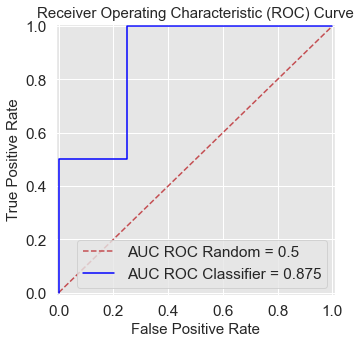

In [113]:
roc_curve

In [114]:
# 2 fraudulent and 8 genuine transactions
true_labels = [1,1,0,0,0,0,0,0,0,0]

# Probability of fraud for each transaction
fraud_probabilities = [0.5]*10

FPR_list, TPR_list, threshold = metrics.roc_curve(true_labels, fraud_probabilities, drop_intermediate=False)
FPR_list, TPR_list, threshold

(array([0., 1.]), array([0., 1.]), array([1.5, 0.5]))

In [115]:
%%capture

ROC_AUC = metrics.auc(FPR_list, TPR_list)    
    
roc_curve, ax = plt.subplots(figsize=(5,5))
get_template_roc_curve(ax, "Receiver Operating Characteristic (ROC) Curve\n Random classifier",fs=15,random=False)
ax.plot(FPR_list, TPR_list, 'b', color='blue', label = 'AUC ROC Classifier = {0:0.3f}'.format(ROC_AUC))
ax.legend(loc = 'lower right')

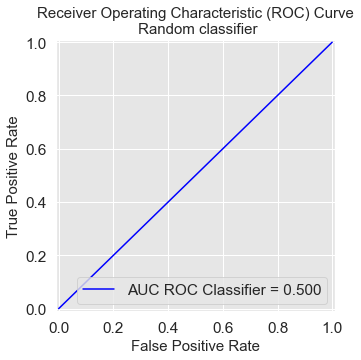

In [116]:
roc_curve

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [118]:
# Load data from the 2018-07-25 to the 2018-08-14

DIR_INPUT='./simulated-data-transformed/data' 

BEGIN_DATE = "2018-07-25"
END_DATE = "2018-08-14"

print("Load  files")
%time transactions_df=read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)
print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))


start_date_training = datetime.datetime.strptime("2018-07-25", "%Y-%m-%d")
delta_train=delta_delay=delta_test=7

(train_df,test_df)=get_train_test_set(transactions_df,start_date_training,
                                      delta_train=delta_train,delta_delay=delta_delay,delta_test=delta_test)

output_feature="TX_FRAUD"

input_features=['TX_AMOUNT','TX_WEEKEND', 'TX_NIGHT', 'CUSTOMER_ID_NB_TX1DAY_WINDOW', 
                'CUSTOMER_ID_AVG_AMOUNT1DAY_WINDOW ',
       'CUSTOMER_ID_NB_TX7DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT7DAY_WINDOW ',
       'CUSTOMER_ID_NB_TX30DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT30DAY_WINDOW ',
       'terminal_id_NB_TX_1DAY_WINDOW', 'terminal_id_RISK_1DAY_WINDOW',
       'terminal_id_NB_TX_7DAY_WINDOW', 'terminal_id_RISK_7DAY_WINDOW',
       'terminal_id_NB_TX_30DAY_WINDOW', 'terminal_id_RISK_30DAY_WINDOW']

classifiers_dictionary={'Logistic regression':LogisticRegression(random_state=0), 
                        'Decision tree with depth of two':DecisionTreeClassifier(max_depth=2,random_state=0), 
                        'Decision tree - unlimited depth':DecisionTreeClassifier(random_state=0), 
                        'Random forest':RandomForestClassifier(random_state=0,n_jobs=-1),
                        'XGBoost':xgb.XGBClassifier(random_state=0,n_jobs=-1)
                       }

fitted_models_and_predictions_dictionary={}

for classifier_name in classifiers_dictionary:
    
    start_time=time.time()
    model_and_predictions = fit_model_and_get_predictions(classifiers_dictionary[classifier_name], train_df, test_df, 
                                                          input_features=input_features,
                                                          output_feature=output_feature)
    
    print("Time to fit the "+classifier_name+" model: "+str(round(time.time()-start_time,2)))
    
    fitted_models_and_predictions_dictionary[classifier_name]=model_and_predictions
    

Load  files


NameError: name 'read_from_files' is not defined

7911324 transactions loaded, containing 325833 fraudulent transactions
Time to fit the Logistic regression model: 0.31
Time to fit the Decision tree with depth of two model: 0.15
Time to fit the Decision tree - unlimited depth model: 0.63
Time to fit the Random forest model: 1.98
Time to fit the XGBoost model: 2.72


In [119]:
%%capture
roc_curve, ax = plt.subplots(1, 1, figsize=(5,5))

cmap = plt.get_cmap('jet')
colors={'Logistic regression':cmap(0), 'Decision tree with depth of two':cmap(200), 
        'Decision tree - unlimited depth':cmap(250),
        'Random forest':cmap(70), 'XGBoost':cmap(40)}

get_template_roc_curve(ax,title='Receiver Operating Characteristic Curve\nTest data',fs=15)
    
for classifier_name in classifiers_dictionary:
    
    model_and_predictions=fitted_models_and_predictions_dictionary[classifier_name]

    FPR_list, TPR_list, threshold = metrics.roc_curve(test_df[output_feature], model_and_predictions['predictions_test'])
    ROC_AUC = metrics.auc(FPR_list, TPR_list)

    ax.plot(FPR_list, TPR_list, 'b', color=colors[classifier_name], label = 'AUC ROC {0}= {1:0.3f}'.format(classifier_name,ROC_AUC))
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.05, 1))
    

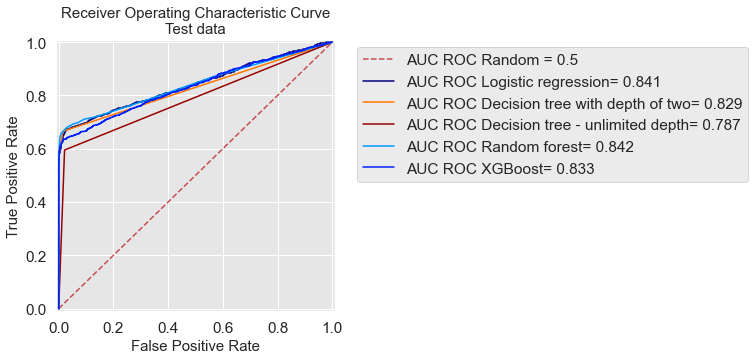

In [120]:
roc_curve

In [121]:
test_df[test_df.TX_FRAUD==0].shape

(25001, 23)

In [122]:
test_df[test_df.TX_FRAUD==1].shape

(1050, 23)

In [123]:
# 2 fraudulent and 8 genuine transactions
true_labels = [1,1,0,0,0,0,0,0,0,0]

# Probability of fraud for each transaction
fraud_probabilities = [0.9,0.35,0.45,0.4,0.2,0.2,0.2,0.1,0.1,0]

unique_thresholds = [1.1]+list(set(fraud_probabilities))
unique_thresholds.sort(reverse=True)

performance_metrics=threshold_based_metrics(fraud_probabilities, true_labels, unique_thresholds)
performance_metrics[['Threshold','Precision','TPR']]

Threshold  Precision  TPR
0       1.10   0.000000  0.0
1       0.90   1.000000  0.5
2       0.45   0.500000  0.5
3       0.40   0.333333  0.5
4       0.35   0.500000  1.0
5       0.20   0.285714  1.0
6       0.10   0.222222  1.0
7       0.00   0.200000  1.0

In [124]:
def compute_AP(precision, recall):
    
    AP = 0
    
    n_thresholds = len(precision)
    
    for i in range(1, n_thresholds):
        
        if recall[i]-recall[i-1]>=0:
            
            AP = AP+(recall[i]-recall[i-1])*precision[i]
        
    return AP

In [125]:
%%capture
def get_template_pr_curve(ax, title,fs, baseline=0.5):
    ax.set_title(title, fontsize=fs)
    ax.set_xlim([-0.01, 1.01])
    ax.set_ylim([-0.01, 1.01])
    
    ax.set_xlabel('Recall (True Positive Rate)', fontsize=fs)
    ax.set_ylabel('Precision', fontsize=fs)
    
    ax.plot([0, 1], [baseline, baseline],'r--',label='AP Random = {0:0.3f}'.format(baseline))

precision = performance_metrics.Precision.values
recall = performance_metrics.TPR.values
    
pr_curve, ax = plt.subplots(figsize=(5,5))
get_template_pr_curve(ax, "Precision Recall (PR) Curve",fs=15,baseline=sum(true_labels)/len(true_labels))
AP2 = metrics.average_precision_score(true_labels, fraud_probabilities)
AP = compute_AP(precision, recall)
ax.step(recall, precision, 'b', color='blue', label = 'AP Classifier = {0:0.3f}'.format(AP))
ax.legend(loc = 'lower right')

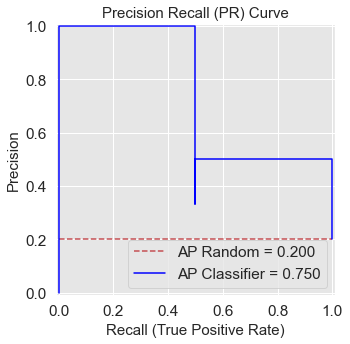

In [126]:
pr_curve

In [127]:
%%capture
pr_curve, ax = plt.subplots(1, 1, figsize=(6,6))
cmap = plt.get_cmap('jet')
colors={'Logistic regression':cmap(0), 'Decision tree with depth of two':cmap(200), 
        'Decision tree - unlimited depth':cmap(250),
        'Random forest':cmap(70), 'XGBoost':cmap(40)}

get_template_pr_curve(ax, "Precision Recall (PR) Curve\nTest data",fs=15,baseline=sum(test_df[output_feature])/len(test_df[output_feature]))
    
for classifier_name in classifiers_dictionary:
    
    model_and_predictions=fitted_models_and_predictions_dictionary[classifier_name]

    precision, recall, threshold = metrics.precision_recall_curve(test_df[output_feature], model_and_predictions['predictions_test'])
    precision=precision[::-1]
    recall=recall[::-1]
    
    AP = metrics.average_precision_score(test_df[output_feature], model_and_predictions['predictions_test'])
    
    ax.step(recall, precision, 'b', color=colors[classifier_name], label = 'AP {0}= {1:0.3f}'.format(classifier_name,AP))
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.05, 1))
    
    
plt.subplots_adjust(wspace=0.5, hspace=0.8)

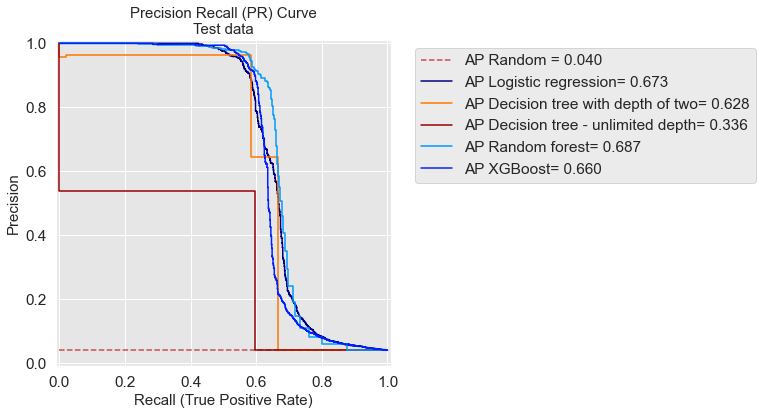

In [128]:
pr_curve

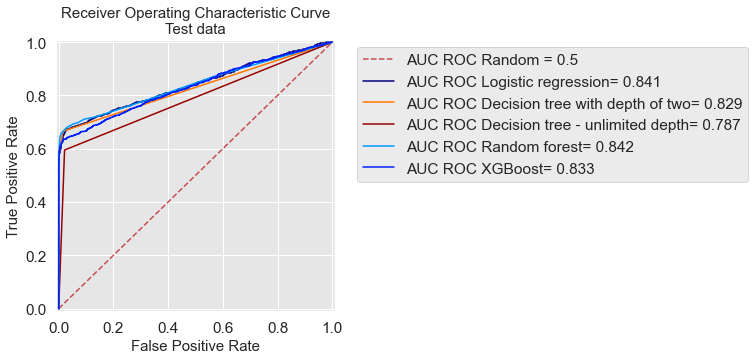

In [129]:
roc_curve

### Precision Top k metrics

In [130]:
!curl -O https://raw.githubusercontent.com/Fraud-Detection-Handbook/fraud-detection-handbook/main/Chapter_References/shared_functions.py
%run shared_functions.py

# Get simulated data from Github repository
if not os.path.exists("simulated-data-transformed"):
    !git clone https://github.com/Fraud-Detection-Handbook/simulated-data-transformed
        

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63257  100 63257    0     0   667k      0 --:--:-- --:--:-- --:--:--  701k


ModuleNotFoundError: No module named 'graphviz'

<Figure size 432x288 with 0 Axes>

In [131]:
# Load data from the 2018-07-25 to the 2018-08-14

DIR_INPUT='./simulated-data-transformed/data/' 

BEGIN_DATE = "2018-07-25"
END_DATE = "2018-08-14"

print("Load  files")
%time transactions_df=read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)
print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))

start_date_training = datetime.datetime.strptime("2018-07-25", "%Y-%m-%d")
delta_train=delta_delay=delta_test=7

(train_df,test_df)=get_train_test_set(transactions_df,start_date_training,
                                      delta_train=delta_train,delta_delay=delta_delay,delta_test=delta_test)

output_feature="TX_FRAUD"

input_features=['TX_AMOUNT','TX_WEEKEND', 'TX_NIGHT', 'CUSTOMER_ID_NB_TX1DAY_WINDOW', 
                'CUSTOMER_ID_AVG_AMOUNT1DAY_WINDOW ',
       'CUSTOMER_ID_NB_TX7DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT7DAY_WINDOW ',
       'CUSTOMER_ID_NB_TX30DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT30DAY_WINDOW ',
       'terminal_id_NB_TX_1DAY_WINDOW', 'terminal_id_RISK_1DAY_WINDOW',
       'terminal_id_NB_TX_7DAY_WINDOW', 'terminal_id_RISK_7DAY_WINDOW',
       'terminal_id_NB_TX_30DAY_WINDOW', 'terminal_id_RISK_30DAY_WINDOW']

classifier = sklearn.tree.DecisionTreeClassifier(max_depth = 2, random_state=0)

models_and_predictions_dictionary = fit_model_and_get_predictions(classifier, train_df, test_df, 
                                                                 input_features, output_feature)    

Load  files


NameError: name 'read_from_files' is not defined

7911324 transactions loaded, containing 325833 fraudulent transactions


In [132]:
assert len(models_and_predictions_dictionary['predictions_test'])==len(test_df)

In [133]:
predictions_df=test_df
predictions_df['predictions']=models_and_predictions_dictionary['predictions_test']
predictions_df[['transaction_id','TX_DateTime','customer_id','terminal_id','TX_AMOUNT','TX_TIME_DAYS','TX_FRAUD','predictions']].head()

transaction_id         TX_DateTime  customer_id  terminal_id  \
1275094         1275094 2018-08-08 10:05:02         2936          653   
1275097         1275097 2018-08-08 10:09:41         4905          587   
1275098         1275098 2018-08-08 10:09:47         2901          878   
1275104         1275104 2018-08-08 10:18:49         2427          174   
1275106         1275106 2018-08-08 10:19:22         2324          370   

         TX_AMOUNT  TX_TIME_DAYS  TX_FRAUD  predictions  
1275094  -0.763968           129         0     0.016319  
1275097   0.047125           129         0     0.016319  
1275098  -0.491099           129         0     0.016319  
1275104   1.697492           129         0     0.016319  
1275106  -0.935157           129         0     0.016319

In [134]:
def precision_top_k_day(df_day, top_k=100):
    
    # Order transactions by decreasing probabilities of frauds
    df_day = df_day.sort_values(by="predictions", ascending=False).reset_index(drop=False)
        
    # Get the top k most suspicious transactions
    df_day_top_k=df_day.head(top_k)
    list_detected_fraudulent_transactions=list(df_day_top_k[df_day_top_k.TX_FRAUD==1].transaction_id)
    
    # Compute precision top k
    precision_top_k = len(list_detected_fraudulent_transactions) / top_k
    
    return list_detected_fraudulent_transactions, precision_top_k


day=129

df_day = predictions_df[predictions_df['TX_TIME_DAYS']==day]
df_day = df_day[['transaction_id','customer_id', 'TX_FRAUD', 'predictions']]

_, precision_top_k= precision_top_k_day(df_day=df_day, top_k=100)
precision_top_k

0.93

In [135]:
df_day.TX_FRAUD.sum()

195

In [136]:
def precision_top_k(predictions_df, top_k=100):

    # Sort days by increasing order
    list_days=list(predictions_df['TX_TIME_DAYS'].unique())
    list_days.sort()
    
    precision_top_k_per_day_list = []
    nb_fraudulent_transactions_per_day = []
    
    # For each day, compute precision top k
    for day in list_days:
        
        df_day = predictions_df[predictions_df['TX_TIME_DAYS']==day]
        df_day = df_day[['transaction_id', 'customer_id', 'TX_FRAUD', 'predictions']]
        
        nb_fraudulent_transactions_per_day.append(len(df_day[df_day.TX_FRAUD==1]))
        
        _, _precision_top_k = precision_top_k_day(df_day, top_k=top_k)
        
        precision_top_k_per_day_list.append(_precision_top_k)
        
    # Compute the mean
    mean_precision_top_k = np.round(np.array(precision_top_k_per_day_list).mean(),3)
    
    # Returns number of fraudulent transactions per day,
    # precision top k per day, and resulting mean
    return nb_fraudulent_transactions_per_day,precision_top_k_per_day_list,mean_precision_top_k

In [137]:
nb_fraudulent_transactions_per_day_remaining,\
precision_top_k_per_day_list,\
mean_precision_top_k = precision_top_k(predictions_df=predictions_df, top_k=100)

print("Number of remaining fraudulent transactions: "+str(nb_fraudulent_transactions_per_day_remaining))
print("Precision top-k: "+str(precision_top_k_per_day_list))
print("Average Precision top-k: "+str(mean_precision_top_k))

Number of remaining fraudulent transactions: [195, 176, 165, 156, 125, 130, 103]
Precision top-k: [0.93, 0.96, 0.98, 0.87, 0.83, 0.81, 0.67]
Average Precision top-k: 0.864


In [138]:

tx_stats=get_tx_stats(transactions_df, start_date_df="2018-04-01")

# Add the remaining number of fraudulent transactions for the last 7 days (test period)
tx_stats.loc[14:20,'nb_fraudulent_transactions_per_day_remaining']=list(nb_fraudulent_transactions_per_day_remaining)
# Add precision top k for the last 7 days (test period) 
tx_stats.loc[14:20,'precision_top_k_per_day']=precision_top_k_per_day_list

In [139]:
%%capture

# Plot the number of transactions per day, fraudulent transactions per day and fraudulent cards per day

cmap = plt.get_cmap('jet')
colors={'precision_top_k_per_day':cmap(0), 
        'nb_fraud_tx_per_day':cmap(200),
        'nb_fraudulent_transactions_per_day_remaining':cmap(250),
       }

fraud_and_transactions_stats_fig, ax = plt.subplots(1, 1, figsize=(15,8))

# Training period
start_date_training = datetime.datetime.strptime("2018-07-25", "%Y-%m-%d")
delta_train = delta_delay = delta_test = 7

end_date_training = start_date_training+datetime.timedelta(days=delta_train-1)

# Test period
start_date_test = start_date_training+datetime.timedelta(days=delta_train+delta_delay)
end_date_test = start_date_training+datetime.timedelta(days=delta_train+delta_delay+delta_test-1)

get_template_tx_stats(ax, fs=20,
                      start_date_training=start_date_training,
                      title='Number of fraudulent transactions per day \n and number of detected fraudulent transactions',
                      delta_train=delta_train,
                      delta_delay=delta_delay,
                      delta_test=delta_test,
                      ylim=150
                     )

ax.plot(tx_stats['tx_date'], tx_stats['nb_fraud_tx_per_day'], 'b', color=colors['nb_fraud_tx_per_day'], label = '# fraudulent txs per day - Original')
ax.plot(tx_stats['tx_date'], tx_stats['nb_fraudulent_transactions_per_day_remaining'], 'b', color=colors['nb_fraudulent_transactions_per_day_remaining'], label = '# fraudulent txs per day - Remaining')
ax.plot(tx_stats['tx_date'], tx_stats['precision_top_k_per_day']*100, 'b', color=colors['precision_top_k_per_day'], label = '# detected fraudulent txs per day')
ax.legend(loc = 'upper left',bbox_to_anchor=(1.05, 1),fontsize=20)
    

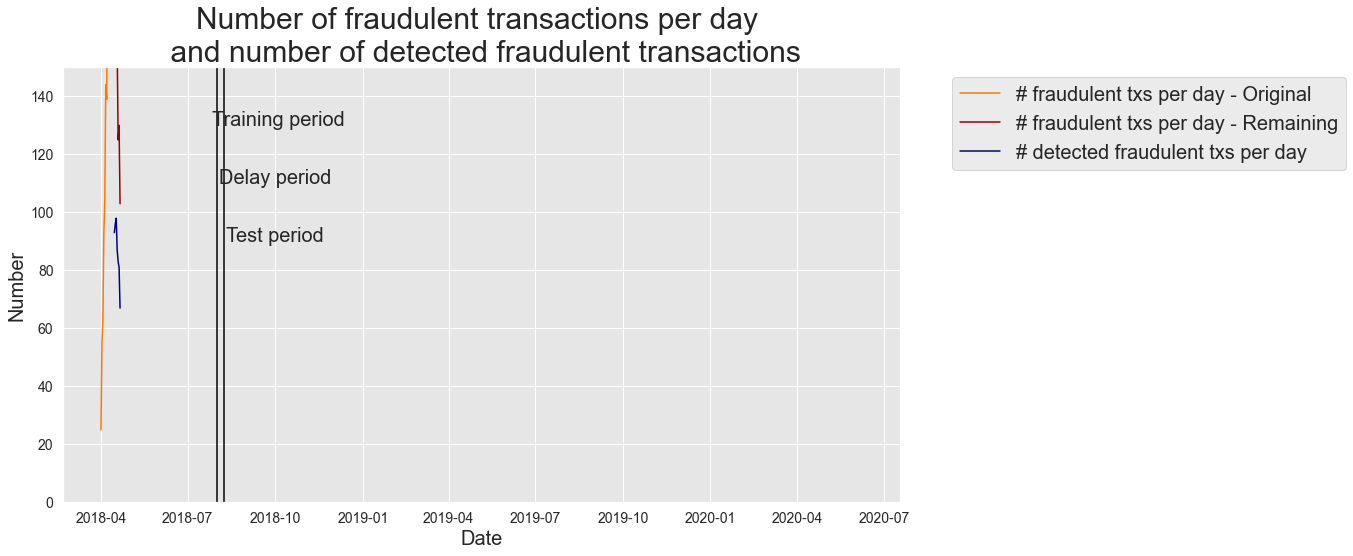

In [140]:
fraud_and_transactions_stats_fig

In [141]:
def card_precision_top_k_day(df_day, top_k):
    
    
    df_day = df_day.groupby('customer_id').max().sort_values(by="predictions", ascending=False).reset_index(drop=False)
    
    # Get the top k most suspicious cards
    df_day_top_k=df_day.head(top_k)
    list_detected_compromised_cards=list(df_day_top_k[df_day_top_k.TX_FRAUD==1].customer_id)
    
    # Compute precision top k
    card_precision_top_k = len(list_detected_compromised_cards) / top_k
    
    return list_detected_compromised_cards, card_precision_top_k

day=129

df_day = predictions_df[predictions_df['TX_TIME_DAYS']==day]
df_day = df_day[['predictions', 'customer_id', 'TX_FRAUD']]

_,card_precision_top_k= card_precision_top_k_day(df_day=df_day, top_k=100)
card_precision_top_k

0.94

In [142]:
df_day.groupby('customer_id').max().TX_FRAUD.sum()

184

In [143]:
def card_precision_top_k(predictions_df, top_k):

    # Sort days by increasing order
    list_days=list(predictions_df['TX_TIME_DAYS'].unique())
    list_days.sort()
    
    card_precision_top_k_per_day_list = []
    nb_compromised_cards_per_day = []
    
    # For each day, compute precision top k
    for day in list_days:
        
        df_day = predictions_df[predictions_df['TX_TIME_DAYS']==day]
        df_day = df_day[['predictions', 'customer_id', 'TX_FRAUD']]
        
        nb_compromised_cards_per_day.append(len(df_day[df_day.TX_FRAUD==1].customer_id.unique()))
        
        _, card_precision_top_k = card_precision_top_k_day(df_day,top_k)
        
        card_precision_top_k_per_day_list.append(card_precision_top_k)
        
    # Compute the mean
    mean_card_precision_top_k = np.array(card_precision_top_k_per_day_list).mean()
    
    # Returns precision top k per day as a list, and resulting mean
    return nb_compromised_cards_per_day,card_precision_top_k_per_day_list,mean_card_precision_top_k

In [144]:
nb_compromised_cards_per_day_remaining\
,card_precision_top_k_per_day_list\
,mean_card_precision_top_k=card_precision_top_k(predictions_df=predictions_df, top_k=100)

print("Number of remaining compromised cards: "+str(nb_compromised_cards_per_day_remaining))
print("Precision top-k: "+str(card_precision_top_k_per_day_list))
print("Average Precision top-k: "+str(mean_card_precision_top_k))

Number of remaining compromised cards: [184, 166, 156, 152, 117, 122, 100]
Precision top-k: [0.94, 0.95, 0.98, 0.89, 0.81, 0.82, 0.67]
Average Precision top-k: 0.8657142857142858


In [145]:
# Compute the number of transactions per day, 
# fraudulent transactions per day and fraudulent cards per day
tx_stats=get_tx_stats(transactions_df, start_date_df="2018-04-01")

# Add the remaining number of compromised cards for the last 7 days (test period)
tx_stats.loc[14:20,'nb_compromised_cards_per_day_remaining']=list(nb_compromised_cards_per_day_remaining)

# Add the card precision top k for the last 7 days (test period) 
tx_stats.loc[14:20,'card_precision_top_k_per_day']=card_precision_top_k_per_day_list

In [146]:
%%capture

# Plot the number of transactions per day, fraudulent transactions per day and fraudulent cards per day

cmap = plt.get_cmap('jet')
colors={'card_precision_top_k_per_day':cmap(0), 
        'nb_compromised_cards_per_day':cmap(200),
        'nb_compromised_cards_per_day_remaining':cmap(250),
       }

fraud_and_transactions_stats_fig, ax = plt.subplots(1, 1, figsize=(15,8))

# Training period
start_date_training = datetime.datetime.strptime("2018-07-25", "%Y-%m-%d")
delta_train = delta_delay = delta_test = 7

end_date_training = start_date_training+datetime.timedelta(days=delta_train-1)

# Test period
start_date_test = start_date_training+datetime.timedelta(days=delta_train+delta_delay)
end_date_test = start_date_training+datetime.timedelta(days=delta_train+delta_delay+delta_test-1)

get_template_tx_stats(ax, fs=20,
                      start_date_training=start_date_training,
                      title='Number of fraudulent transactions per day \n and number of detected fraudulent transactions',
                      delta_train=delta_train,
                      delta_delay=delta_delay,
                      delta_test=delta_test,
                      ylim=150
                     )

ax.plot(tx_stats['tx_date'], tx_stats['nb_compromised_cards_per_day'], 'b', color=colors['nb_compromised_cards_per_day'], label = '# fraudulent txs per day - Original')
ax.plot(tx_stats['tx_date'], tx_stats['nb_compromised_cards_per_day_remaining'], 'b', color=colors['nb_compromised_cards_per_day_remaining'], label = '# compromised cards per day - Remaining')
ax.plot(tx_stats['tx_date'], tx_stats['card_precision_top_k_per_day']*100, 'b', color=colors['card_precision_top_k_per_day'], label = '# detected compromised cards per day')
ax.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1), fontsize=20)
    

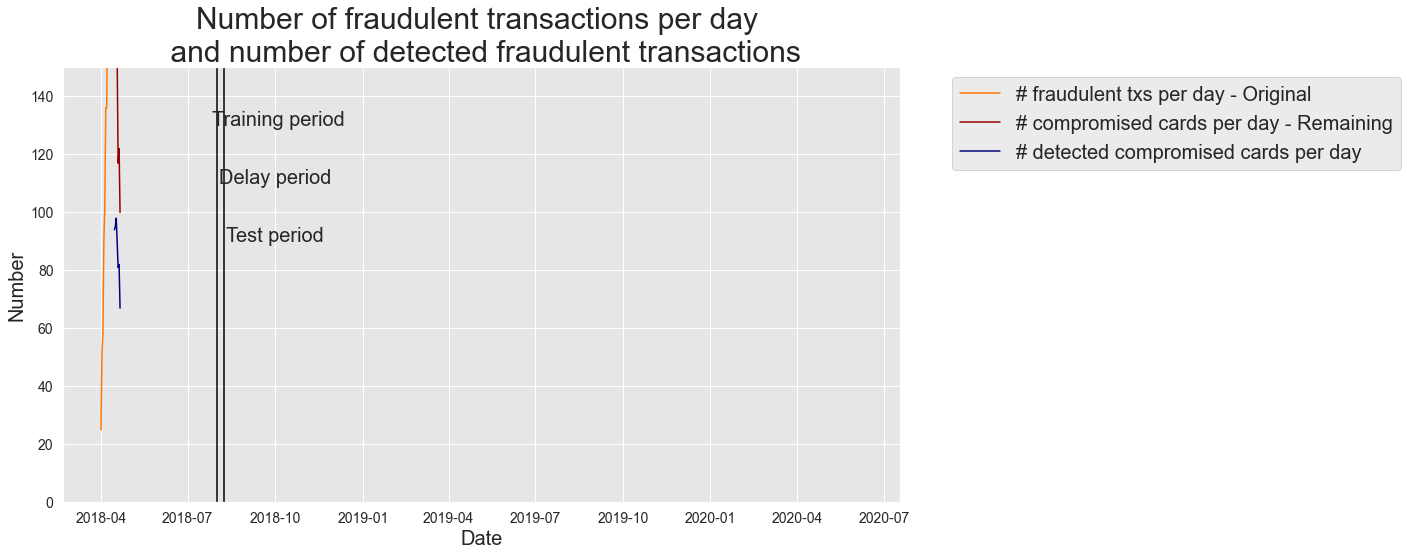

In [147]:
fraud_and_transactions_stats_fig

In [148]:
def card_precision_top_k(predictions_df, top_k, remove_detected_compromised_cards=True):

    # Sort days by increasing order
    list_days=list(predictions_df['TX_TIME_DAYS'].unique())
    list_days.sort()
    
    # At first, the list of detected compromised cards is empty
    list_detected_compromised_cards = []
    
    card_precision_top_k_per_day_list = []
    nb_compromised_cards_per_day = []
    
    # For each day, compute precision top k
    for day in list_days:
        
        df_day = predictions_df[predictions_df['TX_TIME_DAYS']==day]
        df_day = df_day[['predictions', 'customer_id', 'TX_FRAUD']]
        
        # Let us remove detected compromised cards from the set of daily transactions
        df_day = df_day[df_day.customer_id.isin(list_detected_compromised_cards)==False]
        
        nb_compromised_cards_per_day.append(len(df_day[df_day.TX_FRAUD==1].customer_id.unique()))
        
        detected_compromised_cards, card_precision_top_k = card_precision_top_k_day(df_day,top_k)
        
        card_precision_top_k_per_day_list.append(card_precision_top_k)
        
        # Let us update the list of detected compromised cards
        if remove_detected_compromised_cards:
            list_detected_compromised_cards.extend(detected_compromised_cards)
        
    # Compute the mean
    mean_card_precision_top_k = np.array(card_precision_top_k_per_day_list).mean()
    
    # Returns precision top k per day as a list, and resulting mean
    return nb_compromised_cards_per_day,card_precision_top_k_per_day_list,mean_card_precision_top_k

In [149]:
nb_compromised_cards_per_day_remaining\
,card_precision_top_k_per_day_list\
,mean_card_precision_top_k=card_precision_top_k(predictions_df=predictions_df, top_k=100)

print("Number of remaining compromised cards: "+str(nb_compromised_cards_per_day_remaining))
print("Precision top-k: "+str(card_precision_top_k_per_day_list))
print("Average Precision top-k: "+str(mean_card_precision_top_k))

Number of remaining compromised cards: [184, 159, 141, 128, 101, 97, 73]
Precision top-k: [0.94, 0.91, 0.94, 0.81, 0.72, 0.73, 0.49]
Average Precision top-k: 0.7914285714285716


In [150]:
# Compute the number of transactions per day, 
#fraudulent transactions per day and fraudulent cards per day
tx_stats=get_tx_stats(transactions_df, start_date_df="2018-04-01")

# Add the remaining number of compromised cards for the last 7 days (test period)
tx_stats.loc[14:20,'nb_compromised_cards_per_day_remaining']=list(nb_compromised_cards_per_day_remaining)

# Add the card precision top k for the last 7 days (test period) 
tx_stats.loc[14:20,'card_precision_top_k_per_day']=card_precision_top_k_per_day_list

In [151]:
%%capture

# Plot the number of transactions per day, fraudulent transactions per day and fraudulent cards per day

cmap = plt.get_cmap('jet')
colors={'card_precision_top_k_per_day':cmap(0), 
        'nb_compromised_cards_per_day':cmap(200),
        'nb_compromised_cards_per_day_remaining':cmap(250),
       }

fraud_and_transactions_stats_fig, ax = plt.subplots(1, 1, figsize=(15,8))

# Training period
start_date_training = datetime.datetime.strptime("2018-07-25", "%Y-%m-%d")
delta_train = delta_delay = delta_test = 7

end_date_training = start_date_training+datetime.timedelta(days=delta_train-1)

# Test period
start_date_test = start_date_training+datetime.timedelta(days=delta_train+delta_delay)
end_date_test = start_date_training+datetime.timedelta(days=delta_train+delta_delay+delta_test-1)

get_template_tx_stats(ax, fs=20,
                      start_date_training=start_date_training,
                      title='Number of fraudulent transactions per day \n and number of detected fraudulent transactions',
                      delta_train=delta_train,
                      delta_delay=delta_delay,
                      delta_test=delta_test,
                      ylim=150
                     )

ax.plot(tx_stats['tx_date'], tx_stats['nb_compromised_cards_per_day'], 'b', color=colors['nb_compromised_cards_per_day'], label = '# compromised cards per day - Original')
ax.plot(tx_stats['tx_date'], tx_stats['nb_compromised_cards_per_day_remaining'], 'b', color=colors['nb_compromised_cards_per_day_remaining'], label = '# compromised cards per day - Remaining')
ax.plot(tx_stats['tx_date'], tx_stats['card_precision_top_k_per_day']*100, 'b', color=colors['card_precision_top_k_per_day'], label = '# detected compromised compromised cards per day')

ax.legend(loc = 'upper left',bbox_to_anchor=(1.05, 1),fontsize=20)

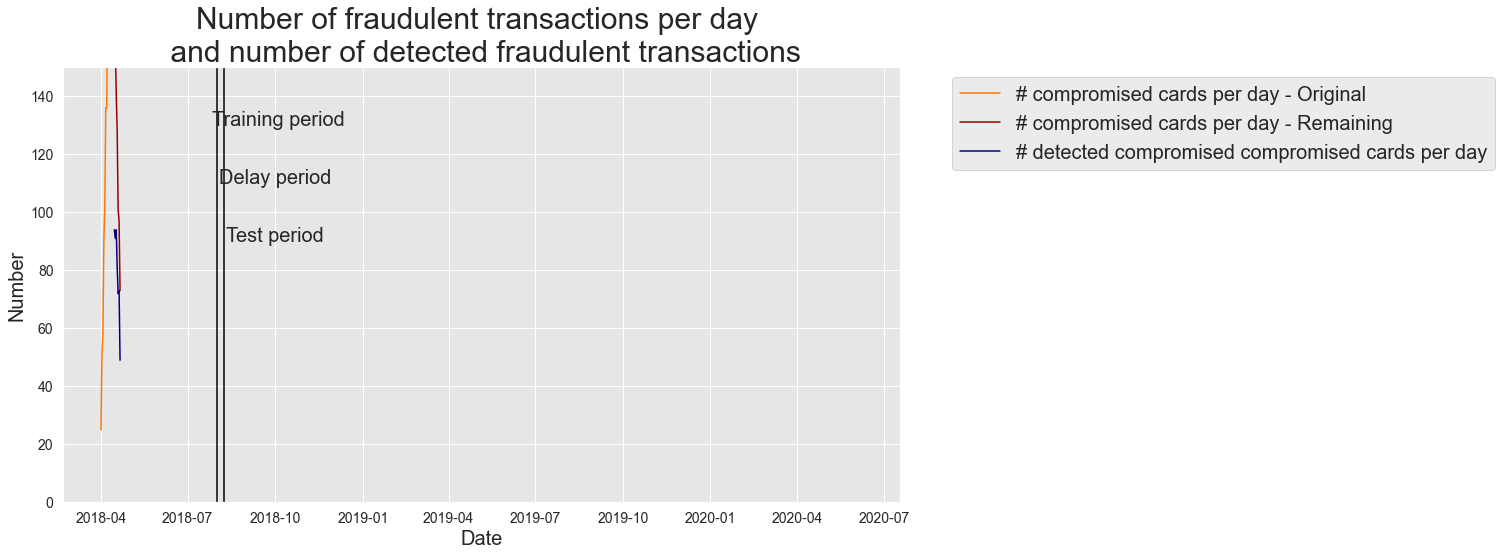

In [152]:
fraud_and_transactions_stats_fig

### Model Validation and Model Selection

In [153]:
!curl -O https://raw.githubusercontent.com/Fraud-Detection-Handbook/fraud-detection-handbook/main/Chapter_References/shared_functions.py
%run shared_functions.py

# Get simulated data from Github repository
if not os.path.exists("simulated-data-transformed"):
    !git clone https://github.com/Fraud-Detection-Handbook/simulated-data-transformed
        

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63257  100 63257    0     0   595k      0 --:--:-- --:--:-- --:--:--  623k


ModuleNotFoundError: No module named 'graphviz'

<Figure size 432x288 with 0 Axes>

In [154]:
DIR_INPUT='simulated-data-transformed/data/' 

BEGIN_DATE = "2018-06-11"
END_DATE = "2018-09-14"

print("Load  files")
%time transactions_df=read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)
print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))

output_feature="TX_FRAUD"

input_features=['TX_AMOUNT','TX_WEEKEND', 'TX_NIGHT', 'CUSTOMER_ID_NB_TX1DAY_WINDOW', 
                'CUSTOMER_ID_AVG_AMOUNT1DAY_WINDOW ',
       'CUSTOMER_ID_NB_TX7DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT7DAY_WINDOW ',
       'CUSTOMER_ID_NB_TX30DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT30DAY_WINDOW ',
       'terminal_id_NB_TX_1DAY_WINDOW', 'terminal_id_RISK_1DAY_WINDOW',
       'terminal_id_NB_TX_7DAY_WINDOW', 'terminal_id_RISK_7DAY_WINDOW',
       'terminal_id_NB_TX_30DAY_WINDOW', 'terminal_id_RISK_30DAY_WINDOW']

Load  files


NameError: name 'read_from_files' is not defined

7911324 transactions loaded, containing 325833 fraudulent transactions


In [155]:
#one week of training delay and testing

start_date_training = datetime.datetime.strptime("2018-07-25", "%Y-%m-%d")
delta_train=7
delta_delay=7
delta_test=7

In [156]:
def get_performances_train_test_sets(transactions_df,classifier,
                                    input_features,output_features,
                                    start_date_training,delta_train=7,delta_delay=7,delta_test=7,
                                    top_k_list=[100],type_test='Test',parameter_summary=""
                                    ):
    
    (train_df,test_df)=get_train_test_set(transactions_df,start_date_training,
                                         delta_train=delta_train,delta_delay=delta_delay,delta_test=delta_test)
    start_time=time.time()
    models_and_predictions_dictionary=fit_model_and_get_predictions(classifier,train_df,test_df,input_features,output_feature)
    execution_time=time.time()-start_time
    
    test_df['predictions']=models_and_predictions_dictionary['predictions_test']
    performances_df_test=performance_assessment(test_df,top_k_list=top_k_list)
    performances_df_test.columns=performances_df_test.columns.values+' '+type_test
    
    
    train_df['predictions']=models_and_predictions_dictionary['predictions_train']
    performances_df_train=performance_assessment(train_df,top_k_list=top_k_list)
    performances_df_train.columns=performances_df_train.columns.values+' Train'
    
    performances_df=pd.concat([performances_df_test,performances_df_train],axis=1)
    
    performances_df['Execution time']=execution_time
    performances_df['Parameters summary']=parameter_summary
    
    return performances_df
    

In [157]:
classifier = sklearn.tree.DecisionTreeClassifier(max_depth=2, random_state=0)

performances_df=get_performances_train_test_sets(transactions_df, classifier, 
                                                 input_features, output_feature,
                                                 start_date_training=start_date_training, 
                                                 delta_train=delta_train, 
                                                 delta_delay=delta_delay, 
                                                 delta_test=delta_test,
                                                 parameter_summary=2
                                                )

In [158]:
performances_df

AUC ROC Test  Average precision Test  Card Precision@100 Test  \
0         0.829                   0.628                    0.791   

   AUC ROC Train  Average precision Train  Card Precision@100 Train  \
0          0.815                    0.608                     0.943   

   Execution time  Parameters summary  
0        0.101712                   2

In [159]:
#decision tree depths based performance df


list_params = [2,3,4,5,6,7,8,9,10,20,50]

performances_df=pd.DataFrame()

for max_depth in list_params:
    
    classifier = sklearn.tree.DecisionTreeClassifier(max_depth = max_depth, random_state=0)

    performances_df=performances_df.append(
        get_performances_train_test_sets(transactions_df, classifier, 
                                         input_features, output_feature, 
                                         start_date_training=start_date_training, 
                                         delta_train=delta_train, 
                                         delta_delay=delta_delay, 
                                         delta_test=delta_test,            
                                         parameter_summary=max_depth
                           )
    )
    
performances_df.reset_index(inplace=True,drop=True)

In [160]:
performances_df

AUC ROC Test  Average precision Test  Card Precision@100 Test  \
0          0.829                   0.628                    0.791   
1          0.810                   0.642                    0.793   
2          0.802                   0.649                    0.796   
3          0.786                   0.630                    0.770   
4          0.773                   0.581                    0.771   
5          0.774                   0.572                    0.760   
6          0.769                   0.573                    0.750   
7          0.772                   0.573                    0.746   
8          0.765                   0.552                    0.737   
9          0.771                   0.414                    0.650   
10         0.787                   0.336                    0.579   

    AUC ROC Train  Average precision Train  Card Precision@100 Train  \
0           0.815                    0.608                     0.943   
1           0.858                    0.635                     0.960   
2           0.874                    0.672                     0.999   
3           0.896                    0.695                     1.000   
4           0.910                    0.724                     1.000   
5           0.914                    0.741                     1.000   
6           0.926                    0.753                     1.000   
7           0.936                    0.770                     1.000   
8           0.945                    0.788                     1.000   
9           0.994                    0.949                     1.000   
10          1.000                    1.000                     1.000   

    Execution time  Parameters summary  
0         0.100101                   2  
1         0.138528                   3  
2         0.174341                   4  
3         0.211870                   5  
4         0.246596                   6  
5         0.280895                   7  
6         0.313830                   8  
7         0.344990                   9  
8         0.376916                  10  
9         0.564249                  20  
10        0.587004                  50

In [161]:
# Get the performance plot for a single performance metric
def get_performance_plot(performances_df, 
                         ax, 
                         performance_metric, 
                         expe_type_list=['Test','Train'], 
                         expe_type_color_list=['#008000','#2F4D7E'],
                         parameter_name="Tree maximum depth",
                         summary_performances=None):
    
    # expe_type_list is the list of type of experiments, typically containing 'Test', 'Train', or 'Valid'
    # For all types of experiments
    for i in range(len(expe_type_list)):
    
        # Column in performances_df for which to retrieve the data 
        performance_metric_expe_type=performance_metric+' '+expe_type_list[i]
    
        # Plot data on graph
        ax.plot(performances_df['Parameters summary'], performances_df[performance_metric_expe_type], 
                color=expe_type_color_list[i], label = expe_type_list[i])
        
        # If performances_df contains confidence intervals, add them to the graph
        if performance_metric_expe_type+' Std' in performances_df.columns:
        
            conf_min = performances_df[performance_metric_expe_type]\
                        -2*performances_df[performance_metric_expe_type+' Std']
            conf_max = performances_df[performance_metric_expe_type]\
                        +2*performances_df[performance_metric_expe_type+' Std']
    
            ax.fill_between(performances_df['Parameters summary'], conf_min, conf_max, color=expe_type_color_list[i], alpha=.1)

    # If summary_performances table is present, adds vertical dashed bar for best estimated parameter 
    if summary_performances is not None:
        best_estimated_parameter=summary_performances[performance_metric][['Best estimated parameters ($k^*$)']].values[0]
        best_estimated_performance=float(summary_performances[performance_metric][['Validation performance']].values[0].split("+/-")[0])
        ymin, ymax = ax.get_ylim()
        ax.vlines(best_estimated_parameter, ymin, best_estimated_performance,
                  linestyles="dashed")
    
    # Set title, and x and y axes labels
    ax.set_title(performance_metric+'\n', fontsize=14)
    ax.set(xlabel = parameter_name, ylabel=performance_metric)

# Get the performance plots for a set of performance metric
def get_performances_plots(performances_df, 
                           performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                           expe_type_list=['Test','Train'], expe_type_color_list=['#008000','#2F4D7E'],
                           parameter_name="Tree maximum depth",
                           summary_performances=None):
    
    # Create as many graphs as there are performance metrics to display
    n_performance_metrics = len(performance_metrics_list)
    fig, ax = plt.subplots(1, n_performance_metrics, figsize=(5*n_performance_metrics,4))
    
    # Plot performance metric for each metric in performance_metrics_list
    for i in range(n_performance_metrics):
    
        get_performance_plot(performances_df, ax[i], performance_metric=performance_metrics_list[i], 
                             expe_type_list=expe_type_list, 
                             expe_type_color_list=expe_type_color_list,
                             parameter_name=parameter_name,
                             summary_performances=summary_performances)
    
    ax[n_performance_metrics-1].legend(loc='upper left', 
                                       labels=expe_type_list, 
                                       bbox_to_anchor=(1.05, 1),
                                       title="Type set")

    plt.subplots_adjust(wspace=0.5, 
                        hspace=0.8)

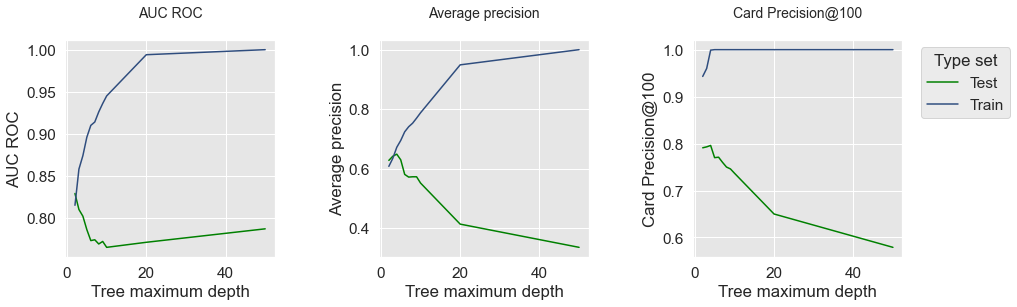

In [162]:
get_performances_plots(performances_df, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Train'],expe_type_color_list=['#008000','#2F4D7E'])

### Hold Out Validation

In [163]:
classifier = sklearn.tree.DecisionTreeClassifier(max_depth = 2, random_state=0)

delta_valid = delta_test

start_date_training_with_valid = start_date_training+datetime.timedelta(days=-(delta_delay+delta_valid))

performances_df_validation=get_performances_train_test_sets(transactions_df, 
                                                            classifier, 
                                                            input_features, output_feature,
                                                            start_date_training=start_date_training_with_valid, 
                                                            delta_train=delta_train, 
                                                            delta_delay=delta_delay, 
                                                            delta_test=delta_test,
                                                            type_test='Validation', parameter_summary='2')

In [164]:
performances_df_validation

AUC ROC Validation  Average precision Validation  \
0               0.817                         0.613   

   Card Precision@100 Validation  AUC ROC Train  Average precision Train  \
0                          0.763          0.825                    0.644   

   Card Precision@100 Train  Execution time Parameters summary  
0                     0.983         0.09986                  2

In [165]:
performances_df[:1]

AUC ROC Test  Average precision Test  Card Precision@100 Test  \
0         0.829                   0.628                    0.791   

   AUC ROC Train  Average precision Train  Card Precision@100 Train  \
0          0.815                    0.608                     0.943   

   Execution time  Parameters summary  
0        0.100101                   2

In [166]:
list_params = [2,3,4,5,6,7,8,9,10,20,50]

performances_df_validation=pd.DataFrame()

for max_depth in list_params:
    
    classifier = sklearn.tree.DecisionTreeClassifier(max_depth = max_depth, random_state=0)

    performances_df_validation=performances_df_validation.append(
        get_performances_train_test_sets(transactions_df, 
                                         classifier,
                                         input_features, output_feature,
                                         start_date_training=start_date_training_with_valid, 
                                         delta_train=delta_train, 
                                         delta_delay=delta_delay, 
                                         delta_test=delta_test, 
                                         type_test='Validation', parameter_summary=max_depth
                                        )
    )
    
performances_df_validation.reset_index(inplace=True,drop=True)

In [167]:
performances_df_validation

AUC ROC Validation  Average precision Validation  \
0                0.817                         0.613   
1                0.819                         0.630   
2                0.810                         0.620   
3                0.798                         0.617   
4                0.770                         0.598   
5                0.767                         0.572   
6                0.742                         0.555   
7                0.730                         0.551   
8                0.730                         0.517   
9                0.741                         0.386   
10               0.767                         0.344   

    Card Precision@100 Validation  AUC ROC Train  Average precision Train  \
0                           0.763          0.825                    0.644   
1                           0.763          0.863                    0.675   
2                           0.750          0.890                    0.683   
3                           0.749          0.911                    0.714   
4                           0.747          0.922                    0.742   
5                           0.727          0.928                    0.763   
6                           0.719          0.938                    0.781   
7                           0.723          0.947                    0.806   
8                           0.716          0.954                    0.828   
9                           0.617          0.998                    0.976   
10                          0.584          1.000                    1.000   

    Card Precision@100 Train  Execution time  Parameters summary  
0                      0.983        0.099774                   2  
1                      0.999        0.144896                   3  
2                      1.000        0.185102                   4  
3                      1.000        0.215212                   5  
4                      1.000        0.249565                   6  
5                      1.000        0.280845                   7  
6                      1.000        0.315517                   8  
7                      1.000        0.347373                   9  
8                      1.000        0.377265                  10  
9                      1.000        0.593179                  20  
10                     1.000        0.620665                  50

In [168]:
performances_df_validation['AUC ROC Test']=performances_df['AUC ROC Test']
performances_df_validation['Average precision Test']=performances_df['Average precision Test']
performances_df_validation['Card Precision@100 Test']=performances_df['Card Precision@100 Test']

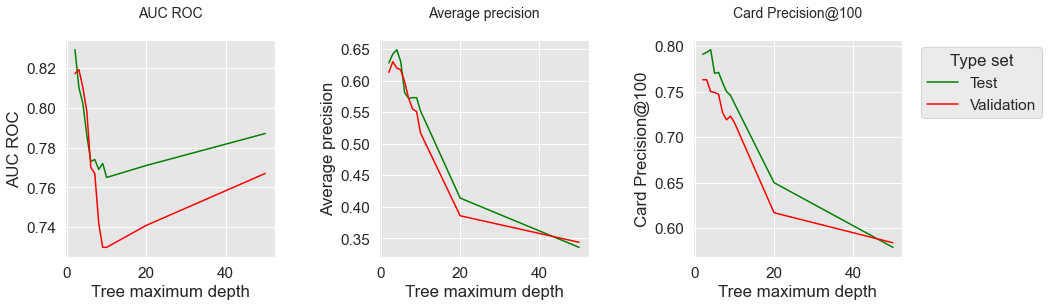

In [169]:
get_performances_plots(performances_df_validation, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Validation'],expe_type_color_list=['#008000','#FF0000'])

### Repeated hold-out validation

In [170]:
def repeated_holdout_validation(transactions_df, classifier, 
                                start_date_training, 
                                delta_train=7, delta_delay=7, delta_test=7,
                                n_folds=4,
                                sampling_ratio=0.7,
                                top_k_list=[100],
                                type_test="Test", parameter_summary=""):

    performances_df_folds=pd.DataFrame()
    
    start_time=time.time() 
    
    for fold in range(n_folds):
        
        # Get the training and test sets
        (train_df, test_df)=get_train_test_set(transactions_df,
                                               start_date_training,
                                               delta_train=delta_train,delta_delay=delta_delay,delta_test=delta_test,
                                               
                                              )
    
        
        # Fit model  
        model_and_predictions_dictionary = fit_model_and_get_predictions(classifier, train_df, test_df, 
                                                                         input_features, output_feature)
        
        # Compute fraud detection performances
        test_df['predictions']=model_and_predictions_dictionary['predictions_test']
        performances_df_test=performance_assessment(test_df, top_k_list=top_k_list)
        performances_df_test.columns=performances_df_test.columns.values+' '+type_test
        
        train_df['predictions']=model_and_predictions_dictionary['predictions_train']
        performances_df_train=performance_assessment(train_df, top_k_list=top_k_list)
        performances_df_train.columns=performances_df_train.columns.values+' Train'
    
        performances_df_folds=performances_df_folds.append(pd.concat([performances_df_test,performances_df_train],axis=1))
    
    execution_time=time.time()-start_time
    
    performances_df_folds_mean=performances_df_folds.mean()
    performances_df_folds_std=performances_df_folds.std(ddof=0)
    
    performances_df_folds_mean=pd.DataFrame(performances_df_folds_mean).transpose()
    performances_df_folds_std=pd.DataFrame(performances_df_folds_std).transpose()
    performances_df_folds_std.columns=performances_df_folds_std.columns.values+" Std"
    performances_df=pd.concat([performances_df_folds_mean,performances_df_folds_std],axis=1)
    
    performances_df['Execution time']=execution_time
    
    performances_df['Parameters summary']=parameter_summary
    
    return performances_df, performances_df_folds

In [171]:
classifier = sklearn.tree.DecisionTreeClassifier(max_depth = 2, random_state=0)

performances_df_repeated_holdout_summary, \
performances_df_repeated_holdout_folds=repeated_holdout_validation(
    transactions_df, classifier, 
    start_date_training=start_date_training_with_valid, 
    delta_train=delta_train, 
    delta_delay=delta_delay, 
    delta_test=delta_test, 
    n_folds=4,
    sampling_ratio=0.7,
    type_test="Validation", parameter_summary='2'
)

In [172]:
performances_df_repeated_holdout_summary

AUC ROC Validation  Average precision Validation  \
0               0.817                         0.613   

   Card Precision@100 Validation  AUC ROC Train  Average precision Train  \
0                          0.763          0.825                    0.644   

   Card Precision@100 Train  AUC ROC Validation Std  \
0                     0.983                     0.0   

   Average precision Validation Std  Card Precision@100 Validation Std  \
0                               0.0                                0.0   

   AUC ROC Train Std  Average precision Train Std  \
0                0.0                          0.0   

   Card Precision@100 Train Std  Execution time Parameters summary  
0                           0.0        1.062282                  2

In [173]:
performances_df_repeated_holdout_folds

AUC ROC Validation  Average precision Validation  \
0               0.817                         0.613   
0               0.817                         0.613   
0               0.817                         0.613   
0               0.817                         0.613   

   Card Precision@100 Validation  AUC ROC Train  Average precision Train  \
0                          0.763          0.825                    0.644   
0                          0.763          0.825                    0.644   
0                          0.763          0.825                    0.644   
0                          0.763          0.825                    0.644   

   Card Precision@100 Train  
0                     0.983  
0                     0.983  
0                     0.983  
0                     0.983

In [174]:
list_params = [2,3,4,5,6,7,8,9,10,20,50]

performances_df_repeated_holdout=pd.DataFrame()

start_time=time.time()

for max_depth in list_params:
    
    print("Computing performances for a decision tree with max_depth="+str(max_depth))
    
    classifier = sklearn.tree.DecisionTreeClassifier(max_depth = max_depth, random_state=0)

    performances_df_repeated_holdout=performances_df_repeated_holdout.append(
        repeated_holdout_validation(
            transactions_df, classifier, 
            start_date_training=start_date_training_with_valid, 
            delta_train=delta_train, 
            delta_delay=delta_delay, 
            delta_test=delta_test,
            n_folds=4,
            sampling_ratio=0.7,
            type_test="Validation", parameter_summary=max_depth
        )[0]
    )
    
performances_df_repeated_holdout.reset_index(inplace=True,drop=True)

print("Total execution time: "+str(round(time.time()-start_time,2))+"s")

Computing performances for a decision tree with max_depth=2
Computing performances for a decision tree with max_depth=3
Computing performances for a decision tree with max_depth=4
Computing performances for a decision tree with max_depth=5
Computing performances for a decision tree with max_depth=6
Computing performances for a decision tree with max_depth=7
Computing performances for a decision tree with max_depth=8
Computing performances for a decision tree with max_depth=9
Computing performances for a decision tree with max_depth=10
Computing performances for a decision tree with max_depth=20
Computing performances for a decision tree with max_depth=50
Total execution time: 21.21s


In [175]:
performances_df_repeated_holdout

AUC ROC Validation  Average precision Validation  \
0                0.817                         0.613   
1                0.819                         0.630   
2                0.810                         0.620   
3                0.798                         0.617   
4                0.770                         0.598   
5                0.767                         0.572   
6                0.742                         0.555   
7                0.730                         0.551   
8                0.730                         0.517   
9                0.741                         0.386   
10               0.767                         0.344   

    Card Precision@100 Validation  AUC ROC Train  Average precision Train  \
0                           0.763          0.825                    0.644   
1                           0.763          0.863                    0.675   
2                           0.750          0.890                    0.683   
3                           0.749          0.911                    0.714   
4                           0.747          0.922                    0.742   
5                           0.727          0.928                    0.763   
6                           0.719          0.938                    0.781   
7                           0.723          0.947                    0.806   
8                           0.716          0.954                    0.828   
9                           0.617          0.998                    0.976   
10                          0.584          1.000                    1.000   

    Card Precision@100 Train  AUC ROC Validation Std  \
0                      0.983                     0.0   
1                      0.999                     0.0   
2                      1.000                     0.0   
3                      1.000                     0.0   
4                      1.000                     0.0   
5                      1.000                     0.0   
6                      1.000                     0.0   
7                      1.000                     0.0   
8                      1.000                     0.0   
9                      1.000                     0.0   
10                     1.000                     0.0   

    Average precision Validation Std  Card Precision@100 Validation Std  \
0                                0.0                                0.0   
1                                0.0                                0.0   
2                                0.0                                0.0   
3                                0.0                                0.0   
4                                0.0                                0.0   
5                                0.0                                0.0   
6                                0.0                                0.0   
7                                0.0                                0.0   
8                                0.0                                0.0   
9                                0.0                                0.0   
10                               0.0                                0.0   

    AUC ROC Train Std  Average precision Train Std  \
0                 0.0                          0.0   
1                 0.0                          0.0   
2                 0.0                          0.0   
3                 0.0                          0.0   
4                 0.0                          0.0   
5                 0.0                          0.0   
6                 0.0                          0.0   
7                 0.0                          0.0   
8                 0.0                          0.0   
9                 0.0                          0.0   
10                0.0                          0.0   

    Card Precision@100 Train Std  Execution time  Parameters summary  
0                            0.0        1.064248                   2  
1                            0.0        1

In [176]:
performances_df

AUC ROC Test  Average precision Test  Card Precision@100 Test  \
0          0.829                   0.628                    0.791   
1          0.810                   0.642                    0.793   
2          0.802                   0.649                    0.796   
3          0.786                   0.630                    0.770   
4          0.773                   0.581                    0.771   
5          0.774                   0.572                    0.760   
6          0.769                   0.573                    0.750   
7          0.772                   0.573                    0.746   
8          0.765                   0.552                    0.737   
9          0.771                   0.414                    0.650   
10         0.787                   0.336                    0.579   

    AUC ROC Train  Average precision Train  Card Precision@100 Train  \
0           0.815                    0.608                     0.943   
1           0.858                    0.635                     0.960   
2           0.874                    0.672                     0.999   
3           0.896                    0.695                     1.000   
4           0.910                    0.724                     1.000   
5           0.914                    0.741                     1.000   
6           0.926                    0.753                     1.000   
7           0.936                    0.770                     1.000   
8           0.945                    0.788                     1.000   
9           0.994                    0.949                     1.000   
10          1.000                    1.000                     1.000   

    Execution time  Parameters summary  
0         0.100101                   2  
1         0.138528                   3  
2         0.174341                   4  
3         0.211870                   5  
4         0.246596                   6  
5         0.280895                   7  
6         0.313830                   8  
7         0.344990                   9  
8         0.376916                  10  
9         0.564249                  20  
10        0.587004                  50

In [177]:
performances_df_repeated_holdout['AUC ROC Test']=performances_df['AUC ROC Test']
performances_df_repeated_holdout['Average precision Test']=performances_df['Average precision Test']
performances_df_repeated_holdout['Card Precision@100 Test']=performances_df['Card Precision@100 Test']

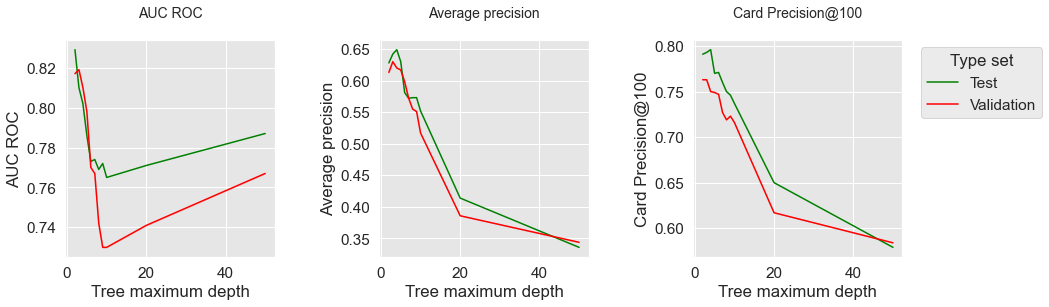

In [178]:
get_performances_plots(
    performances_df_repeated_holdout, 
    performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
    expe_type_list=['Test','Validation'],expe_type_color_list=['#008000','#FF0000']
)

### Prequential Validation

In [179]:
def prequential_validation(transactions_df, classifier, 
                           start_date_training, 
                           delta_train=7, 
                           delta_delay=7, 
                           delta_assessment=7,
                           n_folds=4,
                           top_k_list=[100],
                           type_test="Test", parameter_summary=""):

    performances_df_folds=pd.DataFrame()
    
    start_time=time.time() 
    
    for fold in range(n_folds):
        
        start_date_training_fold=start_date_training-datetime.timedelta(days=fold*delta_assessment)
        
        # Get the training and test sets
        (train_df, test_df)=get_train_test_set(transactions_df,
                                               start_date_training=start_date_training_fold,
                                               delta_train=delta_train,
                                               delta_delay=delta_delay,
                                               delta_test=delta_assessment)
    
        # Fit model
        model_and_predictions_dictionary = fit_model_and_get_predictions(classifier, train_df, test_df, 
                                                                     input_features, output_feature)
        
        # Compute fraud detection performances    
        test_df['predictions']=model_and_predictions_dictionary['predictions_test']
        performances_df_test=performance_assessment(test_df, top_k_list=top_k_list, rounded=False)
        performances_df_test.columns=performances_df_test.columns.values+' '+type_test
        
        train_df['predictions']=model_and_predictions_dictionary['predictions_train']
        performances_df_train=performance_assessment(train_df, top_k_list=top_k_list, rounded=False)
        performances_df_train.columns=performances_df_train.columns.values+' Train'
    
        performances_df_folds=performances_df_folds.append(pd.concat([performances_df_test,performances_df_train],axis=1))
    
    execution_time=time.time()-start_time
    
    performances_df_folds_mean=performances_df_folds.mean()
    performances_df_folds_std=performances_df_folds.std(ddof=0)
    
    performances_df_folds_mean=pd.DataFrame(performances_df_folds_mean).transpose()
    performances_df_folds_std=pd.DataFrame(performances_df_folds_std).transpose()
    performances_df_folds_std.columns=performances_df_folds_std.columns.values+" Std"
    performances_df=pd.concat([performances_df_folds_mean,performances_df_folds_std],axis=1)
    
    performances_df['Execution time']=execution_time
    
    performances_df['Parameters summary']=parameter_summary
    
    return performances_df, performances_df_folds

In [180]:
classifier = sklearn.tree.DecisionTreeClassifier(max_depth = 2, random_state=0)

performances_df_prequential_summary, performances_df_prequential_folds=prequential_validation(
    transactions_df, classifier, 
    start_date_training=start_date_training_with_valid, 
    delta_train=delta_train, 
    delta_delay=delta_delay, 
    delta_assessment=delta_valid, 
    n_folds=4,
    type_test="Validation", parameter_summary='2'
)

In [181]:
performances_df_prequential_summary

AUC ROC Validation  Average precision Validation  \
0            0.822488                      0.628595   

   Card Precision@100 Validation  AUC ROC Train  Average precision Train  \
0                       0.768929       0.823678                 0.629443   

   Card Precision@100 Train  AUC ROC Validation Std  \
0                  0.980357                 0.01024   

   Average precision Validation Std  Card Precision@100 Validation Std  \
0                          0.026734                           0.016487   

   AUC ROC Train Std  Average precision Train Std  \
0           0.002976                     0.010198   

   Card Precision@100 Train Std  Execution time Parameters summary  
0                      0.018389        1.072969                  2

In [182]:
performances_df_prequential_folds

AUC ROC Validation  Average precision Validation  \
0            0.816590                      0.612761   
0            0.810321                      0.610299   
0            0.837582                      0.674737   
0            0.825458                      0.616581   

   Card Precision@100 Validation  AUC ROC Train  Average precision Train  \
0                       0.762857       0.824858                 0.643504   
0                       0.777143       0.824870                 0.632279   
0                       0.790000       0.818632                 0.615184   
0                       0.745714       0.826353                 0.626806   

   Card Precision@100 Train  
0                  0.982857  
0                  0.998571  
0                  0.990000  
0                  0.950000

In [183]:
list_params = [2,3,4,5,6,7,8,9,10,20,50]

start_time=time.time()

performances_df_prequential=pd.DataFrame()

for max_depth in list_params:
    
    print("Computing performances for a decision tree with max_depth="+str(max_depth))
    
    classifier = sklearn.tree.DecisionTreeClassifier(max_depth = max_depth, random_state=0)

    performances_df_prequential=performances_df_prequential.append(
        prequential_validation(
            transactions_df, classifier,
            start_date_training=start_date_training_with_valid, 
            delta_train=delta_train, 
            delta_delay=delta_delay, 
            delta_assessment=delta_test,
            n_folds=4,
            type_test="Validation", parameter_summary=max_depth
        )[0]
    )
    
performances_df_prequential.reset_index(inplace=True,drop=True)

print("Total execution time: "+str(round(time.time()-start_time,2))+"s")

Computing performances for a decision tree with max_depth=2
Computing performances for a decision tree with max_depth=3
Computing performances for a decision tree with max_depth=4
Computing performances for a decision tree with max_depth=5
Computing performances for a decision tree with max_depth=6
Computing performances for a decision tree with max_depth=7
Computing performances for a decision tree with max_depth=8
Computing performances for a decision tree with max_depth=9
Computing performances for a decision tree with max_depth=10
Computing performances for a decision tree with max_depth=20
Computing performances for a decision tree with max_depth=50
Total execution time: 21.82s


In [184]:
performances_df_prequential

AUC ROC Validation  Average precision Validation  \
0             0.822488                      0.628595   
1             0.823936                      0.642012   
2             0.815314                      0.629906   
3             0.806612                      0.627199   
4             0.790856                      0.612854   
5             0.763778                      0.571055   
6             0.757061                      0.559814   
7             0.751698                      0.532670   
8             0.756299                      0.527948   
9             0.760673                      0.430746   
10            0.789777                      0.352620   

    Card Precision@100 Validation  AUC ROC Train  Average precision Train  \
0                        0.768929       0.823678                 0.629443   
1                        0.767857       0.841699                 0.663970   
2                        0.763214       0.859258                 0.678154   
3                        0.761429       0.869931                 0.696694   
4                        0.757143       0.885758                 0.716183   
5                        0.740714       0.897749                 0.731186   
6                        0.733214       0.905150                 0.745364   
7                        0.715357       0.912346                 0.760079   
8                        0.719643       0.921003                 0.772179   
9                        0.645357       0.980301                 0.916887   
10                       0.574286       1.000000                 1.000000   

    Card Precision@100 Train  AUC ROC Validation Std  \
0                   0.980357                0.010240   
1                   0.996429                0.006849   
2                   0.998929                0.008007   
3                   0.999286                0.016058   
4                   1.000000                0.016766   
5                   1.000000                0.003783   
6                   1.000000                0.011561   
7                   1.000000                0.013730   
8                   1.000000                0.018102   
9                   1.000000                0.015092   
10                  1.000000                0.016379   

    Average precision Validation Std  Card Precision@100 Validation Std  \
0                           0.026734                           0.016487   
1                           0.020970                           0.008950   
2                           0.013266                           0.011578   
3                           0.011935                           0.013209   
4                           0.011112                           0.008391   
5                           0.020637                           0.011089   
6                           0.022337                           0.009388   
7                           0.023010                           0.014547   
8                           0.026253                           0.014547   
9                           0.026287                           0.022369   
10                          0.007972                           0.019821   

    AUC ROC Train Std  Average precision Train Std  \
0            0.002976                     0.010198   
1            0.013026                     0.011970   
2            0.022209                     0.010808   
3            0.030903                     0.017145   
4            0.030326                     0.024486   
5            0.031767                     0.029126   
6            0.033289                     0.030557   
7            0.035641                     0.038160   
8            0.033292                     0.044174   
9            0.020509                     0.055840   
10           0.000000                     0.000000   

    Card Precision@100 Train Std  Execution time  Parameters summary  
0                       0.018389        1.066089                   2  
1                       0.002945        1

In [185]:
performances_df_prequential['AUC ROC Test']=performances_df['AUC ROC Test']
performances_df_prequential['Average precision Test']=performances_df['Average precision Test']
performances_df_prequential['Card Precision@100 Test']=performances_df['Card Precision@100 Test']

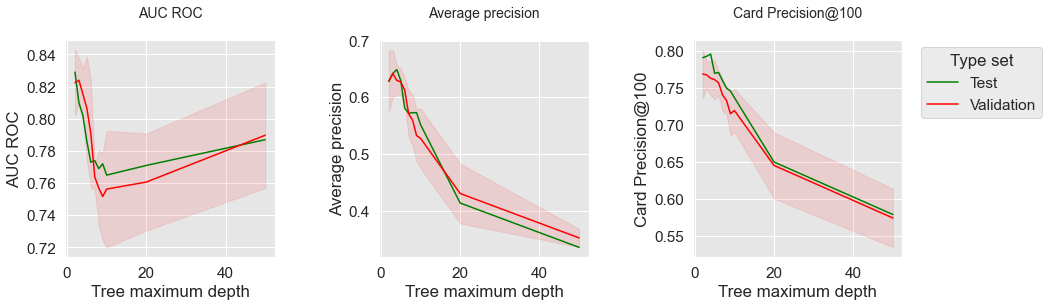

In [186]:
get_performances_plots(performances_df_prequential, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Validation'], expe_type_color_list=['#008000','#FF0000'])

In [187]:
list_params = [2,3,4,5,6,7,8,9,10,20,50]

start_time=time.time()

n_folds=4

performances_df_prequential_test=pd.DataFrame()

for max_depth in list_params:
    
    classifier = sklearn.tree.DecisionTreeClassifier(max_depth = max_depth, random_state=0)

    performances_df_prequential_test=performances_df_prequential_test.append(
        prequential_validation(
            transactions_df, classifier, 
            start_date_training=start_date_training 
                +datetime.timedelta(days=delta_test*(n_folds-1)), 
            delta_train=delta_train, 
            delta_delay=delta_delay, 
            delta_assessment=delta_test,
            n_folds=n_folds,
            type_test="Test", parameter_summary=max_depth
        )[0]
    )
    
performances_df_prequential_test.reset_index(inplace=True,drop=True)

print("Total execution time: "+str(round(time.time()-start_time,2))+"s")

Total execution time: 21.57s


In [188]:
performances_df_prequential_test

AUC ROC Test  Average precision Test  Card Precision@100 Test  \
0       0.815937                0.605640                 0.762143   
1       0.812402                0.612593                 0.770357   
2       0.810112                0.612529                 0.763571   
3       0.800454                0.608119                 0.755714   
4       0.796430                0.593692                 0.754286   
5       0.797134                0.579307                 0.748214   
6       0.795689                0.574594                 0.740714   
7       0.788176                0.568043                 0.738571   
8       0.787354                0.558383                 0.732857   
9       0.779433                0.447525                 0.661071   
10      0.792776                0.352627                 0.571429   

    AUC ROC Train  Average precision Train  Card Precision@100 Train  \
0        0.822510                 0.625017                  0.970000   
1        0.836820                 0.655090                  0.987857   
2        0.850281                 0.675893                  0.999643   
3        0.865633                 0.692048                  1.000000   
4        0.876693                 0.709761                  1.000000   
5        0.891392                 0.722112                  1.000000   
6        0.901725                 0.737333                  1.000000   
7        0.917025                 0.752881                  1.000000   
8        0.926572                 0.770770                  1.000000   
9        0.991523                 0.932968                  1.000000   
10       1.000000                 1.000000                  1.000000   

    AUC ROC Test Std  Average precision Test Std  Card Precision@100 Test Std  \
0           0.010198                    0.027249                     0.025902   
1           0.005008                    0.023809                     0.022955   
2           0.006423                    0.021206                     0.024918   
3           0.012200                    0.016021                     0.018736   
4           0.015244                    0.008275                     0.014983   
5           0.014466                    0.005323                     0.010516   
6           0.017535                    0.004919                     0.011451   
7           0.010634                    0.012710                     0.014604   
8           0.015226                    0.012295                     0.017409   
9           0.008611                    0.022865                     0.015531   
10          0.004280                    0.013937                     0.011562   

    AUC ROC Train Std  Average precision Train Std  \
0            0.006604                     0.012564   
1            0.013490                     0.017439   
2            0.017926                     0.012664   
3            0.024083                     0.015746   
4            0.026356                     0.019709   
5            0.018002                     0.019414   
6            0.020793                     0.020558   
7            0.017307                     0.021537   
8            0.015728                     0.021606   
9            0.002282                     0.012541   
10           0.000000                     0.000000   

    Card Precision@100 Train Std  Execution time  Parameters summary  
0                       0.022429        1.072772                   2  
1                       0.016304        1.218697                   3  
2                       0.000619        1.385401                   4  
3                       0.000000        1.573147                   5  
4                       0.000000        1.678611                   6  
5                       0.000000        1.822720                   7  
6                       0.000000        1.971356                   8  
7                       0.000000        2.109216                   9  
8                       0.000000        2.273957 

In [189]:
performances_df_prequential

AUC ROC Validation  Average precision Validation  \
0             0.822488                      0.628595   
1             0.823936                      0.642012   
2             0.815314                      0.629906   
3             0.806612                      0.627199   
4             0.790856                      0.612854   
5             0.763778                      0.571055   
6             0.757061                      0.559814   
7             0.751698                      0.532670   
8             0.756299                      0.527948   
9             0.760673                      0.430746   
10            0.789777                      0.352620   

    Card Precision@100 Validation  AUC ROC Train  Average precision Train  \
0                        0.768929       0.823678                 0.629443   
1                        0.767857       0.841699                 0.663970   
2                        0.763214       0.859258                 0.678154   
3                        0.761429       0.869931                 0.696694   
4                        0.757143       0.885758                 0.716183   
5                        0.740714       0.897749                 0.731186   
6                        0.733214       0.905150                 0.745364   
7                        0.715357       0.912346                 0.760079   
8                        0.719643       0.921003                 0.772179   
9                        0.645357       0.980301                 0.916887   
10                       0.574286       1.000000                 1.000000   

    Card Precision@100 Train  AUC ROC Validation Std  \
0                   0.980357                0.010240   
1                   0.996429                0.006849   
2                   0.998929                0.008007   
3                   0.999286                0.016058   
4                   1.000000                0.016766   
5                   1.000000                0.003783   
6                   1.000000                0.011561   
7                   1.000000                0.013730   
8                   1.000000                0.018102   
9                   1.000000                0.015092   
10                  1.000000                0.016379   

    Average precision Validation Std  Card Precision@100 Validation Std  \
0                           0.026734                           0.016487   
1                           0.020970                           0.008950   
2                           0.013266                           0.011578   
3                           0.011935                           0.013209   
4                           0.011112                           0.008391   
5                           0.020637                           0.011089   
6                           0.022337                           0.009388   
7                           0.023010                           0.014547   
8                           0.026253                           0.014547   
9                           0.026287                           0.022369   
10                          0.007972                           0.019821   

    AUC ROC Train Std  Average precision Train Std  \
0            0.002976                     0.010198   
1            0.013026                     0.011970   
2            0.022209                     0.010808   
3            0.030903                     0.017145   
4            0.030326                     0.024486   
5            0.031767                     0.029126   
6            0.033289                     0.030557   
7            0.035641                     0.038160   
8            0.033292                     0.044174   
9            0.020509                     0.055840   
10           0.000000                     0.000000   

    Card Precision@100 Train Std  Execution time  Parameters summary  \
0                       0.018389        1.066089                   2   
1                       0.002945       

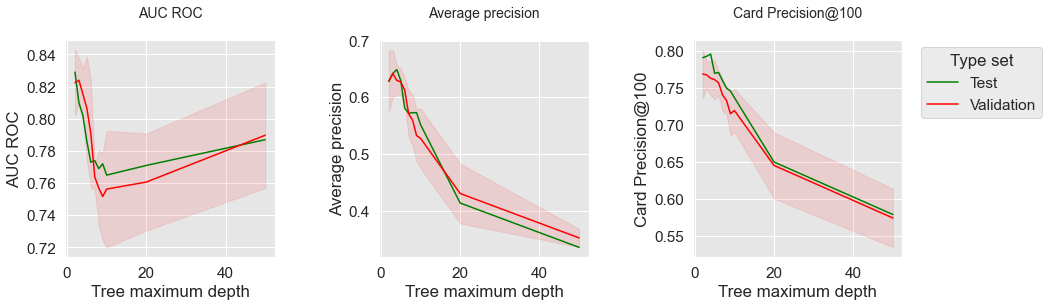

In [190]:
get_performances_plots(performances_df_prequential, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Validation'], expe_type_color_list=['#008000','#FF0000'])

### Prequential Splitting

In [191]:
def prequentialSplit(transactions_df,
                     start_date_training, 
                     n_folds=4, 
                     delta_train=7,
                     delta_delay=7,
                     delta_assessment=7):
    
    prequential_split_indices=[]
        
    # For each fold
    for fold in range(n_folds):
        
        # Shift back start date for training by the fold index times the assessment period (delta_assessment)
        # (See Fig. 5)
        start_date_training_fold = start_date_training-datetime.timedelta(days=fold*delta_assessment)
        
        # Get the training and test (assessment) sets
        (train_df, test_df)=get_train_test_set(transactions_df,
                                               start_date_training=start_date_training_fold,
                                               delta_train=delta_train,delta_delay=delta_delay,delta_test=delta_assessment)
    
        # Get the indices from the two sets, and add them to the list of prequential splits
        indices_train=list(train_df.index)
        indices_test=list(test_df.index)
        
        prequential_split_indices.append((indices_train,indices_test))
    
    return prequential_split_indices

### Card Precision Top -K

In [192]:
def card_precision_top_k_custom(y_true, y_pred, top_k, transactions_df):
    
    # Let us create a predictions_df DataFrame, that contains all transactions matching the indices of the current fold
    # (indices of the y_true vector)
    predictions_df=transactions_df.iloc[y_true.index.values].copy()
    predictions_df['predictions']=y_pred
    
    # Compute the CP@k using the function implemented in Chapter 4, Section 4.2
    nb_compromised_cards_per_day,card_precision_top_k_per_day_list,mean_card_precision_top_k=\
        card_precision_top_k(predictions_df, top_k)
    
    # Return the mean_card_precision_top_k
    return mean_card_precision_top_k

# Only keep columns that are needed as argument to the custom scoring function
# (in order to reduce the serialization time of transaction dataset)
transactions_df_scorer=transactions_df[['customer_id'
                                        , 'TX_FRAUD','TX_TIME_DAYS']]

# Make scorer using card_precision_top_k_custom
card_precision_top_100 = sklearn.metrics.make_scorer(card_precision_top_k_custom, 
                                                     needs_proba=True, 
                                                     top_k=100, 
                                                     transactions_df=transactions_df_scorer)

### Grid Search 

In [193]:
# Estimator to use
classifier = sklearn.tree.DecisionTreeClassifier()

# Hyperparameters to test
parameters = {'clf__max_depth':[2,4], 'clf__random_state':[0]}

# Scoring functions. AUC ROC and Average Precision are readily available from sklearn 
# with `auc_roc` and `average_precision`. Card Precision@100 was implemented with the make_scorer factory function. 
scoring = {'roc_auc':'roc_auc',
           'average_precision': 'average_precision',
           'card_precision@100': card_precision_top_100
           }

# A pipeline is created to scale data before fitting a model
estimators = [('scaler', sklearn.preprocessing.StandardScaler()), ('clf', classifier)]
pipe = sklearn.pipeline.Pipeline(estimators)

# Indices for the prequential validation are obtained with the prequentialSplit function
prequential_split_indices = prequentialSplit(transactions_df,
                                             start_date_training_with_valid, 
                                             n_folds=n_folds,
                                             delta_train=delta_train, 
                                             delta_delay=delta_delay, 
                                             delta_assessment=delta_valid)

# Let us instantiate the GridSearchCV
grid_search = sklearn.model_selection.GridSearchCV(pipe, param_grid=parameters, scoring=scoring, \
                                                   cv=prequential_split_indices, refit=False, n_jobs=-1,verbose=0)

# And select the input features, and output feature
X=transactions_df[input_features]
y=transactions_df[output_feature]

In [194]:
%time grid_search.fit(X, y)

print("Finished CV fitting")

CPU times: user 90.4 ms, sys: 544 ms, total: 634 ms
Wall time: 2.67 s
Finished CV fitting


In [195]:
grid_search.cv_results_

{'mean_fit_time': array([0.71842694, 0.82144505]),
 'std_fit_time': array([0.00842175, 0.01650636]),
 'mean_score_time': array([0.04704934, 0.03041589]),
 'std_score_time': array([0.00361733, 0.00242023]),
 'param_clf__max_depth': masked_array(data=[2, 4],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_clf__random_state': masked_array(data=[0, 0],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__max_depth': 2, 'clf__random_state': 0},
  {'clf__max_depth': 4, 'clf__random_state': 0}],
 'split0_test_roc_auc': array([0.81659029, 0.80993838]),
 'split1_test_roc_auc': array([0.81032128, 0.80534587]),
 'split2_test_roc_auc': array([0.83758192, 0.82069719]),
 'split3_test_roc_auc': array([0.82545783, 0.82527361]),
 'mean_test_roc_auc': array([0.82248783, 0.81531376]),
 'std_test_roc_auc': array([0.01024034, 0.00800677]),
 'rank_test_roc_auc': array([1, 2], dtype=int32),
 'split0_test_avera

In [196]:
performances_df=pd.DataFrame()

expe_type="Validation"

performance_metrics_list_grid=['roc_auc', 'average_precision', 'card_precision@100']
performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100']


for i in range(len(performance_metrics_list_grid)):
    performances_df[performance_metrics_list[i]+' '+expe_type]=grid_search.cv_results_['mean_test_'+performance_metrics_list_grid[i]]
    performances_df[performance_metrics_list[i]+' '+expe_type+' Std']=grid_search.cv_results_['std_test_'+performance_metrics_list_grid[i]]

performances_df['Execution time']=grid_search.cv_results_['mean_fit_time']

performances_df['Parameters']=list(grid_search.cv_results_['params'])

In [197]:
performances_df

AUC ROC Validation  AUC ROC Validation Std  Average precision Validation  \
0            0.822488                0.010240                      0.628595   
1            0.815314                0.008007                      0.629906   

   Average precision Validation Std  Card Precision@100 Validation  \
0                          0.026734                       0.768929   
1                          0.013266                       0.763214   

   Card Precision@100 Validation Std  Execution time  \
0                           0.016487        0.718427   
1                           0.011578        0.821445   

                                      Parameters  
0  {'clf__max_depth': 2, 'clf__random_state': 0}  
1  {'clf__max_depth': 4, 'clf__random_state': 0}

### Integration

In [198]:
def prequential_grid_search(transactions_df, 
                            classifier, 
                            input_features, output_feature, 
                            parameters, scoring, 
                            start_date_training, 
                            n_folds=4,
                            expe_type='Test',
                            delta_train=7, 
                            delta_delay=7, 
                            delta_assessment=7,
                            performance_metrics_list_grid=['roc_auc'],
                            performance_metrics_list=['AUC ROC'],
                            n_jobs=-1):
    
    estimators = [('scaler', sklearn.preprocessing.StandardScaler()), ('clf', classifier)]
    pipe = sklearn.pipeline.Pipeline(estimators)
    
    prequential_split_indices=prequentialSplit(transactions_df,
                                               start_date_training=start_date_training, 
                                               n_folds=n_folds, 
                                               delta_train=delta_train, 
                                               delta_delay=delta_delay, 
                                               delta_assessment=delta_assessment)
    
    grid_search = sklearn.model_selection.GridSearchCV(pipe, parameters, scoring=scoring, cv=prequential_split_indices, refit=False, n_jobs=n_jobs)
    
    X=transactions_df[input_features]
    y=transactions_df[output_feature]

    grid_search.fit(X, y)
    
    performances_df=pd.DataFrame()
    
    for i in range(len(performance_metrics_list_grid)):
        performances_df[performance_metrics_list[i]+' '+expe_type]=grid_search.cv_results_['mean_test_'+performance_metrics_list_grid[i]]
        performances_df[performance_metrics_list[i]+' '+expe_type+' Std']=grid_search.cv_results_['std_test_'+performance_metrics_list_grid[i]]

    performances_df['Parameters']=grid_search.cv_results_['params']
    performances_df['Execution time']=grid_search.cv_results_['mean_fit_time']
    
    return performances_df

        

In [199]:
start_time=time.time()

classifier = sklearn.tree.DecisionTreeClassifier()

parameters = {'clf__max_depth':[2,3,4,5,6,7,8,9,10,20,50], 'clf__random_state':[0]}

scoring = {'roc_auc':'roc_auc',
           'average_precision': 'average_precision',
           'card_precision@100': card_precision_top_100,
           }

performances_df_validation=prequential_grid_search(
    transactions_df, classifier, 
    input_features, output_feature,
    parameters, scoring, 
    start_date_training=start_date_training_with_valid,
    n_folds=n_folds,
    expe_type='Validation',
    delta_train=delta_train, 
    delta_delay=delta_delay, 
    delta_assessment=delta_valid,
    performance_metrics_list_grid=performance_metrics_list_grid,
    performance_metrics_list=performance_metrics_list)

print("Validation: Total execution time: "+str(round(time.time()-start_time,2))+"s")

Validation: Total execution time: 7.17s


In [200]:
start_time=time.time()

performances_df_test=prequential_grid_search(
    transactions_df, classifier, 
    input_features, output_feature,
    parameters, scoring, 
    start_date_training=start_date_training+datetime.timedelta(days=(n_folds-1)*delta_test),
    n_folds=n_folds,
    expe_type='Test',
    delta_train=delta_train, 
    delta_delay=delta_delay, 
    delta_assessment=delta_test,
    performance_metrics_list_grid=performance_metrics_list_grid,
    performance_metrics_list=performance_metrics_list)

print("Test: Total execution time: "+str(round(time.time()-start_time,2))+"s")

Test: Total execution time: 6.6s


In [201]:
performances_df_validation.drop(columns=['Parameters','Execution time'], inplace=True)
performances_df=pd.concat([performances_df_test,performances_df_validation],axis=1)

In [202]:
parameters_dict=dict(performances_df['Parameters'])
max_depth=[parameters_dict[i]['clf__max_depth'] for i in range(len(parameters_dict))]
performances_df['Parameters summary']=max_depth

In [203]:
performances_df

AUC ROC Test  AUC ROC Test Std  Average precision Test  \
0       0.815937          0.010198                0.605640   
1       0.812402          0.005008                0.612593   
2       0.810112          0.006423                0.612529   
3       0.800454          0.012200                0.608119   
4       0.796430          0.015244                0.593692   
5       0.797134          0.014466                0.579307   
6       0.795689          0.017535                0.574594   
7       0.788176          0.010634                0.568043   
8       0.787354          0.015226                0.558383   
9       0.779433          0.008611                0.447525   
10      0.792776          0.004280                0.352627   

    Average precision Test Std  Card Precision@100 Test  \
0                     0.027249                 0.762143   
1                     0.023809                 0.770357   
2                     0.021206                 0.763571   
3                     0.016021                 0.755714   
4                     0.008275                 0.754286   
5                     0.005323                 0.748214   
6                     0.004919                 0.740714   
7                     0.012710                 0.738571   
8                     0.012295                 0.732857   
9                     0.022865                 0.661071   
10                    0.013937                 0.571429   

    Card Precision@100 Test Std  \
0                      0.025902   
1                      0.022955   
2                      0.024918   
3                      0.018736   
4                      0.014983   
5                      0.010516   
6                      0.011451   
7                      0.014604   
8                      0.017409   
9                      0.015531   
10                     0.011562   

                                        Parameters  Execution time  \
0    {'clf__max_depth': 2, 'clf__random_state': 0}        0.722208   
1    {'clf__max_depth': 3, 'clf__random_state': 0}        0.735858   
2    {'clf__max_depth': 4, 'clf__random_state': 0}        0.530414   
3    {'clf__max_depth': 5, 'clf__random_state': 0}        0.544524   
4    {'clf__max_depth': 6, 'clf__random_state': 0}        0.563086   
5    {'clf__max_depth': 7, 'clf__random_state': 0}        0.590910   
6    {'clf__max_depth': 8, 'clf__random_state': 0}        0.692618   
7    {'clf__max_depth': 9, 'clf__random_state': 0}        0.750348   
8   {'clf__max_depth': 10, 'clf__random_state': 0}        0.803504   
9   {'clf__max_depth': 20, 'clf__random_state': 0}        1.189306   
10  {'clf__max_depth': 50, 'clf__random_state': 0}        0.981580   

    AUC ROC Validation  AUC ROC Validation Std  Average precision Validation  \
0             0.822488                0.010240                      0.628595   
1             0.823936                0.006849                      0.642012   
2             0.815314                0.008007                      0.629906   
3             0.806612                0.016058                      0.627199   
4             0.790856                0.016766                      0.612854   
5             0.763778                0.003783                      0.571055   
6             0.757061                0.011561                      0.559814   
7             0.751698                0.013730                      0.532670   
8             0.756299                0.018102                      0.527948   
9             0.760673                0.015092                      0.430746   
10            0.789777                0.016379                      0.352620   

    Average precision Validation Std  Card Precision@100 Validation  \
0                           0.026734                       0.768929   
1                           0.020970                       0.767857   
2                           0.013266                       0.763214   
3                           0.011935       

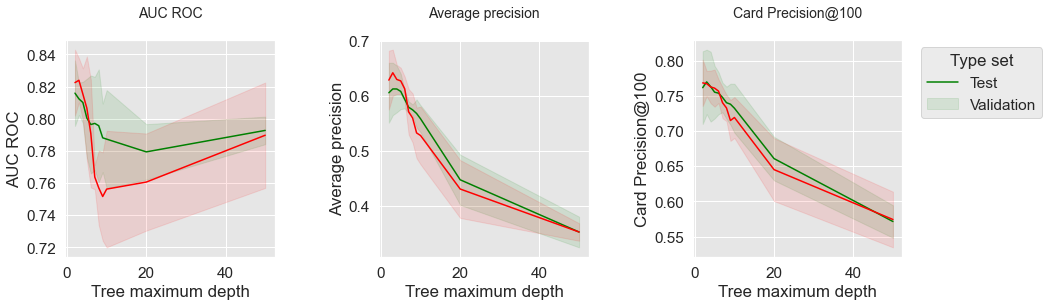

In [204]:
get_performances_plots(performances_df, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Validation'],expe_type_color_list=['#008000','#FF0000'])

In [205]:
# Initialization: Load shared functions and simulated data 

# Load shared functions
!curl -O https://raw.githubusercontent.com/Fraud-Detection-Handbook/fraud-detection-handbook/main/Chapter_References/shared_functions.py
%run shared_functions.py

# Get simulated data from Github repository
if not os.path.exists("simulated-data-transformed"):
    !git clone https://github.com/Fraud-Detection-Handbook/simulated-data-transformed
        

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63257  100 63257    0     0   507k      0 --:--:-- --:--:-- --:--:--  523k


ModuleNotFoundError: No module named 'graphviz'

<Figure size 432x288 with 0 Axes>

In [206]:
# Load data from the 2018-06-11 to the 2018-09-14

DIR_INPUT = 'simulated-data-transformed/data/' 

BEGIN_DATE = "2018-06-11"
END_DATE = "2018-09-14"

print("Load  files")
%time transactions_df = read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)
print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))

output_feature = "TX_FRAUD"

input_features = ['TX_AMOUNT','TX_WEEKEND', 'TX_NIGHT', 'CUSTOMER_ID_NB_TX1DAY_WINDOW', 
                'CUSTOMER_ID_AVG_AMOUNT1DAY_WINDOW ',
       'CUSTOMER_ID_NB_TX7DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT7DAY_WINDOW ',
       'CUSTOMER_ID_NB_TX30DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT30DAY_WINDOW ',
       'terminal_id_NB_TX_1DAY_WINDOW', 'terminal_id_RISK_1DAY_WINDOW',
       'terminal_id_NB_TX_7DAY_WINDOW', 'terminal_id_RISK_7DAY_WINDOW',
       'terminal_id_NB_TX_30DAY_WINDOW', 'terminal_id_RISK_30DAY_WINDOW']

Load  files


NameError: name 'read_from_files' is not defined

7911324 transactions loaded, containing 325833 fraudulent transactions


In [207]:
# Number of folds for the prequential validation
n_folds = 4

# Set the starting day for the training period, and the deltas
start_date_training = datetime.datetime.strptime("2018-07-25", "%Y-%m-%d")
delta_train = delta_delay = delta_test = delta_valid = delta_assessment = 7

start_date_training_for_valid = start_date_training+datetime.timedelta(days=-(delta_delay+delta_valid))
start_date_training_for_test = start_date_training+datetime.timedelta(days=(n_folds-1)*delta_test)

In [208]:

transactions_df_scorer = transactions_df[['customer_id', 'TX_FRAUD','TX_TIME_DAYS']]

card_precision_top_100 = sklearn.metrics.make_scorer(card_precision_top_k_custom, 
                                                     needs_proba=True, 
                                                     top_k=100, 
                                                     transactions_df=transactions_df_scorer)

performance_metrics_list_grid = ['roc_auc', 'average_precision', 'card_precision@100']
performance_metrics_list = ['AUC ROC', 'Average precision', 'Card Precision@100']

scoring = {'roc_auc':'roc_auc',
           'average_precision': 'average_precision',
           'card_precision@100': card_precision_top_100,
           }

In [209]:
def model_selection_wrapper(transactions_df, 
                            classifier, 
                            input_features, output_feature,
                            parameters, 
                            scoring, 
                            start_date_training_for_valid,
                            start_date_training_for_test,
                            n_folds=4,
                            delta_train=7, 
                            delta_delay=7, 
                            delta_assessment=7,
                            performance_metrics_list_grid=['roc_auc'],
                            performance_metrics_list=['AUC ROC'],
                            n_jobs=-1):

    # Get performances on the validation set using prequential validation
    performances_df_validation=prequential_grid_search(transactions_df, classifier, 
                            input_features, output_feature,
                            parameters, scoring, 
                            start_date_training=start_date_training_for_valid,
                            n_folds=n_folds,
                            expe_type='Validation',
                            delta_train=delta_train, 
                            delta_delay=delta_delay, 
                            delta_assessment=delta_assessment,
                            performance_metrics_list_grid=performance_metrics_list_grid,
                            performance_metrics_list=performance_metrics_list,
                            n_jobs=n_jobs)
    
    # Get performances on the test set using prequential validation
    performances_df_test=prequential_grid_search(transactions_df, classifier, 
                            input_features, output_feature,
                            parameters, scoring, 
                            start_date_training=start_date_training_for_test,
                            n_folds=n_folds,
                            expe_type='Test',
                            delta_train=delta_train, 
                            delta_delay=delta_delay, 
                            delta_assessment=delta_assessment,
                            performance_metrics_list_grid=performance_metrics_list_grid,
                            performance_metrics_list=performance_metrics_list,
                            n_jobs=n_jobs)
    
    # Bind the two resulting DataFrames
    performances_df_validation.drop(columns=['Parameters','Execution time'], inplace=True)
    performances_df=pd.concat([performances_df_test,performances_df_validation],axis=1)

    # And return as a single DataFrame
    return performances_df

### Model Selection: Decision Tree

In [210]:

classifier = sklearn.tree.DecisionTreeClassifier()

# Set of parameters for which to assess model performances
parameters = {'clf__max_depth':[2,3,4,5,6,7,8,9,10,20,50], 'clf__random_state':[0]}

start_time = time.time()

# Fit models and assess performances for all parameters
performances_df=model_selection_wrapper(transactions_df, classifier, 
                                        input_features, output_feature,
                                        parameters, scoring, 
                                        start_date_training_for_valid,
                                        start_date_training_for_test,
                                        n_folds=n_folds,
                                        delta_train=delta_train, 
                                        delta_delay=delta_delay, 
                                        delta_assessment=delta_assessment,
                                        performance_metrics_list_grid=performance_metrics_list_grid,
                                        performance_metrics_list=performance_metrics_list,
                                        n_jobs=1)

execution_time_dt = time.time()-start_time

# Select parameter of interest (max_depth)
parameters_dict=dict(performances_df['Parameters'])
performances_df['Parameters summary']=[parameters_dict[i]['clf__max_depth'] for i in range(len(parameters_dict))]

# Rename to performances_df_dt for model performance comparison at the end of this notebook
performances_df_dt=performances_df

In [211]:
performances_df_dt

AUC ROC Test  AUC ROC Test Std  Average precision Test  \
0       0.815937          0.010198                0.605640   
1       0.812402          0.005008                0.612593   
2       0.810112          0.006423                0.612529   
3       0.800454          0.012200                0.608119   
4       0.796430          0.015244                0.593692   
5       0.797134          0.014466                0.579307   
6       0.795689          0.017535                0.574594   
7       0.788176          0.010634                0.568043   
8       0.787354          0.015226                0.558383   
9       0.779433          0.008611                0.447525   
10      0.792776          0.004280                0.352627   

    Average precision Test Std  Card Precision@100 Test  \
0                     0.027249                 0.762143   
1                     0.023809                 0.770357   
2                     0.021206                 0.763571   
3                     0.016021                 0.755714   
4                     0.008275                 0.754286   
5                     0.005323                 0.748214   
6                     0.004919                 0.740714   
7                     0.012710                 0.738571   
8                     0.012295                 0.732857   
9                     0.022865                 0.661071   
10                    0.013937                 0.571429   

    Card Precision@100 Test Std  \
0                      0.025902   
1                      0.022955   
2                      0.024918   
3                      0.018736   
4                      0.014983   
5                      0.010516   
6                      0.011451   
7                      0.014604   
8                      0.017409   
9                      0.015531   
10                     0.011562   

                                        Parameters  Execution time  \
0    {'clf__max_depth': 2, 'clf__random_state': 0}        0.170113   
1    {'clf__max_depth': 3, 'clf__random_state': 0}        0.203365   
2    {'clf__max_depth': 4, 'clf__random_state': 0}        0.240348   
3    {'clf__max_depth': 5, 'clf__random_state': 0}        0.277121   
4    {'clf__max_depth': 6, 'clf__random_state': 0}        0.312123   
5    {'clf__max_depth': 7, 'clf__random_state': 0}        0.348329   
6    {'clf__max_depth': 8, 'clf__random_state': 0}        0.387106   
7    {'clf__max_depth': 9, 'clf__random_state': 0}        0.416905   
8   {'clf__max_depth': 10, 'clf__random_state': 0}        0.450546   
9   {'clf__max_depth': 20, 'clf__random_state': 0}        0.680201   
10  {'clf__max_depth': 50, 'clf__random_state': 0}        0.713587   

    AUC ROC Validation  AUC ROC Validation Std  Average precision Validation  \
0             0.822488                0.010240                      0.628595   
1             0.823936                0.006849                      0.642012   
2             0.815314                0.008007                      0.629906   
3             0.806612                0.016058                      0.627199   
4             0.790856                0.016766                      0.612854   
5             0.763778                0.003783                      0.571055   
6             0.757061                0.011561                      0.559814   
7             0.751698                0.013730                      0.532670   
8             0.756299                0.018102                      0.527948   
9             0.760673                0.015092                      0.430746   
10            0.789777                0.016379                      0.352620   

    Average precision Validation Std  Card Precision@100 Validation  \
0                           0.026734                       0.768929   
1                           0.020970                       0.767857   
2                           0.013266                       0.763214   
3                           0.011935       

In [212]:
def get_summary_performances(performances_df, parameter_column_name="Parameters summary"):

    metrics = ['AUC ROC','Average precision','Card Precision@100']
    performances_results=pd.DataFrame(columns=metrics)
    
   
    performances_df.reset_index(drop=True,inplace=True)

   
    best_estimated_parameters = []
    validation_performance = []
    test_performance = []
    
    
    for metric in metrics:
    
       
        index_best_validation_performance = performances_df.index[np.argmax(performances_df[metric+' Validation'].values)]
    
        best_estimated_parameters.append(performances_df[parameter_column_name].iloc[index_best_validation_performance])
        
        validation_performance.append(
                str(round(performances_df[metric+' Validation'].iloc[index_best_validation_performance],3))+
                '+/-'+
                str(round(performances_df[metric+' Validation'+' Std'].iloc[index_best_validation_performance],2))
        )
     
        test_performance.append(
                str(round(performances_df[metric+' Test'].iloc[index_best_validation_performance],3))+
                '+/-'+
                str(round(performances_df[metric+' Test'+' Std'].iloc[index_best_validation_performance],2))
        )
    
   
    performances_results.loc["Best estimated parameters"]=best_estimated_parameters
    performances_results.loc["Validation performance"]=validation_performance
    performances_results.loc["Test performance"]=test_performance

    
    optimal_test_performance = []
    optimal_parameters = []

   
    for metric in ['AUC ROC Test','Average precision Test','Card Precision@100 Test']:
    
        index_optimal_test_performance = performances_df.index[np.argmax(performances_df[metric].values)]
    
       
        optimal_parameters.append(performances_df[parameter_column_name].iloc[index_optimal_test_performance])
    
        
        optimal_test_performance.append(
                str(round(performances_df[metric].iloc[index_optimal_test_performance],3))+
                '+/-'+
                str(round(performances_df[metric+' Std'].iloc[index_optimal_test_performance],2))
        )

   
    performances_results.loc["Optimal parameters"]=optimal_parameters
    performances_results.loc["Optimal test performance"]=optimal_test_performance
    
    return performances_results

In [213]:
summary_performances_dt=get_summary_performances(performances_df_dt, parameter_column_name="Parameters summary")
summary_performances_dt

AUC ROC Average precision Card Precision@100
Best estimated parameters             3                 3                  2
Validation performance     0.824+/-0.01      0.642+/-0.02       0.769+/-0.02
Test performance           0.812+/-0.01      0.613+/-0.02       0.762+/-0.03
Optimal parameters                    2                 3                  3
Optimal test performance   0.816+/-0.01      0.613+/-0.02        0.77+/-0.02

### Model Selection: Logistic Regression

In [214]:
classifier = sklearn.linear_model.LogisticRegression()

parameters = {'clf__C':[0.1,1,10,100], 'clf__random_state':[0]}

start_time=time.time()

performances_df=model_selection_wrapper(transactions_df, classifier, 
                                        input_features, output_feature,
                                        parameters, scoring, 
                                        start_date_training_for_valid,
                                        start_date_training_for_test,
                                        n_folds=n_folds,
                                        delta_train=delta_train, 
                                        delta_delay=delta_delay, 
                                        delta_assessment=delta_assessment,
                                        performance_metrics_list_grid=performance_metrics_list_grid,
                                        performance_metrics_list=performance_metrics_list,
                                        n_jobs=1)

execution_time_lr = time.time()-start_time

parameters_dict=dict(performances_df['Parameters'])
performances_df['Parameters summary']=[parameters_dict[i]['clf__C'] for i in range(len(parameters_dict))]

performances_df_lr=performances_df

In [215]:
performances_df_lr

AUC ROC Test  AUC ROC Test Std  Average precision Test  \
0      0.828142          0.009345                0.647858   
1      0.827053          0.010363                0.646901   
2      0.826903          0.010499                0.646750   
3      0.826889          0.010513                0.646738   

   Average precision Test Std  Card Precision@100 Test  \
0                    0.022344                 0.750714   
1                    0.024076                 0.753929   
2                    0.024270                 0.753214   
3                    0.024283                 0.753214   

   Card Precision@100 Test Std                               Parameters  \
0                     0.028900  {'clf__C': 0.1, 'clf__random_state': 0}   
1                     0.031288    {'clf__C': 1, 'clf__random_state': 0}   
2                     0.031564   {'clf__C': 10, 'clf__random_state': 0}   
3                     0.031564  {'clf__C': 100, 'clf__random_state': 0}   

   Execution time  AUC ROC Validation  AUC ROC Validation Std  \
0        0.368456            0.821379                0.014977   
1        0.333339            0.821421                0.014484   
2        0.361896            0.821426                0.014422   
3        0.324933            0.821426                0.014416   

   Average precision Validation  Average precision Validation Std  \
0                      0.656310                          0.020701   
1                      0.656290                          0.020801   
2                      0.656269                          0.020796   
3                      0.656266                          0.020795   

   Card Precision@100 Validation  Card Precision@100 Validation Std  \
0                       0.753929                           0.018908   
1                       0.755714                           0.019821   
2                       0.756071                           0.019984   
3                       0.756071                           0.019984   

   Parameters summary  
0                 0.1  
1                 1.0  
2                10.0  
3               100.0

In [216]:
summary_performances_lr=get_summary_performances(performances_df_lr, parameter_column_name="Parameters summary")
summary_performances_lr

AUC ROC Average precision Card Precision@100
Best estimated parameters          10.0               0.1               10.0
Validation performance     0.821+/-0.01      0.656+/-0.02       0.756+/-0.02
Test performance           0.827+/-0.01      0.648+/-0.02       0.753+/-0.03
Optimal parameters                  0.1               0.1                1.0
Optimal test performance   0.828+/-0.01      0.648+/-0.02       0.754+/-0.03

### Model Selection: Random Forest

In [217]:
classifier=sklearn.ensemble.RandomForestClassifier()

parameters={'clf__max_depth':[5,10,20,50],'clf__n_estimators':[25,50,100],
           'clf__random_state':[0],'clf__n_jobs':[1]}

start_time=time.time()

performances_df=model_selection_wrapper(transactions_df, classifier, 
                                        input_features, output_feature,
                                        parameters, scoring, 
                                        start_date_training_for_valid,
                                        start_date_training_for_test,
                                        n_folds=n_folds,
                                        delta_train=delta_train, 
                                        delta_delay=delta_delay, 
                                        delta_assessment=delta_assessment,
                                        performance_metrics_list_grid=performance_metrics_list_grid,
                                        performance_metrics_list=performance_metrics_list,
                                        n_jobs=1)

execution_time_rf=time.time()-start_time

parameters_dict=dict(performances_df['Parameters'])
performances_df['Parameters summary']=[str(parameters_dict[i]['clf__n_estimators'])
                                      +'/'+
                                      str(parameters_dict[i]['clf__max_depth'])
                                      for i in range (len(parameters_dict))]

performances_df_rf=performances_df

In [218]:
performances_df_rf

AUC ROC Test  AUC ROC Test Std  Average precision Test  \
0       0.813850          0.015754                0.660321   
1       0.818330          0.016887                0.662519   
2       0.819138          0.015881                0.664972   
3       0.823920          0.017500                0.666839   
4       0.826124          0.015182                0.670484   
5       0.826116          0.015495                0.670128   
6       0.820907          0.012792                0.661905   
7       0.823931          0.014188                0.666135   
8       0.824621          0.014545                0.667536   
9       0.821347          0.011853                0.648974   
10      0.821322          0.012306                0.655963   
11      0.824717          0.011844                0.660670   

    Average precision Test Std  Card Precision@100 Test  \
0                     0.016750                 0.775000   
1                     0.017715                 0.774643   
2                     0.015909                 0.778571   
3                     0.016978                 0.775714   
4                     0.016599                 0.776429   
5                     0.016617                 0.775714   
6                     0.013952                 0.772500   
7                     0.015668                 0.772857   
8                     0.016870                 0.773571   
9                     0.015105                 0.772857   
10                    0.018540                 0.772143   
11                    0.018105                 0.775357   

    Card Precision@100 Test Std  \
0                      0.029667   
1                      0.026904   
2                      0.030034   
3                      0.027330   
4                      0.028149   
5                      0.028230   
6                      0.023891   
7                      0.024495   
8                      0.026926   
9                      0.023819   
10                     0.024918   
11                     0.026174   

                                           Parameters  Execution time  \
0   {'clf__max_depth': 5, 'clf__n_estimators': 25,...        0.831437   
1   {'clf__max_depth': 5, 'clf__n_estimators': 50,...        1.549723   
2   {'clf__max_depth': 5, 'clf__n_estimators': 100...        2.967021   
3   {'clf__max_depth': 10, 'clf__n_estimators': 25...        1.421566   
4   {'clf__max_depth': 10, 'clf__n_estimators': 50...        2.722008   
5   {'clf__max_depth': 10, 'clf__n_estimators': 10...        5.301590   
6   {'clf__max_depth': 20, 'clf__n_estimators': 25...        2.217016   
7   {'clf__max_depth': 20, 'clf__n_estimators': 50...        4.366598   
8   {'clf__max_depth': 20, 'clf__n_estimators': 10...        8.567935   
9   {'clf__max_depth': 50, 'clf__n_estimators': 25...        2.460356   
10  {'clf__max_depth': 50, 'clf__n_estimators': 50...        4.882135   
11  {'clf__max_depth': 50, 'clf__n_estimators': 10...        9.547816   

    AUC ROC Validation  AUC ROC Validation Std  Average precision Validation  \
0             0.826086                0.002791                      0.676005   
1             0.829493                0.006298                      0.678634   
2             0.833068                0.008473                      0.681954   
3             0.819921                0.006343                      0.678499   
4             0.819622                0.006688                      0.679927   
5             0.822944                0.006711                      0.681661   
6             0.814842                0.009146                      0.672963   
7             0.819739                0.007363                      0.675373   
8             0.822079                0.004337                      0.677401   
9             0.822491                0.007703                      0.660977   
10            0.825316                0.004132                      0.668250   
11            0.826400                0.004300                 

In [219]:
summary_performances_rf=get_summary_performances(performances_df_rf, parameter_column_name="Parameters summary")
summary_performances_rf

AUC ROC Average precision Card Precision@100
Best estimated parameters         100/5             100/5             100/10
Validation performance     0.833+/-0.01      0.682+/-0.02       0.782+/-0.01
Test performance           0.819+/-0.02      0.665+/-0.02       0.776+/-0.03
Optimal parameters                50/10             50/10              100/5
Optimal test performance   0.826+/-0.02       0.67+/-0.02       0.779+/-0.03

In [220]:
# Get the performance plot for a single performance metric
def get_execution_times_plot(performances_df,
                             title="",
                             parameter_name="Tree maximum depth"):
    
    fig, ax = plt.subplots(1,1, figsize=(5,4))
    
    # Plot data on graph
    ax.plot(performances_df['Parameters summary'], performances_df["Execution time"], 
            color="black")
        
    # Set title, and x and y axes labels
    ax.set_title(title, fontsize=14)
    ax.set(xlabel = parameter_name, ylabel="Execution time (seconds)")

In [221]:
print("Total execution time for the model selection procedure: "+str(round(execution_time_rf,2))+"s")

Total execution time for the model selection procedure: 390.67s


### Model Selection:XGBOOST

In [222]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [223]:
import xgboost

In [224]:
classifier=xgboost.XGBClassifier()

parameters={'clf__max_depth':[3,6,9],'clf__n_estimators':[25,50,100],'clf__learning_rate':[0.1,0.3],
           'clf__random_state':[0],'clf__n_jobs':[1],'clf__verbosity':[0]}

performances_df=model_selection_wrapper(transactions_df, classifier, 
                                        input_features, output_feature,
                                        parameters, scoring, 
                                        start_date_training_for_valid,
                                        start_date_training_for_test,
                                        n_folds=n_folds,
                                        delta_train=delta_train, 
                                        delta_delay=delta_delay, 
                                        delta_assessment=delta_assessment,
                                        performance_metrics_list_grid=performance_metrics_list_grid,
                                        performance_metrics_list=performance_metrics_list,
                                        n_jobs=1)


execution_time_boosting=time.time()-start_time

parameters_dict=dict(performances_df['Parameters'])

performances_df['Parameters summary']=[str(parameters_dict[i]['clf__n_estimators'])+
                                   '/'+
                                   str(parameters_dict[i]['clf__learning_rate'])+
                                   '/'+
                                   str(parameters_dict[i]['clf__max_depth'])
                                   for i in range(len(parameters_dict))]

performances_df_xgboost=performances_df

In [225]:
performances_df_xgboost

AUC ROC Test  AUC ROC Test Std  Average precision Test  \
0       0.820400          0.007815                0.653097   
1       0.818709          0.014636                0.660546   
2       0.815188          0.015808                0.657975   
3       0.821123          0.016620                0.652362   
4       0.818828          0.014367                0.656052   
5       0.816387          0.016691                0.656883   
6       0.815588          0.018435                0.650061   
7       0.815029          0.015871                0.650264   
8       0.814113          0.017392                0.652027   
9       0.817542          0.016783                0.657047   
10      0.816242          0.017257                0.657383   
11      0.817723          0.018739                0.653223   
12      0.815134          0.013625                0.654751   
13      0.813997          0.016503                0.652559   
14      0.812897          0.020563                0.651698   
15      0.815257          0.013546                0.650029   
16      0.812867          0.014728                0.649290   
17      0.813610          0.015275                0.648448   

    Average precision Test Std  Card Precision@100 Test  \
0                     0.015295                 0.777500   
1                     0.018939                 0.779643   
2                     0.022830                 0.775714   
3                     0.011936                 0.773214   
4                     0.009875                 0.766429   
5                     0.010525                 0.769643   
6                     0.010253                 0.765000   
7                     0.007321                 0.766071   
8                     0.007037                 0.767500   
9                     0.023373                 0.771786   
10                    0.017046                 0.769286   
11                    0.019543                 0.768929   
12                    0.009838                 0.767857   
13                    0.011688                 0.764643   
14                    0.011887                 0.766429   
15                    0.007515                 0.764286   
16                    0.007610                 0.765714   
17                    0.008077                 0.760714   

    Card Precision@100 Test Std  \
0                      0.021102   
1                      0.022821   
2                      0.026859   
3                      0.017854   
4                      0.016241   
5                      0.020711   
6                      0.017423   
7                      0.016975   
8                      0.015399   
9                      0.022551   
10                     0.023441   
11                     0.023154   
12                     0.015731   
13                     0.020111   
14                     0.021771   
15                     0.015551   
16                     0.013363   
17                     0.016083   

                                           Parameters  Execution time  \
0   {'clf__learning_rate': 0.1, 'clf__max_depth': ...        0.794014   
1   {'clf__learning_rate': 0.1, 'clf__max_depth': ...        1.459951   
2   {'clf__learning_rate': 0.1, 'clf__max_depth': ...        2.821588   
3   {'clf__learning_rate': 0.1, 'clf__max_depth': ...        1.489018   
4   {'clf__learning_rate': 0.1, 'clf__max_depth': ...        2.922811   
5   {'clf__learning_rate': 0.1, 'clf__max_depth': ...        5.764943   
6   {'clf__learning_rate': 0.1, 'clf__max_depth': ...        2.348295   
7   {'clf__learning_rate': 0.1, 'clf__max_depth': ...        4.766497   
8   {'clf__learning_rate': 0.1, 'clf__max_depth': ...        9.370553   
9   {'clf__learning_rate': 0.3, 'clf__max_depth': ...        0.824419   
10  {'clf__learning_rate': 0.3, 'clf__max_depth': ...        1.532713   
11  {'clf__learning_rate': 0.3, 'clf__max_depth': ...        2.865894   
12  {'clf__learning_rate': 0.3, 'clf__max_depth': ...        1.561433   
13  {'clf__lear

In [226]:
summary_performances_xgboost=get_summary_performances(performances_df_xgboost, parameter_column_name="Parameters summary")
summary_performances_xgboost

AUC ROC Average precision Card Precision@100
Best estimated parameters      25/0.1/3         100/0.1/3           50/0.1/3
Validation performance     0.824+/-0.01      0.676+/-0.02       0.784+/-0.01
Test performance            0.82+/-0.01      0.658+/-0.02        0.78+/-0.02
Optimal parameters             25/0.1/6          50/0.1/3           50/0.1/3
Optimal test performance   0.821+/-0.02      0.661+/-0.02        0.78+/-0.02

In [227]:
performances_df_xgboost_fixed_max_tree_depth=performances_df_xgboost[performances_df_xgboost["Parameters summary"].str.endswith("0.3/3")]

summary_performances_fixed_max_tree_depth=get_summary_performances(performances_df_xgboost_fixed_max_tree_depth, parameter_column_name="Parameters summary")



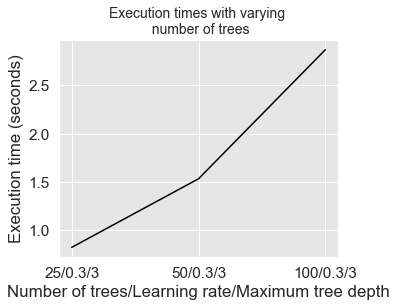

In [228]:
get_execution_times_plot(performances_df_xgboost_fixed_max_tree_depth, 
                         title="Execution times with varying \n number of trees",
                         parameter_name="Number of trees/Learning rate/Maximum tree depth")

In [229]:
print("Total execution time for the model selection procedure: "+str(round(execution_time_boosting,2))+"s")

Total execution time for the model selection procedure: 907.68s


### Comparison of model performances

In [230]:
performances_df_dictionary={
    "Decision Tree": performances_df_dt,
    "Logistic Regression": performances_df_lr,
    "Random Forest": performances_df_rf,
    "XGBoost": performances_df_xgboost
}

In [231]:
def model_selection_performances(performances_df_dictionary,
                                 performance_metric='AUC ROC',
                                 model_classes=['Decision Tree', 
                                                'Logistic Regression', 
                                                'Random Forest', 
                                                'XGBoost'],
                                 default_parameters_dictionary={
                                                "Decision Tree": 50,
                                                "Logistic Regression": 1,
                                                "Random Forest": "100/50",
                                                "XGBoost": "100/0.3/6"
                                            }):
    
    mean_performances_dictionary={
        "Default parameters": [],
        "Best validation parameters": [],
        "Optimal parameters": []
    }
    
    std_performances_dictionary={
        "Default parameters": [],
        "Best validation parameters": [],
        "Optimal parameters": []
    }
    
    # For each model class
    for model_class in model_classes:
        
        performances_df=performances_df_dictionary[model_class]
        
        # Get the performances for the default paramaters
        default_performances=performances_df[performances_df['Parameters summary']==default_parameters_dictionary[model_class]]
        default_performances=default_performances.round(decimals=3)
        
        mean_performances_dictionary["Default parameters"].append(default_performances[performance_metric+" Test"].values[0])
        std_performances_dictionary["Default parameters"].append(default_performances[performance_metric+" Test Std"].values[0])
        
        # Get the performances for the best estimated parameters
        performances_summary=get_summary_performances(performances_df, parameter_column_name="Parameters summary")
        mean_std_performances=performances_summary.loc[["Test performance"]][performance_metric].values[0]
        mean_std_performances=mean_std_performances.split("+/-")
        mean_performances_dictionary["Best validation parameters"].append(float(mean_std_performances[0]))
        std_performances_dictionary["Best validation parameters"].append(float(mean_std_performances[1]))
        
        # Get the performances for the boptimal parameters
        mean_std_performances=performances_summary.loc[["Optimal test performance"]][performance_metric].values[0]
        mean_std_performances=mean_std_performances.split("+/-")
        mean_performances_dictionary["Optimal parameters"].append(float(mean_std_performances[0]))
        std_performances_dictionary["Optimal parameters"].append(float(mean_std_performances[1]))
        
    # Return the mean performances and their standard deviations    
    return (mean_performances_dictionary,std_performances_dictionary)

In [232]:
model_selection_performances(performances_df_dictionary,
                             performance_metric='AUC ROC')

({'Default parameters': [0.793, 0.827, 0.825, 0.813],
  'Best validation parameters': [0.812, 0.827, 0.819, 0.82],
  'Optimal parameters': [0.816, 0.828, 0.826, 0.821]},
 {'Default parameters': [0.004, 0.01, 0.012, 0.021],
  'Best validation parameters': [0.01, 0.01, 0.02, 0.01],
  'Optimal parameters': [0.01, 0.01, 0.02, 0.02]})

In [233]:
# Get the performance plot for a single performance metric
def get_model_selection_performance_plot(performances_df_dictionary, 
                                         ax, 
                                         performance_metric,
                                         ylim=[0,1],
                                         model_classes=['Decision Tree', 
                                                        'Logistic Regression', 
                                                        'Random Forest', 
                                                        'XGBoost']):
    
    
    (mean_performances_dictionary,std_performances_dictionary) = \
        model_selection_performances(performances_df_dictionary=performances_df_dictionary,
                                     performance_metric=performance_metric)
    
    
    # width of the bars
    barWidth = 0.3
    # The x position of bars
    r1 = np.arange(len(model_classes))
    r2 = r1+barWidth
    r3 = r1+2*barWidth
    
    # Create Default parameters bars (Orange)
    ax.bar(r1, mean_performances_dictionary['Default parameters'], 
           width = barWidth, color = '#CA8035', edgecolor = 'black', 
           yerr=std_performances_dictionary['Default parameters'], capsize=7, label='Default parameters')
 
    # Create Best validation parameters bars (Red)
    ax.bar(r2, mean_performances_dictionary['Best validation parameters'], 
           width = barWidth, color = '#008000', edgecolor = 'black', 
           yerr=std_performances_dictionary['Best validation parameters'], capsize=7, label='Best validation parameters')

    # Create Optimal parameters bars (Green)
    ax.bar(r3, mean_performances_dictionary['Optimal parameters'], 
           width = barWidth, color = '#2F4D7E', edgecolor = 'black', 
           yerr=std_performances_dictionary['Optimal parameters'], capsize=7, label='Optimal parameters')
 

    # Set title, and x and y axes labels
    ax.set_ylim(ylim[0],ylim[1])
    ax.set_xticks(r2+barWidth/2)
    ax.set_xticklabels(model_classes, rotation = 45, ha="right", fontsize=12)
    ax.set_title(performance_metric+'\n', fontsize=18)
    ax.set_xlabel("Model class", fontsize=16)
    ax.set_ylabel(performance_metric, fontsize=15)

In [234]:
def get_model_selection_performances_plots(performances_df_dictionary, 
                                           performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'],
                                           ylim_list=[[0.6,0.9],[0.2,0.8],[0.2,0.35]],
                                           model_classes=['Decision Tree', 
                                                          'Logistic Regression', 
                                                          'Random Forest', 
                                                          'XGBoost']):
    
    # Create as many graphs as there are performance metrics to display
    n_performance_metrics = len(performance_metrics_list)
    fig, ax = plt.subplots(1, n_performance_metrics, figsize=(5*n_performance_metrics,4))
    
    parameter_types=['Default parameters','Best validation parameters','Optimal parameters']
    
    # Plot performance metric for each metric in performance_metrics_list
    for i in range(n_performance_metrics):
    
        get_model_selection_performance_plot(performances_df_dictionary, 
                                             ax[i], 
                                             performance_metrics_list[i],
                                             ylim=ylim_list[i],
                                             model_classes=model_classes
                                            )
    
    ax[n_performance_metrics-1].legend(loc='upper left', 
                                       labels=parameter_types, 
                                       bbox_to_anchor=(1.05, 1),
                                       title="Parameter type",
                                       prop={'size': 12},
                                       title_fontsize=12)

    plt.subplots_adjust(wspace=0.5, 
                        hspace=0.8)

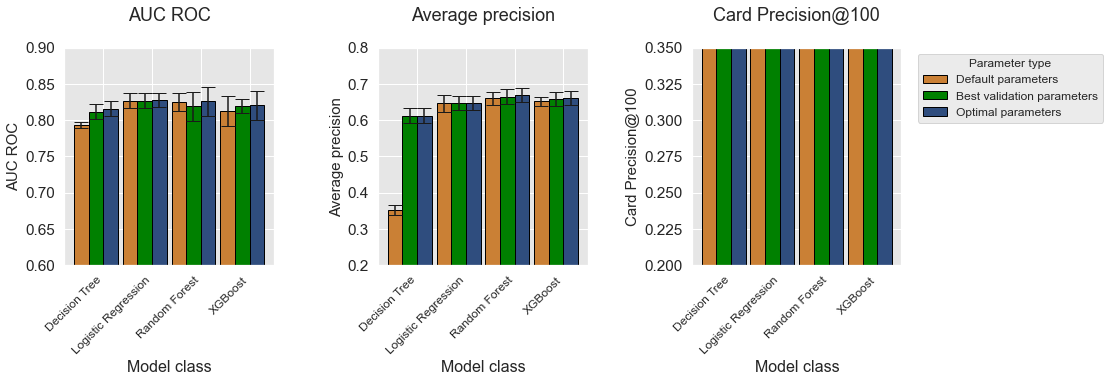

In [235]:
get_model_selection_performances_plots(performances_df_dictionary, 
                                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'])
    

In [236]:
execution_times=[execution_time_dt,execution_time_lr,
                 execution_time_rf,execution_time_boosting]

In [237]:
%%capture

fig_model_selection_execution_times_for_each_model_class, ax = plt.subplots(1, 1, figsize=(5,4))

model_classes=['Decision Tree','Logistic Regression','Random Forest','XGBoost']
    
# width of the bars
barWidth = 0.3
# The x position of bars
r1 = np.arange(len(model_classes))
    
# Create execution times bars
ax.bar(r1, execution_times[0:4], 
        width = barWidth, color = 'black', edgecolor = 'black', 
        capsize=7)

ax.set_xticks(r1+barWidth/2)
ax.set_xticklabels(model_classes, rotation = 45, ha="right", fontsize=12)
ax.set_title('Model selection execution times \n for different model classes', fontsize=18)
ax.set_xlabel("Model class", fontsize=16)
ax.set_ylabel("Execution times (s)", fontsize=15)

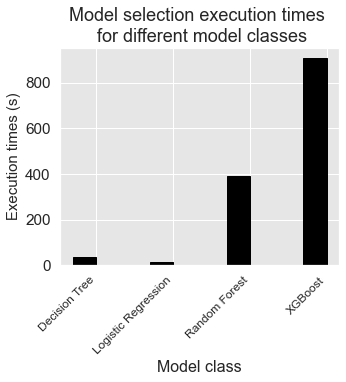

In [238]:
fig_model_selection_execution_times_for_each_model_class

### Grid Search

In [239]:
def prequential_parameters_search(transactions_df, 
                            classifier, 
                            input_features, output_feature, 
                            parameters, scoring, 
                            start_date_training, 
                            n_folds=4,
                            expe_type='Test',
                            delta_train=7, 
                            delta_delay=7, 
                            delta_assessment=7,
                            performance_metrics_list_grid=['roc_auc'],
                            performance_metrics_list=['AUC ROC'],
                            type_search='grid',
                            n_iter=10,
                            random_state=0,
                            n_jobs=-1):
    
    estimators = [('scaler', sklearn.preprocessing.StandardScaler()), ('clf', classifier)]
    pipe = sklearn.pipeline.Pipeline(estimators)
    
    prequential_split_indices=prequentialSplit(transactions_df,
                                               start_date_training=start_date_training, 
                                               n_folds=n_folds, 
                                               delta_train=delta_train, 
                                               delta_delay=delta_delay, 
                                               delta_assessment=delta_assessment)
    
    parameters_search = None
    
    if type_search=="grid":
        
        parameters_search = sklearn.model_selection.GridSearchCV(pipe, parameters, scoring=scoring, cv=prequential_split_indices, 
                                         refit=False, n_jobs=n_jobs)
    
    if type_search=="random":
        
        parameters_search = sklearn.model_selection.RandomizedSearchCV(pipe, parameters, scoring=scoring, cv=prequential_split_indices, 
                                     refit=False, n_jobs=n_jobs,n_iter=n_iter,random_state=random_state)

    
    X=transactions_df[input_features]
    y=transactions_df[output_feature]

    parameters_search.fit(X, y)
    
    performances_df=pd.DataFrame()
    
    for i in range(len(performance_metrics_list_grid)):
        performances_df[performance_metrics_list[i]+' '+expe_type]=parameters_search.cv_results_['mean_test_'+performance_metrics_list_grid[i]]
        performances_df[performance_metrics_list[i]+' '+expe_type+' Std']=parameters_search.cv_results_['std_test_'+performance_metrics_list_grid[i]]

    performances_df['Parameters']=parameters_search.cv_results_['params']
    performances_df['Execution time']=parameters_search.cv_results_['mean_fit_time']
    
    return performances_df

In [240]:
def model_selection_wrapper(transactions_df, 
                            classifier, 
                            input_features, output_feature,
                            parameters, 
                            scoring, 
                            start_date_training_for_valid,
                            start_date_training_for_test,
                            n_folds=4,
                            delta_train=7, 
                            delta_delay=7, 
                            delta_assessment=7,
                            performance_metrics_list_grid=['roc_auc'],
                            performance_metrics_list=['AUC ROC'],
                            type_search='grid',
                            n_iter=10,
                            random_state=0,
                            n_jobs=-1):

    # Get performances on the validation set using prequential validation
    performances_df_validation=prequential_parameters_search(transactions_df, classifier, 
                            input_features, output_feature,
                            parameters, scoring, 
                            start_date_training=start_date_training_for_valid,
                            n_folds=n_folds,
                            expe_type='Validation',
                            delta_train=delta_train, 
                            delta_delay=delta_delay, 
                            delta_assessment=delta_assessment,
                            performance_metrics_list_grid=performance_metrics_list_grid,
                            performance_metrics_list=performance_metrics_list,
                            type_search=type_search,
                            n_iter=n_iter,
                            random_state=random_state,
                            n_jobs=n_jobs)
    
    # Get performances on the test set using prequential validation
    performances_df_test=prequential_parameters_search(transactions_df, classifier, 
                            input_features, output_feature,
                            parameters, scoring, 
                            start_date_training=start_date_training_for_test,
                            n_folds=n_folds,
                            expe_type='Test',
                            delta_train=delta_train, 
                            delta_delay=delta_delay, 
                            delta_assessment=delta_assessment,
                            performance_metrics_list_grid=performance_metrics_list_grid,
                            performance_metrics_list=performance_metrics_list,
                            type_search=type_search,
                            n_iter=n_iter,
                            random_state=random_state,
                            n_jobs=n_jobs)
    
    # Bind the two resulting DataFrames
    performances_df_validation.drop(columns=['Parameters','Execution time'], inplace=True)
    performances_df=pd.concat([performances_df_test,performances_df_validation],axis=1)

    # And return as a single DataFrame
    return performances_df

In [241]:
classifier = xgboost.XGBClassifier()

parameters = {'clf__max_depth':[3,6,9], 'clf__n_estimators':[25,50,100],'clf__learning_rate':[0.1,0.3],
              'clf__random_state':[0],'clf__n_jobs':[1],'clf__n_verbosity':[0]}

start_time=time.time()

performances_df=model_selection_wrapper(transactions_df, classifier, 
                                        input_features, output_feature,
                                        parameters, scoring, 
                                        start_date_training_for_valid,
                                        start_date_training_for_test,
                                        n_folds=n_folds,
                                        delta_train=delta_train, 
                                        delta_delay=delta_delay, 
                                        delta_assessment=delta_assessment,
                                        performance_metrics_list_grid=performance_metrics_list_grid,
                                        performance_metrics_list=performance_metrics_list,
                                        type_search='random',
                                        n_iter=10,
                                        random_state=0,
                                        n_jobs=1)

execution_time_boosting_random = time.time()-start_time

parameters_dict=dict(performances_df['Parameters'])
performances_df['Parameters summary']=[str(parameters_dict[i]['clf__n_estimators'])+
                                   '/'+
                                   str(parameters_dict[i]['clf__learning_rate'])+
                                   '/'+
                                   str(parameters_dict[i]['clf__max_depth'])
                                   for i in range(len(parameters_dict))]

# Rename to performances_df_xgboost_random for model performance comparison
performances_df_xgboost_random=performances_df

In [242]:
performances_df_xgboost_random

AUC ROC Test  AUC ROC Test Std  Average precision Test  \
0      0.818709          0.014636                0.660546   
1      0.815588          0.018435                0.650061   
2      0.814113          0.017392                0.652027   
3      0.816242          0.017257                0.657383   
4      0.812897          0.020563                0.651698   
5      0.818828          0.014367                0.656052   
6      0.815188          0.015808                0.657975   
7      0.812867          0.014728                0.649290   
8      0.813610          0.015275                0.648448   
9      0.817542          0.016783                0.657047   

   Average precision Test Std  Card Precision@100 Test  \
0                    0.018939                 0.779643   
1                    0.010253                 0.765000   
2                    0.007037                 0.767500   
3                    0.017046                 0.769286   
4                    0.011887                 0.766429   
5                    0.009875                 0.766429   
6                    0.022830                 0.775714   
7                    0.007610                 0.765714   
8                    0.008077                 0.760714   
9                    0.023373                 0.771786   

   Card Precision@100 Test Std  \
0                     0.022821   
1                     0.017423   
2                     0.015399   
3                     0.023441   
4                     0.021771   
5                     0.016241   
6                     0.026859   
7                     0.013363   
8                     0.016083   
9                     0.022551   

                                          Parameters  Execution time  \
0  {'clf__random_state': 0, 'clf__n_verbosity': 0...        1.500215   
1  {'clf__random_state': 0, 'clf__n_verbosity': 0...        2.371582   
2  {'clf__random_state': 0, 'clf__n_verbosity': 0...        9.302500   
3  {'clf__random_state': 0, 'clf__n_verbosity': 0...        1.481154   
4  {'clf__random_state': 0, 'clf__n_verbosity': 0...        5.849296   
5  {'clf__random_state': 0, 'clf__n_verbosity': 0...        3.046412   
6  {'clf__random_state': 0, 'clf__n_verbosity': 0...        2.802206   
7  {'clf__random_state': 0, 'clf__n_verbosity': 0...        4.645194   
8  {'clf__random_state': 0, 'clf__n_verbosity': 0...        9.057688   
9  {'clf__random_state': 0, 'clf__n_verbosity': 0...        0.802681   

   AUC ROC Validation  AUC ROC Validation Std  Average precision Validation  \
0            0.813324                0.007725                      0.672144   
1            0.789381                0.013152                      0.645612   
2            0.805106                0.011295                      0.653690   
3            0.811137                0.006560                      0.670483   
4            0.799652                0.012340                      0.656078   
5            0.805306                0.007480                      0.658224   
6            0.819921                0.008405                      0.675874   
7            0.802516                0.010452                      0.653716   
8            0.805025                0.011470                      0.655934   
9            0.816668                0.008384                      0.672117   

   Average precision Validation Std  Card Precision@100 Validation  \
0                          0.021801                       0.783929   
1                          0.030662                       0.762500   
2                          0.028553                       0.763214   
3                          0.024559                       0.779643   
4                          0.026739                       0.768929   
5                          0.027713                       0.772143   
6                          0.022735                       0.782857   
7                          0.026871                       0.764286   
8                       

In [243]:
summary_performances_xgboost_random=get_summary_performances(performances_df_xgboost_random, parameter_column_name="Parameters summary")
summary_performances_xgboost_random

AUC ROC Average precision Card Precision@100
Best estimated parameters     100/0.1/3         100/0.1/3           50/0.1/3
Validation performance      0.82+/-0.01      0.676+/-0.02       0.784+/-0.01
Test performance           0.815+/-0.02      0.658+/-0.02        0.78+/-0.02
Optimal parameters             50/0.1/6          50/0.1/3           50/0.1/3
Optimal test performance   0.819+/-0.01      0.661+/-0.02        0.78+/-0.02

In [244]:
# Performances with grid search
summary_performances_xgboost

AUC ROC Average precision Card Precision@100
Best estimated parameters      25/0.1/3         100/0.1/3           50/0.1/3
Validation performance     0.824+/-0.01      0.676+/-0.02       0.784+/-0.01
Test performance            0.82+/-0.01      0.658+/-0.02        0.78+/-0.02
Optimal parameters             25/0.1/6          50/0.1/3           50/0.1/3
Optimal test performance   0.821+/-0.02      0.661+/-0.02        0.78+/-0.02

In [245]:
print("Total execution time for XGBoost with grid search: "+str(round(execution_time_boosting,2))+"s")
print("Total execution time for XGBoost with random search: "+str(round(execution_time_boosting_random,2))+"s")

Total execution time for XGBoost with grid search: 907.68s
Total execution time for XGBoost with random search: 3930.68s


In [246]:
performances_df_dictionary={
    "Decision Tree": performances_df_dt,
    "Logistic Regression": performances_df_lr,
    "Random Forest": performances_df_rf,
    "XGBoost": performances_df_xgboost,
    "XGBoost Random": performances_df_xgboost_random
}

execution_times=[execution_time_dt,
                 execution_time_lr,
                 execution_time_rf,
                 execution_time_boosting,
                 execution_time_boosting_random]

In [247]:
filehandler = open('performances_model_selection.pkl', 'wb') 
pickle.dump((performances_df_dictionary, execution_times), filehandler)
filehandler.close()

In [248]:
# Initialization: Load shared functions and simulated data 

# Load shared functions
!curl -O https://raw.githubusercontent.com/Fraud-Detection-Handbook/fraud-detection-handbook/main/Chapter_References/shared_functions.py
%run shared_functions.py
#%run ../Chapter_References/shared_functions.ipynb

# Get simulated data from Github repository
if not os.path.exists("simulated-data-transformed"):
    !git clone https://github.com/Fraud-Detection-Handbook/simulated-data-transformed
        

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63257  100 63257    0     0   162k      0 --:--:-- --:--:-- --:--:--  164k


ModuleNotFoundError: No module named 'graphviz'

<Figure size 432x288 with 0 Axes>

In [249]:
performances_df

AUC ROC Test  AUC ROC Test Std  Average precision Test  \
0      0.818709          0.014636                0.660546   
1      0.815588          0.018435                0.650061   
2      0.814113          0.017392                0.652027   
3      0.816242          0.017257                0.657383   
4      0.812897          0.020563                0.651698   
5      0.818828          0.014367                0.656052   
6      0.815188          0.015808                0.657975   
7      0.812867          0.014728                0.649290   
8      0.813610          0.015275                0.648448   
9      0.817542          0.016783                0.657047   

   Average precision Test Std  Card Precision@100 Test  \
0                    0.018939                 0.779643   
1                    0.010253                 0.765000   
2                    0.007037                 0.767500   
3                    0.017046                 0.769286   
4                    0.011887                 0.766429   
5                    0.009875                 0.766429   
6                    0.022830                 0.775714   
7                    0.007610                 0.765714   
8                    0.008077                 0.760714   
9                    0.023373                 0.771786   

   Card Precision@100 Test Std  \
0                     0.022821   
1                     0.017423   
2                     0.015399   
3                     0.023441   
4                     0.021771   
5                     0.016241   
6                     0.026859   
7                     0.013363   
8                     0.016083   
9                     0.022551   

                                          Parameters  Execution time  \
0  {'clf__random_state': 0, 'clf__n_verbosity': 0...        1.500215   
1  {'clf__random_state': 0, 'clf__n_verbosity': 0...        2.371582   
2  {'clf__random_state': 0, 'clf__n_verbosity': 0...        9.302500   
3  {'clf__random_state': 0, 'clf__n_verbosity': 0...        1.481154   
4  {'clf__random_state': 0, 'clf__n_verbosity': 0...        5.849296   
5  {'clf__random_state': 0, 'clf__n_verbosity': 0...        3.046412   
6  {'clf__random_state': 0, 'clf__n_verbosity': 0...        2.802206   
7  {'clf__random_state': 0, 'clf__n_verbosity': 0...        4.645194   
8  {'clf__random_state': 0, 'clf__n_verbosity': 0...        9.057688   
9  {'clf__random_state': 0, 'clf__n_verbosity': 0...        0.802681   

   AUC ROC Validation  AUC ROC Validation Std  Average precision Validation  \
0            0.813324                0.007725                      0.672144   
1            0.789381                0.013152                      0.645612   
2            0.805106                0.011295                      0.653690   
3            0.811137                0.006560                      0.670483   
4            0.799652                0.012340                      0.656078   
5            0.805306                0.007480                      0.658224   
6            0.819921                0.008405                      0.675874   
7            0.802516                0.010452                      0.653716   
8            0.805025                0.011470                      0.655934   
9            0.816668                0.008384                      0.672117   

   Average precision Validation Std  Card Precision@100 Validation  \
0                          0.021801                       0.783929   
1                          0.030662                       0.762500   
2                          0.028553                       0.763214   
3                          0.024559                       0.779643   
4                          0.026739                       0.768929   
5                          0.027713                       0.772143   
6                          0.022735                       0.782857   
7                          0.026871                       0.764286   
8                       

In [250]:
performances_df_dictionary.keys()

dict_keys(['Decision Tree', 'Logistic Regression', 'Random Forest', 'XGBoost', 'XGBoost Random'])

In [251]:
execution_times

[37.68437194824219,
 14.32398271560669,
 390.67076301574707,
 907.681233882904,
 3930.67520904541]

In [252]:
performances_df_dt=performances_df_dictionary['Decision Tree']
summary_performances_dt=get_summary_performances(performances_df_dt, parameter_column_name="Parameters summary")



In [253]:
summary_performances_dt

AUC ROC Average precision Card Precision@100
Best estimated parameters             3                 3                  2
Validation performance     0.824+/-0.01      0.642+/-0.02       0.769+/-0.02
Test performance           0.812+/-0.01      0.613+/-0.02       0.762+/-0.03
Optimal parameters                    2                 3                  3
Optimal test performance   0.816+/-0.01      0.613+/-0.02        0.77+/-0.02

In [254]:
performances_df_lr=performances_df_dictionary['Logistic Regression']
summary_performances_lr=get_summary_performances(performances_df_lr, parameter_column_name="Parameters summary")



In [255]:
summary_performances_lr

AUC ROC Average precision Card Precision@100
Best estimated parameters          10.0               0.1               10.0
Validation performance     0.821+/-0.01      0.656+/-0.02       0.756+/-0.02
Test performance           0.827+/-0.01      0.648+/-0.02       0.753+/-0.03
Optimal parameters                  0.1               0.1                1.0
Optimal test performance   0.828+/-0.01      0.648+/-0.02       0.754+/-0.03

In [256]:
performances_df_rf=performances_df_dictionary['Random Forest']
summary_performances_rf=get_summary_performances(performances_df_rf, parameter_column_name="Parameters summary")
summary_performances_rf

AUC ROC Average precision Card Precision@100
Best estimated parameters         100/5             100/5             100/10
Validation performance     0.833+/-0.01      0.682+/-0.02       0.782+/-0.01
Test performance           0.819+/-0.02      0.665+/-0.02       0.776+/-0.03
Optimal parameters                50/10             50/10              100/5
Optimal test performance   0.826+/-0.02       0.67+/-0.02       0.779+/-0.03

In [257]:
performances_df_xgboost=performances_df_dictionary['XGBoost']
summary_performances_xgboost=get_summary_performances(performances_df_xgboost, parameter_column_name="Parameters summary")
summary_performances_xgboost

AUC ROC Average precision Card Precision@100
Best estimated parameters      25/0.1/3         100/0.1/3           50/0.1/3
Validation performance     0.824+/-0.01      0.676+/-0.02       0.784+/-0.01
Test performance            0.82+/-0.01      0.658+/-0.02        0.78+/-0.02
Optimal parameters             25/0.1/6          50/0.1/3           50/0.1/3
Optimal test performance   0.821+/-0.02      0.661+/-0.02        0.78+/-0.02

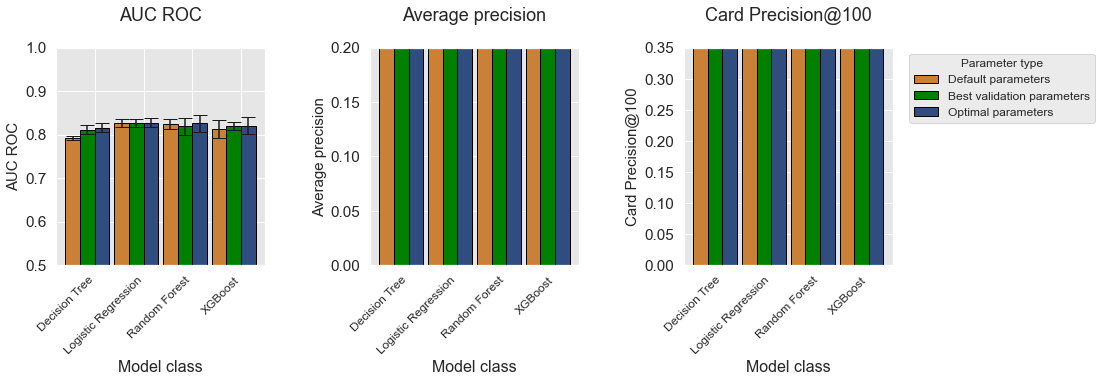

In [258]:
get_model_selection_performances_plots(performances_df_dictionary, 
                                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'],
                                       ylim_list=[[0.5,1],[0,0.2],[0,0.35]],
                                       model_classes=['Decision Tree', 
                                                      'Logistic Regression', 
                                                      'Random Forest', 
                                                      'XGBoost'])
    

In [259]:
%%capture

fig_model_selection_execution_times_for_each_model_class, ax = plt.subplots(1, 1, figsize=(5,4))

model_classes=['Decision Tree','Logistic Regression','Random Forest','XGBoost']
    
# width of the bars
barWidth = 0.3
# The x position of bars
r1 = np.arange(len(model_classes))
    
# Create execution times bars
ax.bar(r1, execution_times[0:4], 
        width = barWidth, color = 'black', edgecolor = 'black', 
        capsize=7)

ax.set_xticks(r1+barWidth/2)
ax.set_xticklabels(model_classes, rotation = 45, ha="right", fontsize=12)
ax.set_title('Model selection execution times \n for different model classes', fontsize=18)
ax.set_xlabel("Model class", fontsize=16)
ax.set_ylabel("Execution times (s)", fontsize=15)

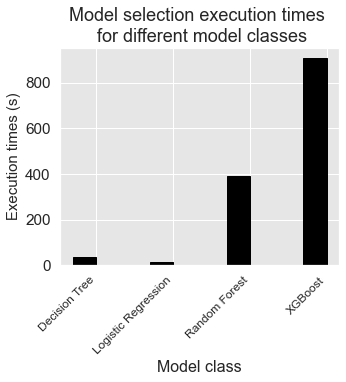

In [260]:
fig_model_selection_execution_times_for_each_model_class

### Imbalanced Learning- Cost Sensitive Learning


In [261]:
# Initialization: Load shared functions and simulated data 

# Load shared functions
!curl -O https://raw.githubusercontent.com/Fraud-Detection-Handbook/fraud-detection-handbook/main/Chapter_References/shared_functions.py
%run shared_functions.py
#%run ../Chapter_References/shared_functions.ipynb

# Get simulated data from Github repository
if not os.path.exists("simulated-data-transformed"):
    !git clone https://github.com/Fraud-Detection-Handbook/simulated-data-transformed
        

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63257  100 63257    0     0   534k      0 --:--:-- --:--:-- --:--:--  556k


ModuleNotFoundError: No module named 'graphviz'

<Figure size 432x288 with 0 Axes>

### Two class Imbalanced dataset

In [262]:
X, y = sklearn.datasets.make_classification(n_samples=5000, n_features=2, n_informative=2,
                                            n_redundant=0, n_repeated=0, n_classes=2,
                                            n_clusters_per_class=1,
                                            weights=[0.95, 0.05],
                                            class_sep=0.5, random_state=0)

dataset_df = pd.DataFrame({'X1':X[:,0],'X2':X[:,1], 'Y':y})

In [263]:
%%capture
fig_distribution, ax = plt.subplots(1, 1, figsize=(5,5))

groups = dataset_df.groupby('Y')
for name, group in groups:
    ax.scatter(group.X1, group.X2, edgecolors='k', label=name,alpha=1,marker='o')
    
ax.legend(loc='upper left', 
          bbox_to_anchor=(1.05, 1),
          title="Class")

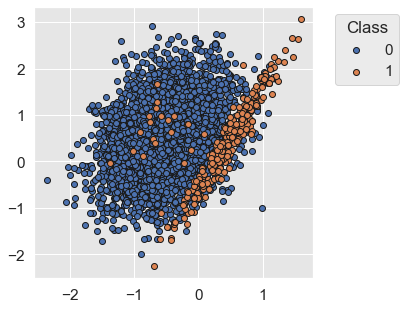

In [264]:
fig_distribution

### Decision Tree to separate classes 

In [265]:
classifier = sklearn.tree.DecisionTreeClassifier(max_depth=5,class_weight={0:1,1:1},random_state=0)
cv = sklearn.model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [266]:
cv_results_ = sklearn.model_selection.cross_validate(classifier, X, y, cv=cv,
                                                     scoring=['roc_auc',
                                                              'average_precision',
                                                              'balanced_accuracy'],
                                                     return_estimator=True)

In [267]:
results = round(pd.DataFrame(cv_results_),3)
results

fit_time  score_time                                          estimator  \
0     0.006       0.002  DecisionTreeClassifier(class_weight={0: 1, 1: ...   
1     0.004       0.001  DecisionTreeClassifier(class_weight={0: 1, 1: ...   
2     0.004       0.001  DecisionTreeClassifier(class_weight={0: 1, 1: ...   
3     0.004       0.001  DecisionTreeClassifier(class_weight={0: 1, 1: ...   
4     0.004       0.001  DecisionTreeClassifier(class_weight={0: 1, 1: ...   

   test_roc_auc  test_average_precision  test_balanced_accuracy  
0         0.933                   0.616                   0.842  
1         0.871                   0.493                   0.739  
2         0.897                   0.493                   0.799  
3         0.928                   0.591                   0.812  
4         0.901                   0.447                   0.738

In [268]:
results_mean = list(results.mean().values)
results_std = list(results.std().values)

pd.DataFrame([[str(round(results_mean[i],3))+'+/-'+str(round(results_std[i],3)) for i in range(len(results))]],
            columns=['Fit time (s)','Score time (s)','AUC ROC','Average Precision','Balanced accuracy'])

/var/folders/h1/xhxw067x1rl_7f63v1xb2cm80000gn/T/ipykernel_36212/3263762727.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  results_mean = list(results.mean().values)
/var/folders/h1/xhxw067x1rl_7f63v1xb2cm80000gn/T/ipykernel_36212/3263762727.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  results_std = list(results.std().values)


Fit time (s) Score time (s)        AUC ROC Average Precision  \
0  0.004+/-0.001    0.001+/-0.0  0.906+/-0.025     0.528+/-0.072   

  Balanced accuracy  
0     0.786+/-0.046

In [269]:
def plot_decision_boundary_classifier(ax, 
                                      classifier,
                                      train_df,
                                      input_features=['X1','X2'],
                                      output_feature='Y',
                                      title="",
                                      fs=14,
                                      plot_training_data=True):

    plot_colors = ["tab:blue","tab:orange"]

    x1_min, x1_max = train_df[input_features[0]].min() - 1, train_df[input_features[0]].max() + 1
    x2_min, x2_max = train_df[input_features[1]].min() - 1, train_df[input_features[1]].max() + 1
    
    plot_step=0.1
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, plot_step),
                         np.arange(x2_min, x2_max, plot_step))

    Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu_r,alpha=0.3)

    if plot_training_data:
        # Plot the training points
        groups = train_df.groupby(output_feature)
        for name, group in groups:
            ax.scatter(group[input_features[0]], group[input_features[1]], edgecolors='black', label=name)
        
    ax.set_title(title, fontsize=fs)
    ax.set_xlabel(input_features[0], fontsize=fs)
    ax.set_ylabel(input_features[1], fontsize=fs)
    

In [270]:
# Retrieve the decision tree from the first fold of the cross-validation
classifier_0 = cv_results_['estimator'][0]

In [271]:
# Retrieve the indices used for the training and testing of the first fold of the cross-validation
(train_index, test_index) = next(cv.split(X, y))

# Recreate the train and test DafaFrames from these indices
train_df = pd.DataFrame({'X1':X[train_index,0], 'X2':X[train_index,1], 'Y':y[train_index]})
test_df = pd.DataFrame({'X1':X[test_index,0], 'X2':X[test_index,1], 'Y':y[test_index]})
input_features = ['X1','X2']
output_feature = 'Y'

In [272]:
%%capture
fig_decision_boundary, ax = plt.subplots(1, 3, figsize=(5*3,5))

plot_decision_boundary_classifier(ax[0], classifier_0,
                                  train_df,
                                  title="Decision surface of the decision tree\n With training data",
                                  plot_training_data=True)

plot_decision_boundary_classifier(ax[1], classifier_0,
                                  train_df,
                                  title="Decision surface of the decision tree\n",
                                  plot_training_data=False)


plot_decision_boundary_classifier(ax[2], classifier_0,
                                  test_df,
                                  title="Decision surface of the decision tree\n With test data",
                                  plot_training_data=True)

ax[-1].legend(loc='upper left', 
              bbox_to_anchor=(1.05, 1),
              title="Class")

sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlBu_r, norm=plt.Normalize(vmin=0, vmax=1))
cax = fig_decision_boundary.add_axes([0.93, 0.15, 0.02, 0.5])
fig_decision_boundary.colorbar(sm, cax=cax, alpha=0.3, boundaries=np.linspace(0, 1, 11))

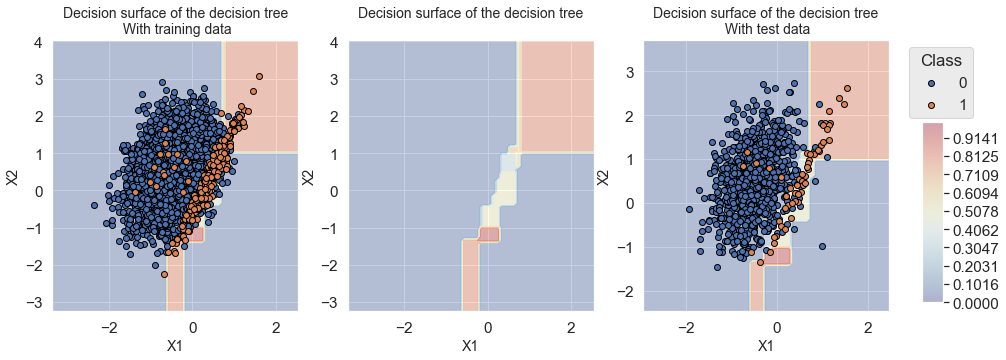

In [273]:
fig_decision_boundary

In [274]:
def kfold_cv_with_classifier(classifier,
                             X,
                             y,
                             n_splits=5,
                             strategy_name="Basline classifier"):
    
    cv = sklearn.model_selection.StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
    
    cv_results_ = sklearn.model_selection.cross_validate(classifier,X,y,cv=cv,
                                                         scoring=['roc_auc',
                                                                  'average_precision',
                                                                  'balanced_accuracy'],
                                                         return_estimator=True)
    
    results = round(pd.DataFrame(cv_results_),3)
    results_mean = list(results.mean().values)
    results_std = list(results.std().values)
    results_df = pd.DataFrame([[str(round(results_mean[i],3))+'+/-'+
                                str(round(results_std[i],3)) for i in range(len(results))]],
                              columns=['Fit time (s)','Score time (s)',
                                       'AUC ROC','Average Precision','Balanced accuracy'])
    results_df.rename(index={0:strategy_name}, inplace=True)
    
    classifier_0 = cv_results_['estimator'][0]
    
    (train_index, test_index) = next(cv.split(X, y))
    train_df = pd.DataFrame({'X1':X[train_index,0], 'X2':X[train_index,1], 'Y':y[train_index]})
    test_df = pd.DataFrame({'X1':X[test_index,0], 'X2':X[test_index,1], 'Y':y[test_index]})
    
    return (results_df, classifier_0, train_df, test_df)

In [275]:
def kfold_cv_with_classifier(classifier,
                             X,
                             y,
                             n_splits=5,
                             strategy_name="Basline classifier"):
    
    cv = sklearn.model_selection.StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
    
    cv_results_ = sklearn.model_selection.cross_validate(classifier,X,y,cv=cv,
                                                         scoring=['roc_auc',
                                                                  'average_precision',
                                                                  'balanced_accuracy'],
                                                         return_estimator=True)
    
    results = round(pd.DataFrame(cv_results_),3)
    results_mean = list(results.mean().values)
    results_std = list(results.std().values)
    results_df = pd.DataFrame([[str(round(results_mean[i],3))+'+/-'+
                                str(round(results_std[i],3)) for i in range(len(results))]],
                              columns=['Fit time (s)','Score time (s)',
                                       'AUC ROC','Average Precision','Balanced accuracy'])
    results_df.rename(index={0:strategy_name}, inplace=True)
    
    classifier_0 = cv_results_['estimator'][0]
    
    (train_index, test_index) = next(cv.split(X, y))
    train_df = pd.DataFrame({'X1':X[train_index,0], 'X2':X[train_index,1], 'Y':y[train_index]})
    test_df = pd.DataFrame({'X1':X[test_index,0], 'X2':X[test_index,1], 'Y':y[test_index]})
    
    return (results_df, classifier_0, train_df, test_df)

In [276]:
def plot_decision_boundary(classifier_0,
                           train_df, 
                           test_df):
    
    fig_decision_boundary, ax = plt.subplots(1, 3, figsize=(5*3,5))

    plot_decision_boundary_classifier(ax[0], classifier_0,
                                  train_df,
                                  title="Decision surface of the decision tree\n With training data",
                                  plot_training_data=True)

    plot_decision_boundary_classifier(ax[1], classifier_0,
                                  train_df,
                                  title="Decision surface of the decision tree\n",
                                  plot_training_data=False)


    plot_decision_boundary_classifier(ax[2], classifier_0,
                                  test_df,
                                  title="Decision surface of the decision tree\n With test data",
                                  plot_training_data=True)

    ax[-1].legend(loc='upper left', 
                  bbox_to_anchor=(1.05, 1),
                  title="Class")

    sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlBu_r, norm=plt.Normalize(vmin=0, vmax=1))
    cax = fig_decision_boundary.add_axes([0.93, 0.15, 0.02, 0.5])
    fig_decision_boundary.colorbar(sm, cax=cax, alpha=0.3, boundaries=np.linspace(0, 1, 11))
    
    return fig_decision_boundary

In [277]:
%%capture
classifier = sklearn.tree.DecisionTreeClassifier(max_depth=5,class_weight={0:1,1:1},random_state=0)


(results_df_dt_baseline, classifier_0, train_df, test_df) = kfold_cv_with_classifier(classifier, 
                                                                                     X, y, 
                                                                                     n_splits=5,
                                                                                     strategy_name="Decision tree - Baseline")

fig_decision_boundary = plot_decision_boundary(classifier_0, train_df, test_df)

In [278]:
results_df_dt_baseline

Fit time (s) Score time (s)        AUC ROC  \
Decision tree - Baseline  0.004+/-0.0    0.001+/-0.0  0.906+/-0.025   

                         Average Precision Balanced accuracy  
Decision tree - Baseline     0.528+/-0.072     0.786+/-0.046

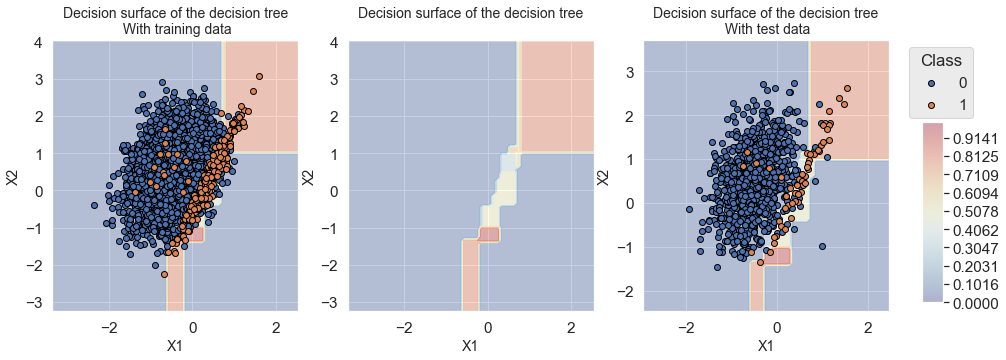

In [279]:
fig_decision_boundary

In [280]:
IR=0.05/0.95

In [281]:
class_weight={0:IR,1:1}

In [282]:
%%capture
classifier = sklearn.tree.DecisionTreeClassifier(max_depth=5,class_weight=class_weight,random_state=0)

(results_df_dt_cost_sensitive, classifier_0, train_df, test_df) = kfold_cv_with_classifier(classifier, 
                                                                         X, y, 
                                                                         n_splits=5,
                                                                         strategy_name="Decision tree - Cost-sensitive")

fig_decision_boundary = plot_decision_boundary(classifier_0, train_df, test_df)

In [283]:
pd.concat([results_df_dt_baseline, 
           results_df_dt_cost_sensitive])

Fit time (s) Score time (s)        AUC ROC  \
Decision tree - Baseline          0.004+/-0.0    0.001+/-0.0  0.906+/-0.025   
Decision tree - Cost-sensitive  0.003+/-0.001    0.001+/-0.0  0.887+/-0.034   

                               Average Precision Balanced accuracy  
Decision tree - Baseline           0.528+/-0.072     0.786+/-0.046  
Decision tree - Cost-sensitive     0.471+/-0.059     0.898+/-0.021

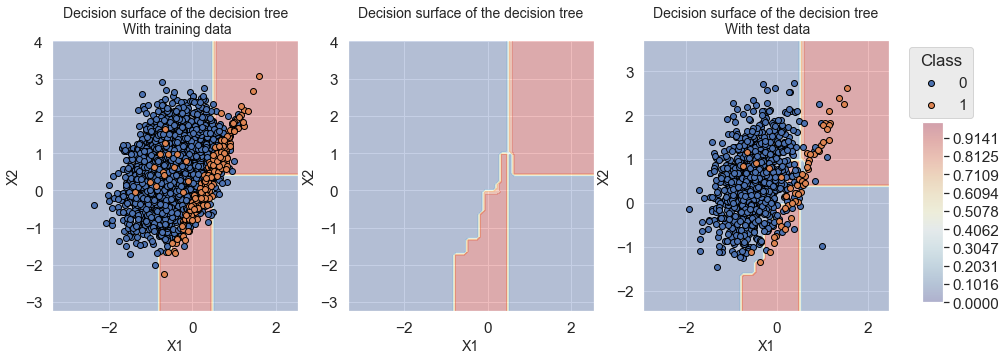

In [284]:
fig_decision_boundary

In [285]:
%%capture
classifier = sklearn.linear_model.LogisticRegression(C=1,class_weight={0:1,1:1},random_state=0)

(results_df_lr_baseline, classifier_0, train_df, test_df) = kfold_cv_with_classifier(classifier, 
                                                                          X, y, 
                                                                          n_splits=5,
                                                                          strategy_name="Logistic regression - Baseline")

fig_decision_boundary = plot_decision_boundary(classifier_0, train_df, test_df)

In [286]:
results_df_lr_baseline

Fit time (s) Score time (s)        AUC ROC  \
Logistic regression - Baseline  0.003+/-0.001    0.001+/-0.0  0.937+/-0.012   

                               Average Precision Balanced accuracy  
Logistic regression - Baseline     0.535+/-0.065     0.641+/-0.048

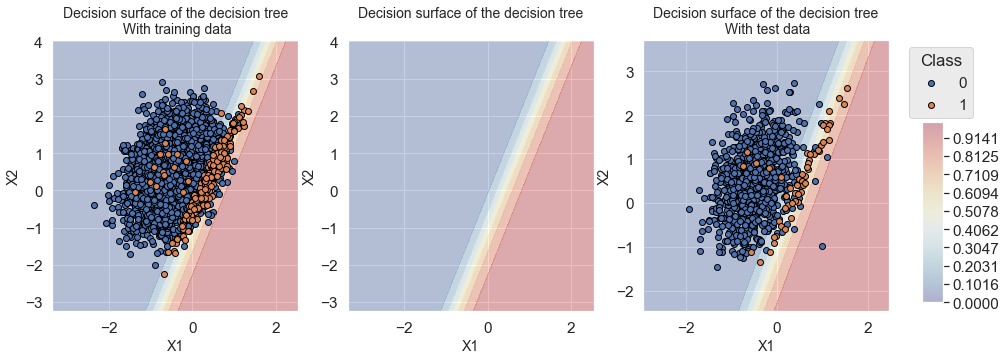

In [287]:
fig_decision_boundary

In [288]:
%%capture
classifier = sklearn.linear_model.LogisticRegression(C=1,class_weight={0:IR,1:1},random_state=0)

(results_df_lr_cost_sensitive, classifier_0, train_df, test_df) = kfold_cv_with_classifier(classifier, 
                                                                         X, y, 
                                                                         n_splits=5,
                                                                         strategy_name="Logistic regression - Cost-sensitive")

fig_decision_boundary = plot_decision_boundary(classifier_0, train_df, test_df)

In [289]:
pd.concat([results_df_lr_baseline, results_df_lr_cost_sensitive])

Fit time (s) Score time (s)  \
Logistic regression - Baseline        0.003+/-0.001    0.001+/-0.0   
Logistic regression - Cost-sensitive    0.003+/-0.0    0.001+/-0.0   

                                            AUC ROC Average Precision  \
Logistic regression - Baseline        0.937+/-0.012     0.535+/-0.065   
Logistic regression - Cost-sensitive  0.937+/-0.012     0.536+/-0.064   

                                     Balanced accuracy  
Logistic regression - Baseline           0.641+/-0.048  
Logistic regression - Cost-sensitive      0.899+/-0.01

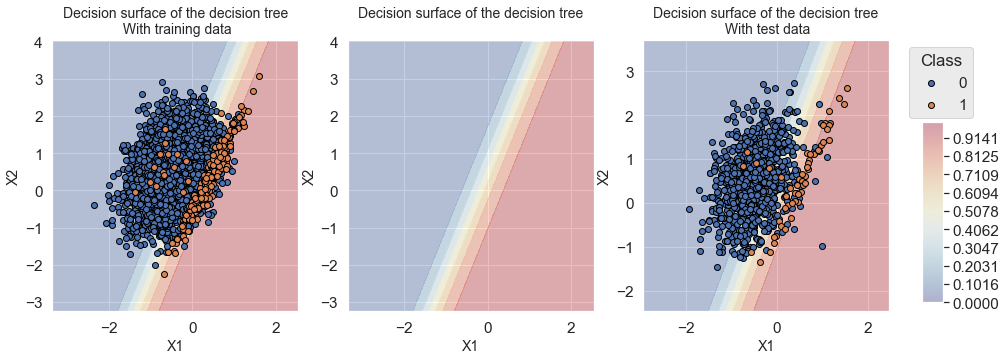

In [290]:
fig_decision_boundary

In [291]:
results_df = pd.concat([results_df_dt_baseline,
                        results_df_dt_cost_sensitive,
                        results_df_lr_baseline,
                        results_df_lr_cost_sensitive])
results_df

Fit time (s) Score time (s)  \
Decision tree - Baseline                0.004+/-0.0    0.001+/-0.0   
Decision tree - Cost-sensitive        0.003+/-0.001    0.001+/-0.0   
Logistic regression - Baseline        0.003+/-0.001    0.001+/-0.0   
Logistic regression - Cost-sensitive    0.003+/-0.0    0.001+/-0.0   

                                            AUC ROC Average Precision  \
Decision tree - Baseline              0.906+/-0.025     0.528+/-0.072   
Decision tree - Cost-sensitive        0.887+/-0.034     0.471+/-0.059   
Logistic regression - Baseline        0.937+/-0.012     0.535+/-0.065   
Logistic regression - Cost-sensitive  0.937+/-0.012     0.536+/-0.064   

                                     Balanced accuracy  
Decision tree - Baseline                 0.786+/-0.046  
Decision tree - Cost-sensitive           0.898+/-0.021  
Logistic regression - Baseline           0.641+/-0.048  
Logistic regression - Cost-sensitive      0.899+/-0.01

In [292]:
results_df = pd.concat([results_df_dt_baseline,
                        results_df_dt_cost_sensitive,
                        results_df_lr_baseline,
                        results_df_lr_cost_sensitive])
results_df

Fit time (s) Score time (s)  \
Decision tree - Baseline                0.004+/-0.0    0.001+/-0.0   
Decision tree - Cost-sensitive        0.003+/-0.001    0.001+/-0.0   
Logistic regression - Baseline        0.003+/-0.001    0.001+/-0.0   
Logistic regression - Cost-sensitive    0.003+/-0.0    0.001+/-0.0   

                                            AUC ROC Average Precision  \
Decision tree - Baseline              0.906+/-0.025     0.528+/-0.072   
Decision tree - Cost-sensitive        0.887+/-0.034     0.471+/-0.059   
Logistic regression - Baseline        0.937+/-0.012     0.535+/-0.065   
Logistic regression - Cost-sensitive  0.937+/-0.012     0.536+/-0.064   

                                     Balanced accuracy  
Decision tree - Baseline                 0.786+/-0.046  
Decision tree - Cost-sensitive           0.898+/-0.021  
Logistic regression - Baseline           0.641+/-0.048  
Logistic regression - Cost-sensitive      0.899+/-0.01

In [293]:
# Load data from the 2018-07-11 to the 2018-09-14

DIR_INPUT = 'simulated-data-transformed/data/' 

BEGIN_DATE = "2018-06-11"
END_DATE = "2018-09-14"

print("Load  files")
%time transactions_df = read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)
print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))


# Number of folds for the prequential validation
n_folds = 4

# Set the starting day for the training period, and the deltas
start_date_training = datetime.datetime.strptime("2018-07-25", "%Y-%m-%d")
delta_train = delta_delay = delta_test = delta_valid = delta_assessment = 7

start_date_training_for_valid = start_date_training+datetime.timedelta(days=-(delta_delay+delta_valid))
start_date_training_for_test = start_date_training+datetime.timedelta(days=(n_folds-1)*delta_test)

output_feature = "TX_FRAUD"

input_features = ['TX_AMOUNT','TX_WEEKEND', 'TX_NIGHT', 'CUSTOMER_ID_NB_TX1DAY_WINDOW', 
                'CUSTOMER_ID_AVG_AMOUNT1DAY_WINDOW ',
       'CUSTOMER_ID_NB_TX7DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT7DAY_WINDOW ',
       'CUSTOMER_ID_NB_TX30DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT30DAY_WINDOW ',
       'terminal_id_NB_TX_1DAY_WINDOW', 'terminal_id_RISK_1DAY_WINDOW',
       'terminal_id_NB_TX_7DAY_WINDOW', 'terminal_id_RISK_7DAY_WINDOW',
       'terminal_id_NB_TX_30DAY_WINDOW', 'terminal_id_RISK_30DAY_WINDOW']


# Only keep columns that are needed as argument to the custom scoring function
# (in order to reduce the serialization time of transaction dataset)
transactions_df_scorer = transactions_df[['customer_id', 'TX_FRAUD','TX_TIME_DAYS']]

card_precision_top_100 = sklearn.metrics.make_scorer(card_precision_top_k_custom, 
                                                     needs_proba=True, 
                                                     top_k=100, 
                                                     transactions_df=transactions_df_scorer)

performance_metrics_list_grid = ['roc_auc', 'average_precision', 'card_precision@100']
performance_metrics_list = ['AUC ROC', 'Average precision', 'Card Precision@100']

scoring = {'roc_auc':'roc_auc',
           'average_precision': 'average_precision',
           'card_precision@100': card_precision_top_100,
           }

Load  files


NameError: name 'read_from_files' is not defined

7911324 transactions loaded, containing 325833 fraudulent transactions


In [294]:
# Define classifier
classifier = sklearn.tree.DecisionTreeClassifier()

# Set of parameters for which to assess model performances
parameters = {'clf__max_depth':[5], 'clf__random_state':[0],
              'clf__class_weight':[{0: w} for w in [0.01, 0.05, 0.1, 0.5, 1]]}

start_time = time.time()

# Fit models and assess performances for all parameters
performances_df = model_selection_wrapper(transactions_df, classifier, 
                                          input_features, output_feature,
                                          parameters, scoring, 
                                          start_date_training_for_valid,
                                          start_date_training_for_test,
                                          n_folds=n_folds,
                                          delta_train=delta_train, 
                                          delta_delay=delta_delay, 
                                          delta_assessment=delta_assessment,
                                          performance_metrics_list_grid=performance_metrics_list_grid,
                                          performance_metrics_list=performance_metrics_list,
                                          n_jobs=1)

execution_time_dt = time.time()-start_time

In [295]:
# Select parameter of interest (class_weight)
parameters_dict = dict(performances_df['Parameters'])
performances_df['Parameters summary'] = [parameters_dict[i]['clf__class_weight'][0] for i in range(len(parameters_dict))]

# Rename to performances_df_dt for model performance comparison at the end of this notebook
performances_df_dt = performances_df

In [296]:
performances_df_dt

AUC ROC Test  AUC ROC Test Std  Average precision Test  \
0      0.799330          0.012037                0.590715   
1      0.800700          0.012144                0.615996   
2      0.794435          0.018397                0.607681   
3      0.794557          0.018297                0.615533   
4      0.800454          0.012200                0.608119   

   Average precision Test Std  Card Precision@100 Test  \
0                    0.018577                 0.756429   
1                    0.019653                 0.767500   
2                    0.021602                 0.760000   
3                    0.015777                 0.761786   
4                    0.016021                 0.755714   

   Card Precision@100 Test Std  \
0                     0.021417   
1                     0.020137   
2                     0.020051   
3                     0.019907   
4                     0.018736   

                                          Parameters  Execution time  \
0  {'clf__class_weight': {0: 0.01}, 'clf__max_dep...        0.290117   
1  {'clf__class_weight': {0: 0.05}, 'clf__max_dep...        0.279507   
2  {'clf__class_weight': {0: 0.1}, 'clf__max_dept...        0.280712   
3  {'clf__class_weight': {0: 0.5}, 'clf__max_dept...        0.280853   
4  {'clf__class_weight': {0: 1}, 'clf__max_depth'...        0.282068   

   AUC ROC Validation  AUC ROC Validation Std  Average precision Validation  \
0            0.795818                0.022076                      0.584304   
1            0.796411                0.009284                      0.634367   
2            0.800659                0.009096                      0.633321   
3            0.785763                0.011151                      0.620827   
4            0.806612                0.016058                      0.627199   

   Average precision Validation Std  Card Precision@100 Validation  \
0                          0.082058                       0.732500   
1                          0.014203                       0.767500   
2                          0.017085                       0.765357   
3                          0.011474                       0.765714   
4                          0.011935                       0.761429   

   Card Precision@100 Validation Std  Parameters summary  
0                           0.068014                0.01  
1                           0.014156                0.05  
2                           0.018989                0.10  
3                           0.012495                0.50  
4                           0.013209                1.00

In [297]:
summary_performances_dt = get_summary_performances(performances_df_dt, parameter_column_name="Parameters summary")
summary_performances_dt

AUC ROC Average precision Card Precision@100
Best estimated parameters           1.0              0.05               0.05
Validation performance     0.807+/-0.02      0.634+/-0.01       0.768+/-0.01
Test performance             0.8+/-0.01      0.616+/-0.02       0.768+/-0.02
Optimal parameters                 0.05              0.05               0.05
Optimal test performance   0.801+/-0.01      0.616+/-0.02       0.768+/-0.02

In [298]:
# Define classifier
classifier = sklearn.linear_model.LogisticRegression()

# Set of parameters for which to assess model performances
parameters = {'clf__C':[1], 'clf__random_state':[0],
              'clf__class_weight':[{0: w} for w in [0.01, 0.05, 0.1, 0.5, 1]]}

start_time = time.time()

# Fit models and assess performances for all parameters
performances_df = model_selection_wrapper(transactions_df, classifier, 
                                          input_features, output_feature,
                                          parameters, scoring, 
                                          start_date_training_for_valid,
                                          start_date_training_for_test,
                                          n_folds=n_folds,
                                          delta_train=delta_train, 
                                          delta_delay=delta_delay, 
                                          delta_assessment=delta_assessment,
                                          performance_metrics_list_grid=performance_metrics_list_grid,
                                          performance_metrics_list=performance_metrics_list,
                                          n_jobs=1)

execution_time_lr = time.time()-start_time

In [299]:
# Select parameter of interest (class_weight)
parameters_dict=dict(performances_df['Parameters'])
performances_df['Parameters summary']=[parameters_dict[i]['clf__class_weight'][0] for i in range(len(parameters_dict))]

# Rename to performances_df_dt for model performance comparison at the end of this notebook
performances_df_lr=performances_df

In [300]:
performances_df_lr

AUC ROC Test  AUC ROC Test Std  Average precision Test  \
0      0.823259          0.010845                0.555187   
1      0.825494          0.012049                0.573962   
2      0.827309          0.011588                0.603816   
3      0.829284          0.009738                0.644407   
4      0.827053          0.010363                0.646901   

   Average precision Test Std  Card Precision@100 Test  \
0                    0.100653                 0.683571   
1                    0.092033                 0.702857   
2                    0.057406                 0.715357   
3                    0.022372                 0.748571   
4                    0.024076                 0.753929   

   Card Precision@100 Test Std  \
0                     0.066413   
1                     0.058002   
2                     0.050602   
3                     0.033625   
4                     0.031288   

                                          Parameters  Execution time  \
0  {'clf__C': 1, 'clf__class_weight': {0: 0.01}, ...        0.315416   
1  {'clf__C': 1, 'clf__class_weight': {0: 0.05}, ...        0.293337   
2  {'clf__C': 1, 'clf__class_weight': {0: 0.1}, '...        0.290482   
3  {'clf__C': 1, 'clf__class_weight': {0: 0.5}, '...        0.325441   
4  {'clf__C': 1, 'clf__class_weight': {0: 1}, 'cl...        0.328439   

   AUC ROC Validation  AUC ROC Validation Std  Average precision Validation  \
0            0.827443                0.011258                      0.564579   
1            0.827495                0.011258                      0.580432   
2            0.827173                0.011618                      0.601743   
3            0.823889                0.013921                      0.651438   
4            0.821421                0.014484                      0.656290   

   Average precision Validation Std  Card Precision@100 Validation  \
0                          0.071029                       0.684643   
1                          0.067423                       0.691071   
2                          0.053451                       0.708214   
3                          0.022826                       0.751786   
4                          0.020801                       0.755714   

   Card Precision@100 Validation Std  Parameters summary  
0                           0.042467                0.01  
1                           0.042479                0.05  
2                           0.036539                0.10  
3                           0.021222                0.50  
4                           0.019821                1.00

In [301]:
# Select parameter of interest (class_weight)
parameters_dict=dict(performances_df['Parameters'])
performances_df['Parameters summary']=[parameters_dict[i]['clf__class_weight'][0] for i in range(len(parameters_dict))]

# Rename to performances_df_dt for model performance comparison at the end of this notebook
performances_df_lr=performances_df

In [302]:
performances_df_dictionary = {
    "Decision Tree": performances_df_dt,
    "Logistic Regression": performances_df_lr
}

execution_times = [execution_time_dt,
                   execution_time_lr
                  ]

In [303]:
filehandler = open('performances_cost_sensitive.pkl', 'wb') 
pickle.dump((performances_df_dictionary, execution_times), filehandler)
filehandler.close()

### Resampling Strategies

In [304]:
X, y = sklearn.datasets.make_classification(n_samples=5000, n_features=2, n_informative=2,
                                            n_redundant=0, n_repeated=0, n_classes=2,
                                            n_clusters_per_class=1,
                                            weights=[0.95, 0.05],
                                            class_sep=0.5, random_state=0)

dataset_df = pd.DataFrame({'X1':X[:,0],'X2':X[:,1], 'Y':y})

In [305]:
%%capture
fig_distribution, ax = plt.subplots(1, 1, figsize=(5,5))

groups = dataset_df.groupby('Y')
for name, group in groups:
    ax.scatter(group.X1, group.X2, edgecolors='k', label=name,alpha=1,marker='o')
    
ax.legend(loc='upper left', 
          bbox_to_anchor=(1.05, 1),
          title="Class")

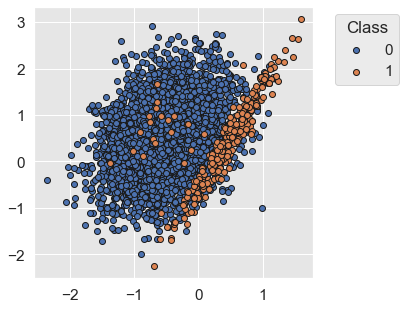

In [306]:
fig_distribution

In [307]:
%%capture
classifier = sklearn.tree.DecisionTreeClassifier(max_depth=5, random_state=0)

(results_df_dt_baseline, classifier_0, train_df, test_df) = kfold_cv_with_classifier(classifier, 
                                                                                     X, y, 
                                                                                     n_splits=5,
                                                                                     strategy_name="Decision tree - Baseline")

fig_decision_boundary = plot_decision_boundary(classifier_0, train_df, test_df)

In [308]:
results_df_dt_baseline

Fit time (s) Score time (s)        AUC ROC  \
Decision tree - Baseline  0.004+/-0.001  0.001+/-0.001  0.906+/-0.025   

                         Average Precision Balanced accuracy  
Decision tree - Baseline     0.528+/-0.072     0.786+/-0.046

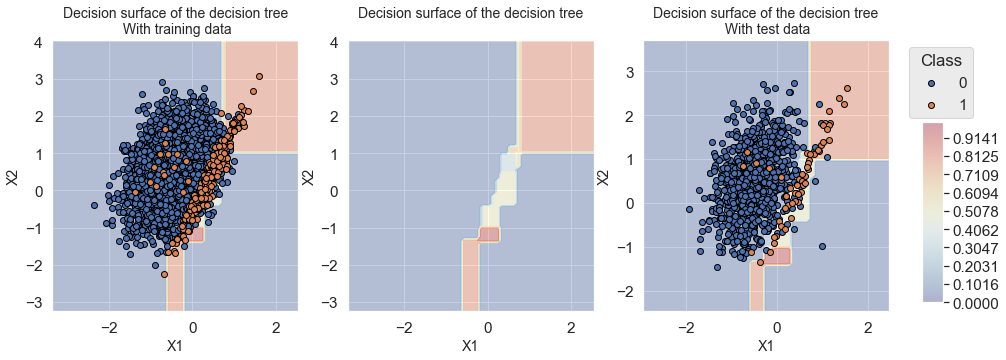

In [309]:
fig_decision_boundary

### Random Oversampling

In [310]:
!pip install imblearn

In [311]:
!pip install imbalanced-learn

In [312]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [313]:
import imblearn

In [314]:
# random_state is set to 0 for reproducibility
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy=1, random_state=0)

In [315]:
train_df['Y'].value_counts()

0    3784
1     216
Name: Y, dtype: int64

In [316]:
X_resampled, Y_resampled = ROS.fit_resample(train_df[['X1','X2']], train_df['Y'])
train_df_ROS = pd.DataFrame({'X1':X_resampled['X1'],'X2':X_resampled['X2'], 'Y':Y_resampled})

In [317]:
train_df_ROS['Y'].value_counts()

0    3784
1    3784
Name: Y, dtype: int64

In [318]:
def kfold_cv_with_sampler_and_classifier(classifier,
                                         sampler_list,
                                         X,
                                         y,
                                         n_splits=5,
                                         strategy_name="Baseline classifier"):
    
    # Create a pipeline with the list of samplers, and the estimator
    estimators = sampler_list.copy()
    estimators.extend([('clf', classifier)])
    
    pipe = imblearn.pipeline.Pipeline(estimators)
    
    cv = sklearn.model_selection.StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
    
    cv_results_ = sklearn.model_selection.cross_validate(pipe,X,y,cv=cv,
                                                         scoring=['roc_auc',
                                                                  'average_precision',
                                                                  'balanced_accuracy'],
                                                         return_estimator=True)
    
    results = round(pd.DataFrame(cv_results_),3)
    results_mean = list(results.mean().values)
    results_std = list(results.std().values)
    results_df = pd.DataFrame([[str(round(results_mean[i],3))+'+/-'+
                                str(round(results_std[i],3)) for i in range(len(results))]],
                              columns=['Fit time (s)','Score time (s)',
                                       'AUC ROC','Average Precision','Balanced accuracy'])
    results_df.rename(index={0:strategy_name}, inplace=True)
    
    classifier_0 = cv_results_['estimator'][0]
    
    (train_index, test_index) = next(cv.split(X, y))
    X_resampled, Y_resampled = X[train_index,:], y[train_index]
    for i in range(len(sampler_list)):
        X_resampled, Y_resampled = sampler_list[i][1].fit_resample(X_resampled, Y_resampled)
    
    test_df = pd.DataFrame({'X1':X[test_index,0],'X2':X[test_index,1], 'Y':y[test_index]})
    train_df = pd.DataFrame({'X1':X_resampled[:,0],'X2':X_resampled[:,1], 'Y':Y_resampled})
    
    return (results_df, classifier_0, train_df, test_df)

In [319]:
%%capture

sampler_list = [('sampler',imblearn.over_sampling.RandomOverSampler(sampling_strategy=1, random_state=0))]
classifier = sklearn.tree.DecisionTreeClassifier(max_depth=5, random_state=0)

(results_df_ROS, classifier_0, train_df, test_df) = kfold_cv_with_sampler_and_classifier(classifier, 
                                                                                         sampler_list, 
                                                                                         X, y, 
                                                                                         n_splits=5,
                                                                                         strategy_name="Decision tree - ROS")

fig_decision_boundary = plot_decision_boundary(classifier_0, train_df, test_df)

In [320]:
train_df['Y'].value_counts()

0    3784
1    3784
Name: Y, dtype: int64

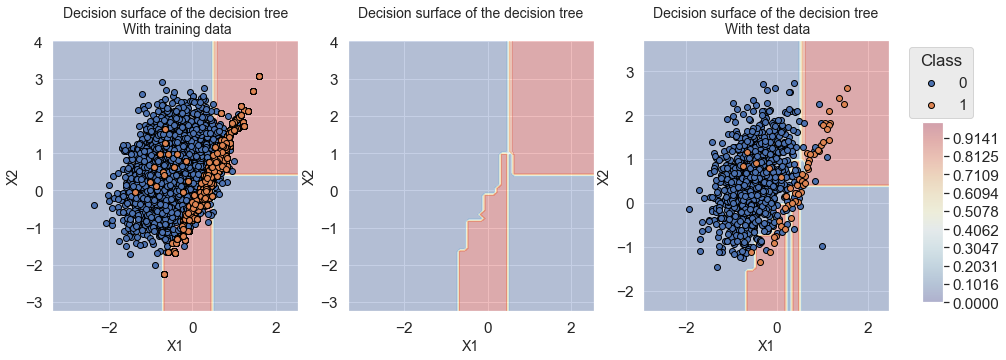

In [321]:
fig_decision_boundary

In [322]:
pd.concat([results_df_dt_baseline, 
           results_df_ROS])

Fit time (s) Score time (s)        AUC ROC  \
Decision tree - Baseline  0.004+/-0.001  0.001+/-0.001  0.906+/-0.025   
Decision tree - ROS         0.005+/-0.0    0.001+/-0.0   0.88+/-0.038   

                         Average Precision Balanced accuracy  
Decision tree - Baseline     0.528+/-0.072     0.786+/-0.046  
Decision tree - ROS          0.456+/-0.062      0.888+/-0.03

### SMOT Over sampling 

In [323]:
%%capture

sampler_list = [('sampler', imblearn.over_sampling.SMOTE(sampling_strategy=1, random_state=0))]
classifier = sklearn.tree.DecisionTreeClassifier(max_depth=5, random_state=0)

(results_df_SMOTE, classifier_0, train_df, test_df) = kfold_cv_with_sampler_and_classifier(classifier, 
                                                                                           sampler_list, 
                                                                                           X, y, 
                                                                                           n_splits=5,
                                                                                           strategy_name="Decision tree - SMOTE")


fig_decision_boundary = plot_decision_boundary(classifier_0, train_df, test_df)

In [324]:
train_df['Y'].value_counts()

0    3784
1    3784
Name: Y, dtype: int64

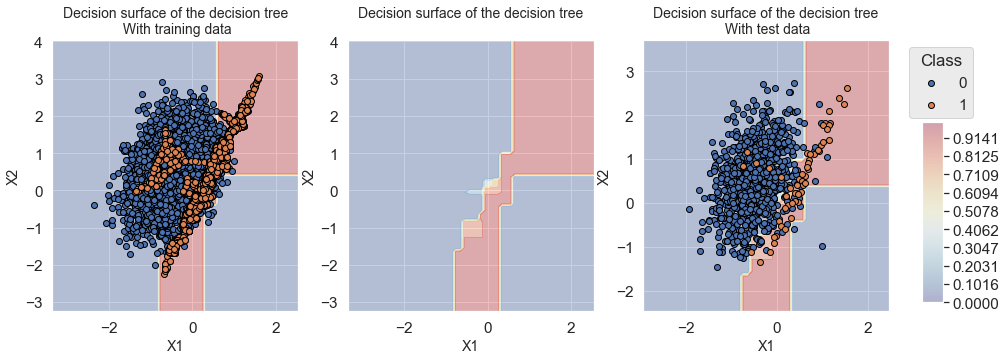

In [325]:
fig_decision_boundary

In [326]:
pd.concat([results_df_dt_baseline, 
           results_df_ROS,
           results_df_SMOTE])

Fit time (s) Score time (s)        AUC ROC  \
Decision tree - Baseline  0.004+/-0.001  0.001+/-0.001  0.906+/-0.025   
Decision tree - ROS         0.005+/-0.0    0.001+/-0.0   0.88+/-0.038   
Decision tree - SMOTE     0.007+/-0.001    0.001+/-0.0  0.913+/-0.032   

                         Average Precision Balanced accuracy  
Decision tree - Baseline     0.528+/-0.072     0.786+/-0.046  
Decision tree - ROS          0.456+/-0.062      0.888+/-0.03  
Decision tree - SMOTE        0.499+/-0.056      0.91+/-0.019

### Random Undersampling

In [327]:
%%capture

sampler_list = [('sampler', imblearn.under_sampling.RandomUnderSampler(sampling_strategy=1, random_state=0))]

classifier = sklearn.tree.DecisionTreeClassifier(max_depth=5, random_state=0)

(results_df_RUS, classifier_0, train_df, test_df) = kfold_cv_with_sampler_and_classifier(classifier, 
                                                                                         sampler_list, 
                                                                                         X, y, 
                                                                                         n_splits=5,
                                                                                         strategy_name="Decision tree - RUS")

fig_decision_boundary = plot_decision_boundary(classifier_0, train_df, test_df)

In [328]:
train_df['Y'].value_counts()

0    216
1    216
Name: Y, dtype: int64

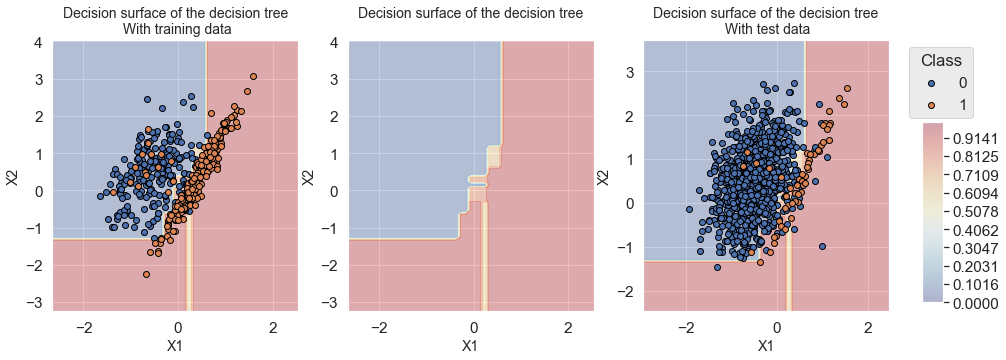

In [329]:
fig_decision_boundary

In [330]:
pd.concat([results_df_dt_baseline, 
           results_df_ROS,
           results_df_SMOTE,
           results_df_RUS])

Fit time (s) Score time (s)        AUC ROC  \
Decision tree - Baseline  0.004+/-0.001  0.001+/-0.001  0.906+/-0.025   
Decision tree - ROS         0.005+/-0.0    0.001+/-0.0   0.88+/-0.038   
Decision tree - SMOTE     0.007+/-0.001    0.001+/-0.0  0.913+/-0.032   
Decision tree - RUS         0.001+/-0.0    0.001+/-0.0   0.913+/-0.02   

                         Average Precision Balanced accuracy  
Decision tree - Baseline     0.528+/-0.072     0.786+/-0.046  
Decision tree - ROS          0.456+/-0.062      0.888+/-0.03  
Decision tree - SMOTE        0.499+/-0.056      0.91+/-0.019  
Decision tree - RUS          0.408+/-0.058     0.896+/-0.023

### Edited Nearesrt Neighbours

In [331]:
%%capture

sampler_list = [('sampler', imblearn.under_sampling.EditedNearestNeighbours(sampling_strategy='majority',n_neighbors=3))]

classifier = sklearn.tree.DecisionTreeClassifier(max_depth=5, random_state=0)

(results_df_ENN, classifier_0, train_df, test_df) = kfold_cv_with_sampler_and_classifier(classifier, 
                                                                                         sampler_list, 
                                                                                         X, y, 
                                                                                         n_splits=5,
                                                                                         strategy_name="Decision tree - ENN")

fig_decision_boundary = plot_decision_boundary(classifier_0, train_df, test_df)

In [332]:
train_df['Y'].value_counts()

0    3572
1     216
Name: Y, dtype: int64

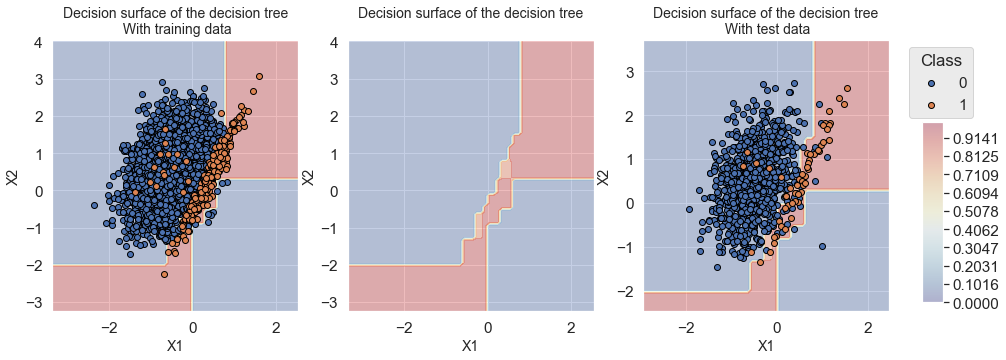

In [333]:
fig_decision_boundary

In [334]:
pd.concat([results_df_dt_baseline, 
           results_df_ROS,
           results_df_SMOTE,
           results_df_RUS,
           results_df_ENN])

Fit time (s) Score time (s)        AUC ROC  \
Decision tree - Baseline  0.004+/-0.001  0.001+/-0.001  0.906+/-0.025   
Decision tree - ROS         0.005+/-0.0    0.001+/-0.0   0.88+/-0.038   
Decision tree - SMOTE     0.007+/-0.001    0.001+/-0.0  0.913+/-0.032   
Decision tree - RUS         0.001+/-0.0    0.001+/-0.0   0.913+/-0.02   
Decision tree - ENN         0.007+/-0.0    0.001+/-0.0  0.879+/-0.038   

                         Average Precision Balanced accuracy  
Decision tree - Baseline     0.528+/-0.072     0.786+/-0.046  
Decision tree - ROS          0.456+/-0.062      0.888+/-0.03  
Decision tree - SMOTE        0.499+/-0.056      0.91+/-0.019  
Decision tree - RUS          0.408+/-0.058     0.896+/-0.023  
Decision tree - ENN           0.474+/-0.08     0.857+/-0.041

### Combination of over and Under sampling 

In [335]:
sampler_list = [('sampler1', imblearn.over_sampling.SMOTE(sampling_strategy=0.5,random_state=0)),
                ('sampler2', imblearn.under_sampling.RandomUnderSampler(sampling_strategy=1.0,random_state=0))
               ]

classifier = sklearn.tree.DecisionTreeClassifier(max_depth=5, random_state=0)

estimators = sampler_list.extend([('clf', classifier)])


In [336]:
pip install pipeline

Note: you may need to restart the kernel to use updated packages.


In [337]:
import pipeline

In [338]:
    %%capture
sampler_list = [('sampler1', imblearn.over_sampling.SMOTE(sampling_strategy=0.5,random_state=0)),
                ('sampler2', imblearn.under_sampling.RandomUnderSampler(sampling_strategy=1.0,random_state=0))
               ]

classifier = sklearn.tree.DecisionTreeClassifier(max_depth=5, random_state=0)

(results_df_combined, classifier_0, train_df, test_df) = kfold_cv_with_sampler_and_classifier(classifier, 
                                                                                              sampler_list, 
                                                                                              X, y, 
                                                                                              n_splits=5,
                                                                                              strategy_name='Decision tree - Combined SMOTE and RUS')

fig_decision_boundary = plot_decision_boundary(classifier_0, train_df, test_df)

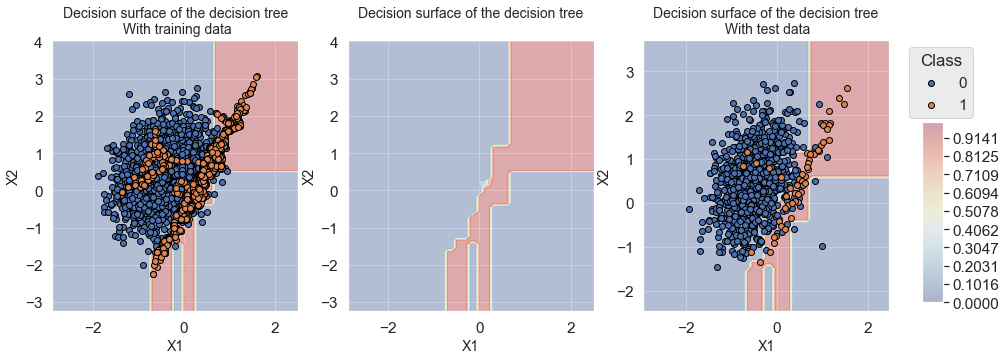

In [339]:
fig_decision_boundary

In [340]:
train_df['Y'].value_counts()

0    1892
1    1892
Name: Y, dtype: int64

In [341]:
pd.concat([results_df_dt_baseline, 
           results_df_ROS,
           results_df_SMOTE,
           results_df_RUS,
           results_df_ENN,
           results_df_combined])

Fit time (s) Score time (s)  \
Decision tree - Baseline                0.004+/-0.001  0.001+/-0.001   
Decision tree - ROS                       0.005+/-0.0    0.001+/-0.0   
Decision tree - SMOTE                   0.007+/-0.001    0.001+/-0.0   
Decision tree - RUS                       0.001+/-0.0    0.001+/-0.0   
Decision tree - ENN                       0.007+/-0.0    0.001+/-0.0   
Decision tree - Combined SMOTE and RUS  0.006+/-0.001  0.001+/-0.001   

                                              AUC ROC Average Precision  \
Decision tree - Baseline                0.906+/-0.025     0.528+/-0.072   
Decision tree - ROS                      0.88+/-0.038     0.456+/-0.062   
Decision tree - SMOTE                   0.913+/-0.032     0.499+/-0.056   
Decision tree - RUS                      0.913+/-0.02     0.408+/-0.058   
Decision tree - ENN                     0.879+/-0.038      0.474+/-0.08   
Decision tree - Combined SMOTE and RUS  0.915+/-0.012     0.494+/-0.062   

                                       Balanced accuracy  
Decision tree - Baseline                   0.786+/-0.046  
Decision tree - ROS                         0.888+/-0.03  
Decision tree - SMOTE                       0.91+/-0.019  
Decision tree - RUS                        0.896+/-0.023  
Decision tree - ENN                        0.857+/-0.041  
Decision tree - Combined SMOTE and RUS     0.912+/-0.005

In [342]:
# Define classifier
classifier = sklearn.tree.DecisionTreeClassifier()

# Set of parameters for which to assess model performances
parameters = {'clf__max_depth':[5], 'clf__random_state':[0]}

start_time = time.time()

# Fit models and assess performances for all parameters
performances_df=model_selection_wrapper(transactions_df, classifier, 
                                        input_features, output_feature,
                                        parameters, scoring, 
                                        start_date_training_for_valid,
                                        start_date_training_for_test,
                                        n_folds=n_folds,
                                        delta_train=delta_train, 
                                        delta_delay=delta_delay, 
                                        delta_assessment=delta_assessment,
                                        performance_metrics_list_grid=performance_metrics_list_grid,
                                        performance_metrics_list=performance_metrics_list,
                                        n_jobs=1)

execution_time_dt = time.time()-start_time

# Select parameter of interest (max_depth)
parameters_dict=dict(performances_df['Parameters'])
performances_df['Parameters summary']=[parameters_dict[i]['clf__max_depth'] for i in range(len(parameters_dict))]

# Rename to performances_df_dt for model performance comparison at the end of this notebook
performances_df_dt=performances_df

In [343]:
summary_performances_dt=get_summary_performances(performances_df_dt, parameter_column_name="Parameters summary")
summary_performances_dt

AUC ROC Average precision Card Precision@100
Best estimated parameters             5                 5                  5
Validation performance     0.807+/-0.02      0.627+/-0.01       0.761+/-0.01
Test performance             0.8+/-0.01      0.608+/-0.02       0.756+/-0.02
Optimal parameters                    5                 5                  5
Optimal test performance     0.8+/-0.01      0.608+/-0.02       0.756+/-0.02

In [344]:
def prequential_grid_search_with_sampler(transactions_df, 
                                         classifier, sampler_list,
                                         input_features, output_feature, 
                                         parameters, scoring, 
                                         start_date_training, 
                                         n_folds=4,
                                         expe_type='Test',
                                         delta_train=7, 
                                         delta_delay=7, 
                                         delta_assessment=7,
                                         performance_metrics_list_grid=['roc_auc'],
                                         performance_metrics_list=['AUC ROC'],
                                         n_jobs=-1):
    
    estimators = sampler_list.copy()
    estimators.extend([('clf', classifier)])
    
    pipe = imblearn.pipeline.Pipeline(estimators)
    
    prequential_split_indices = prequentialSplit(transactions_df,
                                                 start_date_training=start_date_training, 
                                                 n_folds=n_folds, 
                                                 delta_train=delta_train, 
                                                 delta_delay=delta_delay, 
                                                 delta_assessment=delta_assessment)
    
    grid_search = sklearn.model_selection.GridSearchCV(pipe, parameters, scoring=scoring, cv=prequential_split_indices, refit=False, n_jobs=n_jobs)
    
    X = transactions_df[input_features]
    y = transactions_df[output_feature]

    grid_search.fit(X, y)
    
    performances_df = pd.DataFrame()
    
    for i in range(len(performance_metrics_list_grid)):
        performances_df[performance_metrics_list[i]+' '+expe_type]=grid_search.cv_results_['mean_test_'+performance_metrics_list_grid[i]]
        performances_df[performance_metrics_list[i]+' '+expe_type+' Std']=grid_search.cv_results_['std_test_'+performance_metrics_list_grid[i]]

    performances_df['Parameters'] = grid_search.cv_results_['params']
    performances_df['Execution time'] = grid_search.cv_results_['mean_fit_time']
    
    return performances_df

In [345]:
def model_selection_wrapper_with_sampler(transactions_df, 
                                         classifier, 
                                         sampler_list,
                                         input_features, output_feature,
                                         parameters, 
                                         scoring, 
                                         start_date_training_for_valid,
                                         start_date_training_for_test,
                                         n_folds=4,
                                         delta_train=7, 
                                         delta_delay=7, 
                                         delta_assessment=7,
                                         performance_metrics_list_grid=['roc_auc'],
                                         performance_metrics_list=['AUC ROC'],
                                         n_jobs=-1):

    # Get performances on the validation set using prequential validation
    performances_df_validation = prequential_grid_search_with_sampler(transactions_df, classifier, sampler_list,
                            input_features, output_feature,
                            parameters, scoring, 
                            start_date_training=start_date_training_for_valid,
                            n_folds=n_folds,
                            expe_type='Validation',
                            delta_train=delta_train, 
                            delta_delay=delta_delay, 
                            delta_assessment=delta_assessment,
                            performance_metrics_list_grid=performance_metrics_list_grid,
                            performance_metrics_list=performance_metrics_list,
                            n_jobs=n_jobs)
    
    # Get performances on the test set using prequential validation
    performances_df_test = prequential_grid_search_with_sampler(transactions_df, classifier, sampler_list,
                            input_features, output_feature,
                            parameters, scoring, 
                            start_date_training=start_date_training_for_test,
                            n_folds=n_folds,
                            expe_type='Test',
                            delta_train=delta_train, 
                            delta_delay=delta_delay, 
                            delta_assessment=delta_assessment,
                            performance_metrics_list_grid=performance_metrics_list_grid,
                            performance_metrics_list=performance_metrics_list,
                            n_jobs=n_jobs)
    
    # Bind the two resulting DataFrames
    performances_df_validation.drop(columns=['Parameters','Execution time'], inplace=True)
    performances_df = pd.concat([performances_df_test,performances_df_validation],axis=1)

    # And return as a single DataFrame
    return performances_df

In [346]:
# Define classifier
classifier = sklearn.tree.DecisionTreeClassifier()

# Define sampling strategy
sampler_list = [('sampler', imblearn.over_sampling.SMOTE(random_state=0))]

# Set of parameters for which to assess model performances
parameters = {'clf__max_depth':[5], 'clf__random_state':[0],
              'sampler__sampling_strategy':[0.01, 0.05, 0.1, 0.5, 1], 'sampler__random_state':[0]}

start_time = time.time()

# Fit models and assess performances for all parameters
performances_df=model_selection_wrapper_with_sampler(transactions_df, classifier, sampler_list, 
                                                     input_features, output_feature,
                                                     parameters, scoring, 
                                                     start_date_training_for_valid,
                                                     start_date_training_for_test,
                                                     n_folds=n_folds,
                                                     delta_train=delta_train, 
                                                     delta_delay=delta_delay, 
                                                     delta_assessment=delta_assessment,
                                                     performance_metrics_list_grid=performance_metrics_list_grid,
                                                     performance_metrics_list=performance_metrics_list,
                                                     n_jobs=1)

execution_time_dt_SMOTE = time.time()-start_time

/usr/local/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
4 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/imblearn/pipeline.py", line 268, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/Caskroom/miniforge/base/envs/tensorflow/lib/p

In [347]:
# Select parameter of interest (sampling_strategy)
parameters_dict=dict(performances_df['Parameters'])
performances_df['Parameters summary']=[parameters_dict[i]['sampler__sampling_strategy'] for i in range(len(parameters_dict))]

# Rename to performances_df_SMOTE for model performance comparison at the end of this notebook
performances_df_SMOTE = performances_df

In [348]:
performances_df_SMOTE

AUC ROC Test  AUC ROC Test Std  Average precision Test  \
0           NaN               NaN                     NaN   
1      0.806774          0.013066                0.606804   
2      0.809544          0.015819                0.620633   
3      0.816120          0.007947                0.602451   
4      0.815013          0.011602                0.600270   

   Average precision Test Std  Card Precision@100 Test  \
0                         NaN                      NaN   
1                    0.013990                 0.752857   
2                    0.018021                 0.761786   
3                    0.026816                 0.751786   
4                    0.041579                 0.746786   

   Card Precision@100 Test Std  \
0                          NaN   
1                     0.026322   
2                     0.022686   
3                     0.027928   
4                     0.029353   

                                          Parameters  Execution time  \
0  {'clf__max_depth': 5, 'clf__random_state': 0, ...        0.090707   
1  {'clf__max_depth': 5, 'clf__random_state': 0, ...        0.310705   
2  {'clf__max_depth': 5, 'clf__random_state': 0, ...        0.356570   
3  {'clf__max_depth': 5, 'clf__random_state': 0, ...        0.485151   
4  {'clf__max_depth': 5, 'clf__random_state': 0, ...        0.678971   

   AUC ROC Validation  AUC ROC Validation Std  Average precision Validation  \
0                 NaN                     NaN                           NaN   
1            0.815421                0.008987                      0.633518   
2            0.808702                0.019658                      0.632538   
3            0.814802                0.018801                      0.622603   
4            0.820431                0.018112                      0.618269   

   Average precision Validation Std  Card Precision@100 Validation  \
0                               NaN                            NaN   
1                          0.008196                       0.765357   
2                          0.025888                       0.770000   
3                          0.024418                       0.757857   
4                          0.024474                       0.761786   

   Card Precision@100 Validation Std  Parameters summary  
0                                NaN                0.01  
1                           0.012053                0.05  
2                           0.022246                0.10  
3                           0.012956                0.50  
4                           0.015920                1.00

In [349]:
summary_performances_SMOTE = get_summary_performances(performances_df_SMOTE, parameter_column_name="Parameters summary")
summary_performances_SMOTE

AUC ROC Average precision Card Precision@100
Best estimated parameters       0.01              0.01               0.01
Validation performance     nan+/-nan         nan+/-nan          nan+/-nan
Test performance           nan+/-nan         nan+/-nan          nan+/-nan
Optimal parameters              0.01              0.01               0.01
Optimal test performance   nan+/-nan         nan+/-nan          nan+/-nan

In [350]:
# Define classifier
classifier = sklearn.tree.DecisionTreeClassifier()

# Define sampling strategy
sampler_list = [('sampler', imblearn.under_sampling.RandomUnderSampler())]

# Set of parameters for which to assess model performances
parameters = {'clf__max_depth':[5], 'clf__random_state':[0],
              'sampler__sampling_strategy':[0.01, 0.05, 0.1, 0.5, 1], 'sampler__random_state':[0]}

start_time = time.time()

# Fit models and assess performances for all parameters
performances_df=model_selection_wrapper_with_sampler(transactions_df, classifier, sampler_list, 
                                                     input_features, output_feature,
                                                     parameters, scoring, 
                                                     start_date_training_for_valid,
                                                     start_date_training_for_test,
                                                     n_folds=n_folds,
                                                     delta_train=delta_train, 
                                                     delta_delay=delta_delay, 
                                                     delta_assessment=delta_assessment,
                                                     performance_metrics_list_grid=performance_metrics_list_grid,
                                                     performance_metrics_list=performance_metrics_list,
                                                     n_jobs=1)

execution_time_dt_RUS = time.time()-start_time

# Select parameter of interest (sampling_strategy)
parameters_dict=dict(performances_df['Parameters'])
performances_df['Parameters summary']=[parameters_dict[i]['sampler__sampling_strategy'] for i in range(len(parameters_dict))]

# Rename to performances_df_RUS for model performance comparison at the end of this notebook
performances_df_RUS = performances_df

/usr/local/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
4 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/imblearn/pipeline.py", line 268, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/Caskroom/miniforge/base/envs/tensorflow/lib/p

In [351]:
summary_performances_RUS=get_summary_performances(performances_df_RUS, parameter_column_name="Parameters summary")
summary_performances_RUS

AUC ROC Average precision Card Precision@100
Best estimated parameters       0.01              0.01               0.01
Validation performance     nan+/-nan         nan+/-nan          nan+/-nan
Test performance           nan+/-nan         nan+/-nan          nan+/-nan
Optimal parameters              0.01              0.01               0.01
Optimal test performance   nan+/-nan         nan+/-nan          nan+/-nan

In [352]:
# Define classifier
classifier = sklearn.tree.DecisionTreeClassifier()

# Define sampling strategy
sampler_list = [('sampler1', imblearn.over_sampling.SMOTE()),
                ('sampler2', imblearn.under_sampling.RandomUnderSampler())
               ]

# Set of parameters for which to assess model performances
parameters = {'clf__max_depth':[5], 'clf__random_state':[0],
              'sampler1__sampling_strategy':[0.1], 
              'sampler2__sampling_strategy':[0.1, 0.5, 1], 
              'sampler1__random_state':[0], 'sampler2__random_state':[0]}

start_time = time.time()

# Fit models and assess performances for all parameters
performances_df = model_selection_wrapper_with_sampler(transactions_df, classifier, sampler_list, 
                                                     input_features, output_feature,
                                                     parameters, scoring, 
                                                     start_date_training_for_valid,
                                                     start_date_training_for_test,
                                                     n_folds=n_folds,
                                                     delta_train=delta_train, 
                                                     delta_delay=delta_delay, 
                                                     delta_assessment=delta_assessment,
                                                     performance_metrics_list_grid=performance_metrics_list_grid,
                                                     performance_metrics_list=performance_metrics_list,
                                                     n_jobs=1)

execution_time_dt_combined = time.time()-start_time

# Select parameter of interest (max_depth)
parameters_dict = dict(performances_df['Parameters'])
performances_df['Parameters summary']=[parameters_dict[i]['sampler2__sampling_strategy'] for i in range(len(parameters_dict))]

# Rename to performances_df_combined for model performance comparison at the end of this notebook
performances_df_combined = performances_df

In [353]:
performances_df_combined

AUC ROC Test  AUC ROC Test Std  Average precision Test  \
0      0.809544          0.015819                0.620633   
1      0.804149          0.022608                0.581231   
2      0.814746          0.006868                0.536058   

   Average precision Test Std  Card Precision@100 Test  \
0                    0.018021                 0.761786   
1                    0.028567                 0.747143   
2                    0.029274                 0.718929   

   Card Precision@100 Test Std  \
0                     0.022686   
1                     0.019717   
2                     0.031516   

                                          Parameters  Execution time  \
0  {'clf__max_depth': 5, 'clf__random_state': 0, ...        0.344562   
1  {'clf__max_depth': 5, 'clf__random_state': 0, ...        0.209724   
2  {'clf__max_depth': 5, 'clf__random_state': 0, ...        0.170839   

   AUC ROC Validation  AUC ROC Validation Std  Average precision Validation  \
0            0.808702                0.019658                      0.632538   
1            0.804433                0.016408                      0.592211   
2            0.816758                0.014927                      0.590010   

   Average precision Validation Std  Card Precision@100 Validation  \
0                          0.025888                       0.770000   
1                          0.019851                       0.758571   
2                          0.018387                       0.742857   

   Card Precision@100 Validation Std  Parameters summary  
0                           0.022246                 0.1  
1                           0.016036                 0.5  
2                           0.018267                 1.0

In [354]:
summary_performances_combined = get_summary_performances(performances_df=performances_df_combined, 
                                                         parameter_column_name="Parameters summary")
summary_performances_combined

AUC ROC Average precision Card Precision@100
Best estimated parameters           1.0               0.1                0.1
Validation performance     0.817+/-0.01      0.633+/-0.03        0.77+/-0.02
Test performance           0.815+/-0.01      0.621+/-0.02       0.762+/-0.02
Optimal parameters                  1.0               0.1                0.1
Optimal test performance   0.815+/-0.01      0.621+/-0.02       0.762+/-0.02

### Ensemble Methods-Imblanaced learning

In [355]:
X, y = sklearn.datasets.make_classification(n_samples=5000, n_features=2, n_informative=2,
                                            n_redundant=0, n_repeated=0, n_classes=2,
                                            n_clusters_per_class=1,
                                            weights=[0.95, 0.05],
                                            class_sep=0.5, random_state=0)

dataset_df = pd.DataFrame({'X1':X[:,0],'X2':X[:,1], 'Y':y})

In [356]:
%%capture
fig_distribution, ax = plt.subplots(1, 1, figsize=(5,5))

groups = dataset_df.groupby('Y')
for name, group in groups:
    ax.scatter(group.X1, group.X2, edgecolors='k', label=name,alpha=1,marker='o')
    
ax.legend(loc='upper left', 
          bbox_to_anchor=(1.05, 1),
          title="Class")

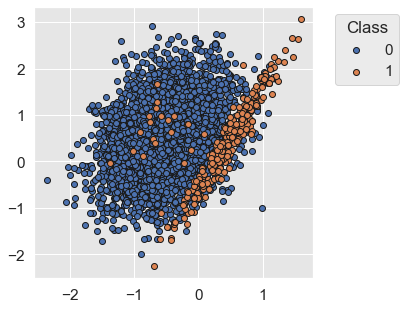

In [357]:
fig_distribution

In [358]:
%%capture
classifier = sklearn.ensemble.BaggingClassifier(base_estimator=sklearn.tree.DecisionTreeClassifier(max_depth=5,random_state=0),
                                                n_estimators=100,
                                                bootstrap=True,
                                                random_state=0)


(results_df_bagging, classifier_0, train_df, test_df) = kfold_cv_with_classifier(classifier, 
                                                                                 X, y, 
                                                                                 n_splits=5,
                                                                                 strategy_name="Bagging")

fig_decision_boundary = plot_decision_boundary(classifier_0, train_df, test_df)

In [359]:
results_df_bagging

Fit time (s) Score time (s)       AUC ROC Average Precision  \
Bagging  0.225+/-0.005    0.011+/-0.0  0.943+/-0.01      0.597+/-0.07   

        Balanced accuracy  
Bagging     0.748+/-0.041

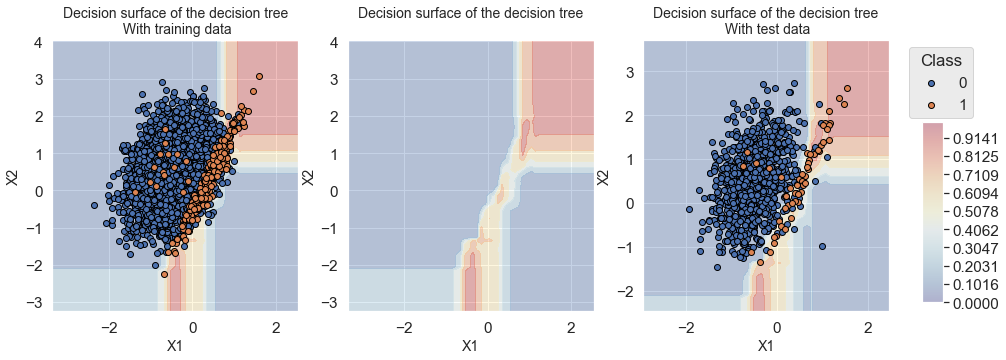

In [360]:
fig_decision_boundary

In [361]:
%%capture
classifier = imblearn.ensemble.BalancedBaggingClassifier(base_estimator=sklearn.tree.DecisionTreeClassifier(max_depth=5,random_state=0),
                                                         n_estimators=100,
                                                         sampling_strategy=1,
                                                         bootstrap=True,
                                                         sampler=imblearn.under_sampling.RandomUnderSampler(),
                                                         random_state=0)


(results_df_balanced_bagging, classifier_0, train_df, test_df) = kfold_cv_with_classifier(classifier, 
                                                                                          X, y, 
                                                                                          n_splits=5,
                                                                                          strategy_name="Balanced bagging")

fig_decision_boundary = plot_decision_boundary(classifier_0, train_df, test_df)

In [362]:
pd.concat([results_df_bagging, 
           results_df_balanced_bagging])

Fit time (s) Score time (s)       AUC ROC  \
Bagging           0.225+/-0.005    0.011+/-0.0  0.943+/-0.01   
Balanced bagging  0.135+/-0.001    0.013+/-0.0  0.947+/-0.01   

                 Average Precision Balanced accuracy  
Bagging               0.597+/-0.07     0.748+/-0.041  
Balanced bagging     0.586+/-0.058      0.92+/-0.013

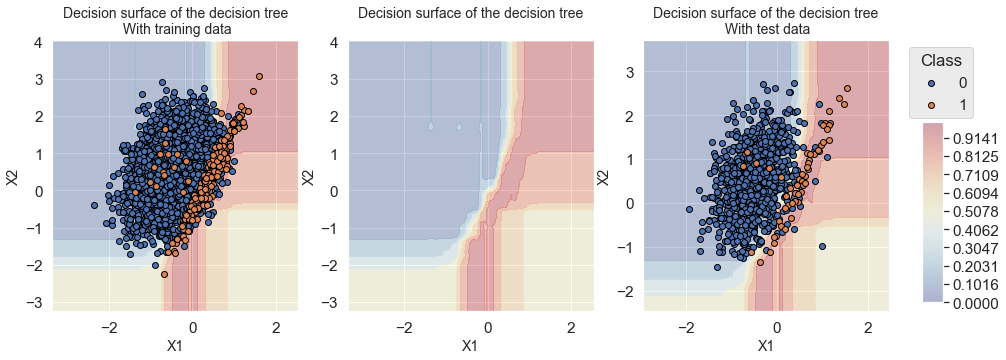

In [363]:
fig_decision_boundary

In [364]:
%%capture
classifier = sklearn.ensemble.RandomForestClassifier(n_estimators=100, 
                                                     max_depth=5,
                                                     random_state=0)

(results_df_rf, classifier_0, train_df, test_df) = kfold_cv_with_classifier(classifier, 
                                                                            X, y, 
                                                                            n_splits=5,
                                                                            strategy_name="Random forest")

fig_decision_boundary = plot_decision_boundary(classifier_0, train_df, test_df)

In [365]:
pd.concat([results_df_bagging, 
           results_df_balanced_bagging,
           results_df_rf])

Fit time (s) Score time (s)        AUC ROC  \
Bagging           0.225+/-0.005    0.011+/-0.0   0.943+/-0.01   
Balanced bagging  0.135+/-0.001    0.013+/-0.0   0.947+/-0.01   
Random forest      0.14+/-0.002  0.012+/-0.001  0.933+/-0.016   

                 Average Precision Balanced accuracy  
Bagging               0.597+/-0.07     0.748+/-0.041  
Balanced bagging     0.586+/-0.058      0.92+/-0.013  
Random forest        0.593+/-0.087     0.672+/-0.022

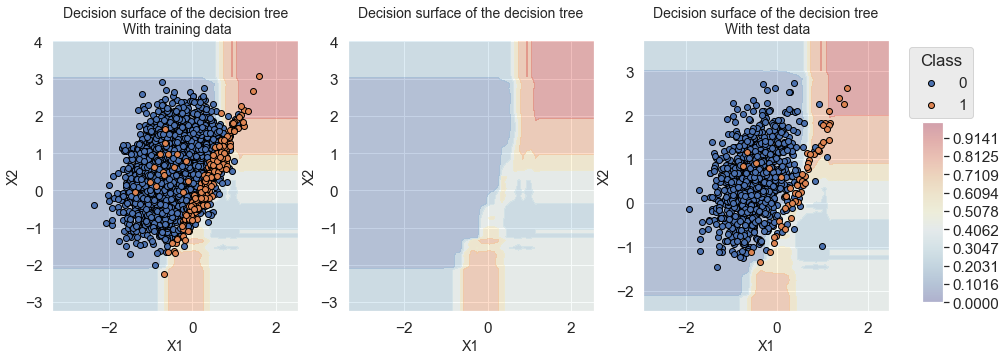

In [366]:
fig_decision_boundary

In [367]:
%%capture
classifier = imblearn.ensemble.BalancedRandomForestClassifier(n_estimators=100, 
                                                              sampling_strategy=1,
                                                              max_depth=5,
                                                              random_state=0)

(results_df_rf_balanced, classifier_0, train_df, test_df) = kfold_cv_with_classifier(classifier, 
                                                                                     X, y, 
                                                                                     n_splits=5,
                                                                                     strategy_name="Balanced random forest")


fig_decision_boundary = plot_decision_boundary(classifier_0, train_df, test_df)

In [368]:
pd.concat([results_df_bagging, 
           results_df_balanced_bagging,
           results_df_rf,
           results_df_rf_balanced])

Fit time (s) Score time (s)        AUC ROC  \
Bagging                 0.225+/-0.005    0.011+/-0.0   0.943+/-0.01   
Balanced bagging        0.135+/-0.001    0.013+/-0.0   0.947+/-0.01   
Random forest            0.14+/-0.002  0.012+/-0.001  0.933+/-0.016   
Balanced random forest  0.149+/-0.065    0.013+/-0.0   0.946+/-0.01   

                       Average Precision Balanced accuracy  
Bagging                     0.597+/-0.07     0.748+/-0.041  
Balanced bagging           0.586+/-0.058      0.92+/-0.013  
Random forest              0.593+/-0.087     0.672+/-0.022  
Balanced random forest      0.58+/-0.083     0.916+/-0.014

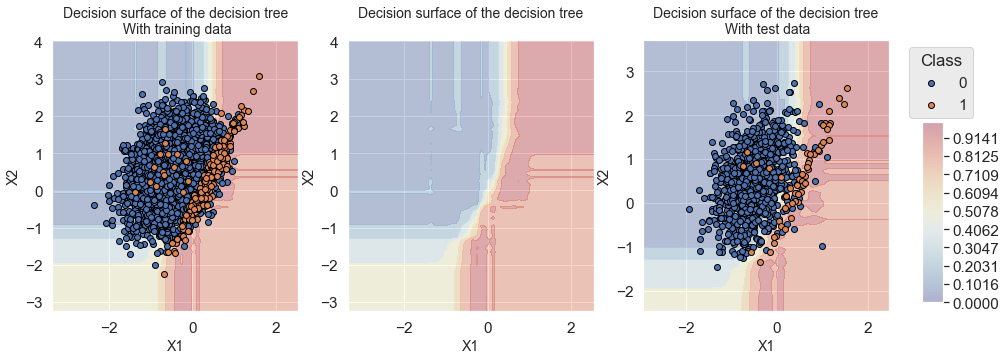

In [369]:
fig_decision_boundary

In [370]:
%%capture
classifier = xgboost.XGBClassifier(n_estimators=100,
                                   max_depth=6,
                                   learning_rate=0.3,
                                   random_state=0)

(results_df_xgboost, classifier_0, train_df, test_df) = kfold_cv_with_classifier(classifier, 
                                                                                 X, y, 
                                                                                 n_splits=5,
                                                                                 strategy_name="XGBoost")

fig_decision_boundary = plot_decision_boundary(classifier_0, train_df, test_df)

In [371]:
pd.concat([results_df_bagging, 
           results_df_balanced_bagging,
           results_df_rf,
           results_df_rf_balanced,
           results_df_xgboost])

Fit time (s) Score time (s)        AUC ROC  \
Bagging                 0.225+/-0.005    0.011+/-0.0   0.943+/-0.01   
Balanced bagging        0.135+/-0.001    0.013+/-0.0   0.947+/-0.01   
Random forest            0.14+/-0.002  0.012+/-0.001  0.933+/-0.016   
Balanced random forest  0.149+/-0.065    0.013+/-0.0   0.946+/-0.01   
XGBoost                 0.141+/-0.044  0.004+/-0.001   0.95+/-0.008   

                       Average Precision Balanced accuracy  
Bagging                     0.597+/-0.07     0.748+/-0.041  
Balanced bagging           0.586+/-0.058      0.92+/-0.013  
Random forest              0.593+/-0.087     0.672+/-0.022  
Balanced random forest      0.58+/-0.083     0.916+/-0.014  
XGBoost                     0.59+/-0.066      0.772+/-0.04

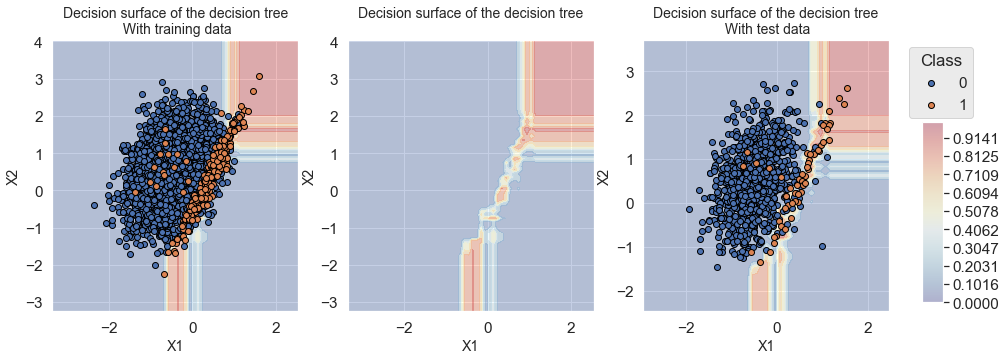

In [372]:
fig_decision_boundary

In [373]:
IR=0.05/0.95 
IR

0.052631578947368425

In [374]:
 %%capture
classifier = xgboost.XGBClassifier(n_estimators=100,
                                   max_depth=6,
                                   learning_rate=0.3,
                                   scale_pos_weight=1/IR,
                                   random_state=0)

(results_df_weighted_xgboost, classifier_0, train_df, test_df) = kfold_cv_with_classifier(classifier, 
                                                                                          X, y, 
                                                                                          n_splits=5,
                                                                                          strategy_name="Weighted XGBoost")

fig_decision_boundary = plot_decision_boundary(classifier_0, train_df, test_df)

In [375]:
pd.concat([results_df_bagging, 
           results_df_balanced_bagging,
           results_df_rf,
           results_df_rf_balanced,
           results_df_xgboost,
         results_df_weighted_xgboost])

Fit time (s) Score time (s)        AUC ROC  \
Bagging                 0.225+/-0.005    0.011+/-0.0   0.943+/-0.01   
Balanced bagging        0.135+/-0.001    0.013+/-0.0   0.947+/-0.01   
Random forest            0.14+/-0.002  0.012+/-0.001  0.933+/-0.016   
Balanced random forest  0.149+/-0.065    0.013+/-0.0   0.946+/-0.01   
XGBoost                 0.141+/-0.044  0.004+/-0.001   0.95+/-0.008   
Weighted XGBoost        0.147+/-0.046  0.005+/-0.002  0.946+/-0.012   

                       Average Precision Balanced accuracy  
Bagging                     0.597+/-0.07     0.748+/-0.041  
Balanced bagging           0.586+/-0.058      0.92+/-0.013  
Random forest              0.593+/-0.087     0.672+/-0.022  
Balanced random forest      0.58+/-0.083     0.916+/-0.014  
XGBoost                     0.59+/-0.066      0.772+/-0.04  
Weighted XGBoost           0.598+/-0.061     0.855+/-0.021

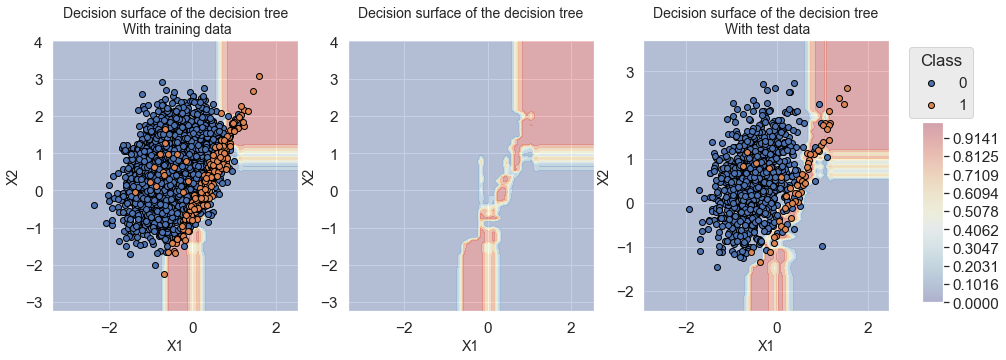

In [376]:
fig_decision_boundary

In [377]:
#### Bagging
# Define classifier
classifier = sklearn.ensemble.BaggingClassifier()

# Set of parameters for which to assess model performances
parameters = {'clf__base_estimator':[sklearn.tree.DecisionTreeClassifier(max_depth=20,random_state=0)], 
              'clf__bootstrap':[True],
              'clf__n_estimators':[100],
              'clf__random_state':[0],
              'clf__n_jobs':[-1]}

start_time = time.time()

# Fit models and assess performances for all parameters
performances_df=model_selection_wrapper(transactions_df, classifier, 
                                        input_features, output_feature,
                                        parameters, scoring, 
                                        start_date_training_for_valid,
                                        start_date_training_for_test,
                                        n_folds=n_folds,
                                        delta_train=delta_train, 
                                        delta_delay=delta_delay, 
                                        delta_assessment=delta_assessment,
                                        performance_metrics_list_grid=performance_metrics_list_grid,
                                        performance_metrics_list=performance_metrics_list,
                                        n_jobs=-1)

execution_time_baseline_bagging = time.time()-start_time

# Select parameter of interest (n_estimators)
parameters_dict=dict(performances_df['Parameters'])
performances_df['Parameters summary']=[parameters_dict[i]['clf__n_estimators'] for i in range(len(parameters_dict))]

# Rename to performances_df_baseline_bagging for model performance comparison later in this section
performances_df_baseline_bagging=performances_df

In [378]:
summary_performances_baseline_bagging=get_summary_performances(performances_df_baseline_bagging, parameter_column_name="Parameters summary")
summary_performances_baseline_bagging

AUC ROC Average precision Card Precision@100
Best estimated parameters           100               100                100
Validation performance     0.801+/-0.02      0.651+/-0.03       0.761+/-0.02
Test performance           0.816+/-0.02      0.636+/-0.02       0.763+/-0.02
Optimal parameters                  100               100                100
Optimal test performance   0.816+/-0.02      0.636+/-0.02       0.763+/-0.02

In [379]:
#### Random forest
# Define classifier
classifier = sklearn.ensemble.RandomForestClassifier()

parameters = {'clf__max_depth':[20], 
              'clf__n_estimators':[100],
              'clf__random_state':[0],
              'clf__n_jobs':[-1]}

start_time = time.time()

# Fit models and assess performances for all parameters
performances_df=model_selection_wrapper(transactions_df, classifier, 
                                        input_features, output_feature,
                                        parameters, scoring, 
                                        start_date_training_for_valid,
                                        start_date_training_for_test,
                                        n_folds=n_folds,
                                        delta_train=delta_train, 
                                        delta_delay=delta_delay, 
                                        delta_assessment=delta_assessment,
                                        performance_metrics_list_grid=performance_metrics_list_grid,
                                        performance_metrics_list=performance_metrics_list,
                                        n_jobs=-1)

execution_time_baseline_rf = time.time()-start_time

# Select parameter of interest (n_estimators)
parameters_dict=dict(performances_df['Parameters'])
performances_df['Parameters summary']=[parameters_dict[i]['clf__n_estimators'] for i in range(len(parameters_dict))]

# Rename to performances_df_baseline_rf for model performance comparison later in this section
performances_df_baseline_rf=performances_df

In [380]:
summary_performances_baseline_rf=get_summary_performances(performances_df_baseline_rf, parameter_column_name="Parameters summary")
summary_performances_baseline_rf

AUC ROC Average precision Card Precision@100
Best estimated parameters           100               100                100
Validation performance      0.822+/-0.0      0.677+/-0.02        0.78+/-0.01
Test performance           0.825+/-0.01      0.668+/-0.02       0.774+/-0.03
Optimal parameters                  100               100                100
Optimal test performance   0.825+/-0.01      0.668+/-0.02       0.774+/-0.03

In [381]:
#### XGBoost
# Define classifier
classifier = xgboost.XGBClassifier()

parameters = {'clf__max_depth':[3], 
              'clf__n_estimators':[50],
              'clf__learning_rate':[0.3],
              'clf__random_state':[0],
              'clf__n_jobs':[-1]}

start_time = time.time()

# Fit models and assess performances for all parameters
performances_df=model_selection_wrapper(transactions_df, classifier, 
                                        input_features, output_feature,
                                        parameters, scoring, 
                                        start_date_training_for_valid,
                                        start_date_training_for_test,
                                        n_folds=n_folds,
                                        delta_train=delta_train, 
                                        delta_delay=delta_delay, 
                                        delta_assessment=delta_assessment,
                                        performance_metrics_list_grid=performance_metrics_list_grid,
                                        performance_metrics_list=performance_metrics_list,
                                        n_jobs=-1)

execution_time_baseline_xgboost = time.time()-start_time

# Select parameter of interest (n_estimators)
parameters_dict=dict(performances_df['Parameters'])
performances_df['Parameters summary']=[parameters_dict[i]['clf__n_estimators'] for i in range(len(parameters_dict))]

# Rename to performances_df_baseline_xgboost for model performance comparison later in this section
performances_df_baseline_xgboost=performances_df

In [382]:
summary_performances_baseline_xgboost=get_summary_performances(performances_df_baseline_xgboost, parameter_column_name="Parameters summary")
summary_performances_baseline_xgboost

AUC ROC Average precision Card Precision@100
Best estimated parameters            50                50                 50
Validation performance     0.811+/-0.01       0.67+/-0.02        0.78+/-0.01
Test performance           0.816+/-0.02      0.657+/-0.02       0.769+/-0.02
Optimal parameters                   50                50                 50
Optimal test performance   0.816+/-0.02      0.657+/-0.02       0.769+/-0.02

In [383]:
summary_test_performances = pd.concat([summary_performances_baseline_bagging.iloc[2,:],
                                       summary_performances_baseline_rf.iloc[2,:],
                                       summary_performances_baseline_xgboost.iloc[2,:],
                                      ],axis=1)
summary_test_performances.columns=['Baseline Bagging', 'Baseline RF', 'Baseline XGBoost']
summary_test_performances

Baseline Bagging   Baseline RF Baseline XGBoost
AUC ROC                0.816+/-0.02  0.825+/-0.01     0.816+/-0.02
Average precision      0.636+/-0.02  0.668+/-0.02     0.657+/-0.02
Card Precision@100     0.763+/-0.02  0.774+/-0.03     0.769+/-0.02

In [384]:
# Define classifier
classifier = imblearn.ensemble.BalancedBaggingClassifier()

# Set of parameters for which to assess model performances
parameters = {'clf__base_estimator':[sklearn.tree.DecisionTreeClassifier(max_depth=20,random_state=0)], 
              'clf__n_estimators':[100],
              'clf__sampling_strategy':[0.02, 0.05, 0.1, 0.5, 1], 
              'clf__bootstrap':[True],
              'clf__sampler':[imblearn.under_sampling.RandomUnderSampler()],
              'clf__random_state':[0],
              'clf__n_jobs':[-1]}

start_time = time.time()

# Fit models and assess performances for all parameters
performances_df=model_selection_wrapper(transactions_df, classifier, 
                                        input_features, output_feature,
                                        parameters, scoring, 
                                        start_date_training_for_valid,
                                        start_date_training_for_test,
                                        n_folds=n_folds,
                                        delta_train=delta_train, 
                                        delta_delay=delta_delay, 
                                        delta_assessment=delta_assessment,
                                        performance_metrics_list_grid=performance_metrics_list_grid,
                                        performance_metrics_list=performance_metrics_list,
                                        n_jobs=1)

execution_time_balanced_bagging = time.time()-start_time

/usr/local/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
4 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/local/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 436, in _process_worker
    r = call_item()
  File "/usr/local/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  Fil

In [385]:
# Select parameter of interest (sampling_strategy)
parameters_dict=dict(performances_df['Parameters'])
performances_df['Parameters summary']=[parameters_dict[i]['clf__sampling_strategy'] for i in range(len(parameters_dict))]

# Rename to performances_df_balanced_bagging for model performance comparison later in this section
performances_df_balanced_bagging=performances_df

In [386]:
performances_df_balanced_bagging

AUC ROC Test  AUC ROC Test Std  Average precision Test  \
0           NaN               NaN                     NaN   
1      0.817465          0.016268                0.637250   
2      0.816873          0.013810                0.635152   
3      0.816665          0.014392                0.636592   
4      0.815208          0.016770                0.636358   

   Average precision Test Std  Card Precision@100 Test  \
0                         NaN                      NaN   
1                    0.016606                 0.762500   
2                    0.012132                 0.766071   
3                    0.012580                 0.768214   
4                    0.012274                 0.765714   

   Card Precision@100 Test Std  \
0                          NaN   
1                     0.021580   
2                     0.019907   
3                     0.020438   
4                     0.021020   

                                          Parameters  Execution time  \
0  {'clf__base_estimator': DecisionTreeClassifier...        0.749610   
1  {'clf__base_estimator': DecisionTreeClassifier...       11.352131   
2  {'clf__base_estimator': DecisionTreeClassifier...        5.637520   
3  {'clf__base_estimator': DecisionTreeClassifier...        1.624693   
4  {'clf__base_estimator': DecisionTreeClassifier...        1.195266   

   AUC ROC Validation  AUC ROC Validation Std  Average precision Validation  \
0                 NaN                     NaN                           NaN   
1            0.799553                0.017653                      0.649331   
2            0.801990                0.014528                      0.648220   
3            0.802850                0.008901                      0.652533   
4            0.807993                0.008150                      0.648261   

   Average precision Validation Std  Card Precision@100 Validation  \
0                               NaN                            NaN   
1                          0.025843                       0.762500   
2                          0.021469                       0.758214   
3                          0.023112                       0.766786   
4                          0.016987                       0.761786   

   Card Precision@100 Validation Std  Parameters summary  
0                                NaN                0.02  
1                           0.016914                0.05  
2                           0.018137                0.10  
3                           0.012872                0.50  
4                           0.005089                1.00

In [387]:
summary_performances_balanced_bagging = get_summary_performances(performances_df_balanced_bagging, parameter_column_name="Parameters summary")
summary_performances_balanced_bagging

AUC ROC Average precision Card Precision@100
Best estimated parameters       0.02              0.02               0.02
Validation performance     nan+/-nan         nan+/-nan          nan+/-nan
Test performance           nan+/-nan         nan+/-nan          nan+/-nan
Optimal parameters              0.02              0.02               0.02
Optimal test performance   nan+/-nan         nan+/-nan          nan+/-nan

In [388]:
# Define classifier
classifier = imblearn.ensemble.BalancedRandomForestClassifier()

parameters = {'clf__max_depth':[20], 
              'clf__n_estimators':[100],
              'clf__sampling_strategy':[0.01, 0.05, 0.1, 0.5, 1], 
              'clf__random_state':[0],
              'clf__n_jobs':[-1]}

start_time = time.time()

# Fit models and assess performances for all parameters
performances_df=model_selection_wrapper(transactions_df, classifier, 
                                        input_features, output_feature,
                                        parameters, scoring, 
                                        start_date_training_for_valid,
                                        start_date_training_for_test,
                                        n_folds=n_folds,
                                        delta_train=delta_train, 
                                        delta_delay=delta_delay, 
                                        delta_assessment=delta_assessment,
                                        performance_metrics_list_grid=performance_metrics_list_grid,
                                        performance_metrics_list=performance_metrics_list,
                                        n_jobs=-1)

execution_time_rf_balanced = time.time()-start_time

/usr/local/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
4 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/Caskroom/miniforge/base/envs/tenso

In [389]:
 # Select parameter of interest (sampling_strategy)
parameters_dict = dict(performances_df['Parameters'])
performances_df['Parameters summary'] = [parameters_dict[i]['clf__sampling_strategy'] for i in range(len(parameters_dict))]

# Rename to performances_df_balanced_rf for model performance comparison later in this section
performances_df_balanced_rf=performances_df

In [390]:
performances_df_balanced_rf

AUC ROC Test  AUC ROC Test Std  Average precision Test  \
0           NaN               NaN                     NaN   
1      0.826242          0.011234                0.669195   
2      0.825296          0.011364                0.664635   
3      0.823341          0.011432                0.655945   
4      0.820419          0.011274                0.647867   

   Average precision Test Std  Card Precision@100 Test  \
0                         NaN                      NaN   
1                    0.016719                 0.773929   
2                    0.016337                 0.773571   
3                    0.019331                 0.768214   
4                    0.020950                 0.763214   

   Card Precision@100 Test Std  \
0                          NaN   
1                     0.027560   
2                     0.024836   
3                     0.024040   
4                     0.021768   

                                          Parameters  Execution time  \
0  {'clf__max_depth': 20, 'clf__n_estimators': 10...        0.955398   
1  {'clf__max_depth': 20, 'clf__n_estimators': 10...       14.577048   
2  {'clf__max_depth': 20, 'clf__n_estimators': 10...       10.170086   
3  {'clf__max_depth': 20, 'clf__n_estimators': 10...        4.137338   
4  {'clf__max_depth': 20, 'clf__n_estimators': 10...        2.545358   

   AUC ROC Validation  AUC ROC Validation Std  Average precision Validation  \
0                 NaN                     NaN                           NaN   
1            0.821573                0.003384                      0.677679   
2            0.823816                0.008981                      0.675355   
3            0.823424                0.006930                      0.662915   
4            0.820475                0.003926                      0.651614   

   Average precision Validation Std  Card Precision@100 Validation  \
0                               NaN                            NaN   
1                          0.021987                       0.780357   
2                          0.020608                       0.778929   
3                          0.017454                       0.771786   
4                          0.013133                       0.766429   

   Card Precision@100 Validation Std  Parameters summary  
0                                NaN                0.01  
1                           0.011129                0.05  
2                           0.009813                0.10  
3                           0.008474                0.50  
4                           0.003847                1.00

In [391]:
summary_performances_balanced_rf=get_summary_performances(performances_df=performances_df_balanced_rf, parameter_column_name="Parameters summary")
summary_performances_balanced_rf

AUC ROC Average precision Card Precision@100
Best estimated parameters       0.01              0.01               0.01
Validation performance     nan+/-nan         nan+/-nan          nan+/-nan
Test performance           nan+/-nan         nan+/-nan          nan+/-nan
Optimal parameters              0.01              0.01               0.01
Optimal test performance   nan+/-nan         nan+/-nan          nan+/-nan

In [392]:
summary_test_performances = pd.concat([summary_performances_baseline_rf.iloc[2,:],
                                       summary_performances_balanced_rf.iloc[2,:]
                                      ],axis=1)
summary_test_performances.columns=['Baseline RF', 'Balanced RF']
summary_test_performances

Baseline RF Balanced RF
AUC ROC             0.825+/-0.01   nan+/-nan
Average precision   0.668+/-0.02   nan+/-nan
Card Precision@100  0.774+/-0.03   nan+/-nan

In [393]:
classifier = xgboost.XGBClassifier()

parameters = {'clf__max_depth':[3], 
              'clf__n_estimators':[50],
              'clf__learning_rate':[0.3],
              'clf__scale_pos_weight':[1,5,10,50,100], 
              'clf__random_state':[0],
              'clf__n_jobs':[-1]}

start_time = time.time()

# Fit models and assess performances for all parameters
performances_df=model_selection_wrapper(transactions_df, classifier, 
                                        input_features, output_feature,
                                        parameters, scoring, 
                                        start_date_training_for_valid,
                                        start_date_training_for_test,
                                        n_folds=n_folds,
                                        delta_train=delta_train, 
                                        delta_delay=delta_delay, 
                                        delta_assessment=delta_assessment,
                                        performance_metrics_list_grid=performance_metrics_list_grid,
                                        performance_metrics_list=performance_metrics_list,
                                        n_jobs=-1)

execution_time_weighted_xgboost = time.time()-start_time

In [394]:
# Select parameter of interest (scale_pos_weight)
parameters_dict = dict(performances_df['Parameters'])
performances_df['Parameters summary'] = [parameters_dict[i]['clf__scale_pos_weight'] for i in range(len(parameters_dict))]

# Rename to performances_df_weighted_xgboost for model performance comparison later in this section
performances_df_weighted_xgboost=performances_df

In [395]:
performances_df_weighted_xgboost

AUC ROC Test  AUC ROC Test Std  Average precision Test  \
0      0.816242          0.017257                0.657383   
1      0.814775          0.014885                0.653505   
2      0.815446          0.016334                0.649019   
3      0.807647          0.015737                0.645598   
4      0.807808          0.016674                0.642038   

   Average precision Test Std  Card Precision@100 Test  \
0                    0.017046                 0.769286   
1                    0.018084                 0.769643   
2                    0.016593                 0.763571   
3                    0.013483                 0.764643   
4                    0.020274                 0.762857   

   Card Precision@100 Test Std  \
0                     0.023441   
1                     0.023504   
2                     0.020640   
3                     0.019519   
4                     0.020127   

                                          Parameters  Execution time  \
0  {'clf__learning_rate': 0.3, 'clf__max_depth': ...        3.661222   
1  {'clf__learning_rate': 0.3, 'clf__max_depth': ...        3.564735   
2  {'clf__learning_rate': 0.3, 'clf__max_depth': ...        3.132122   
3  {'clf__learning_rate': 0.3, 'clf__max_depth': ...        3.193330   
4  {'clf__learning_rate': 0.3, 'clf__max_depth': ...        2.152570   

   AUC ROC Validation  AUC ROC Validation Std  Average precision Validation  \
0            0.811137                0.006560                      0.670483   
1            0.809285                0.007199                      0.664096   
2            0.807769                0.007646                      0.662804   
3            0.801460                0.007239                      0.655145   
4            0.792991                0.007576                      0.652734   

   Average precision Validation Std  Card Precision@100 Validation  \
0                          0.024559                       0.779643   
1                          0.018489                       0.771071   
2                          0.021220                       0.773571   
3                          0.013834                       0.768929   
4                          0.016921                       0.767500   

   Card Precision@100 Validation Std  Parameters summary  
0                           0.012428                   1  
1                           0.011220                   5  
2                           0.010025                  10  
3                           0.005923                  50  
4                           0.005748                 100

In [396]:
summary_performances_weighted_xgboost=get_summary_performances(performances_df=performances_df_weighted_xgboost, parameter_column_name="Parameters summary")
summary_performances_weighted_xgboost

AUC ROC Average precision Card Precision@100
Best estimated parameters             1                 1                  1
Validation performance     0.811+/-0.01       0.67+/-0.02        0.78+/-0.01
Test performance           0.816+/-0.02      0.657+/-0.02       0.769+/-0.02
Optimal parameters                    1                 1                  5
Optimal test performance   0.816+/-0.02      0.657+/-0.02        0.77+/-0.02

In [397]:
summary_test_performances = pd.concat([summary_performances_baseline_xgboost.iloc[2,:],
                                       summary_performances_weighted_xgboost.iloc[2,:]
                                      ],axis=1)
summary_test_performances.columns=['Baseline XGBoost', 'Weighted XGBoost']
summary_test_performances

Baseline XGBoost Weighted XGBoost
AUC ROC                0.816+/-0.02     0.816+/-0.02
Average precision      0.657+/-0.02     0.657+/-0.02
Card Precision@100     0.769+/-0.02     0.769+/-0.02

In [398]:
summary_test_performances = pd.concat([summary_performances_baseline_bagging.iloc[2,:],
                                       summary_performances_balanced_bagging.iloc[2,:],
                                       summary_performances_baseline_rf.iloc[2,:],
                                       summary_performances_balanced_rf.iloc[2,:],
                                       summary_performances_baseline_xgboost.iloc[2,:],
                                       summary_performances_weighted_xgboost.iloc[2,:],
                                      ],axis=1)
summary_test_performances.columns=['Baseline Bagging', 'Balanced Bagging', 
                                   'Baseline RF', 'Balanced RF', 
                                   'Baseline XGBoost', 'Weighted XGBoost']

In [399]:
summary_test_performances

Baseline Bagging Balanced Bagging   Baseline RF  \
AUC ROC                0.816+/-0.02        nan+/-nan  0.825+/-0.01   
Average precision      0.636+/-0.02        nan+/-nan  0.668+/-0.02   
Card Precision@100     0.763+/-0.02        nan+/-nan  0.774+/-0.03   

                   Balanced RF Baseline XGBoost Weighted XGBoost  
AUC ROC              nan+/-nan     0.816+/-0.02     0.816+/-0.02  
Average precision    nan+/-nan     0.657+/-0.02     0.657+/-0.02  
Card Precision@100   nan+/-nan     0.769+/-0.02     0.769+/-0.02

In [400]:
performances_df_dictionary={
    "Baseline Bagging": performances_df_baseline_bagging,
    "Baseline RF": performances_df_baseline_rf,
    "Baseline XGBoost": performances_df_baseline_xgboost,
    "Balanced Bagging": performances_df_balanced_bagging,
    "Balanced RF": performances_df_balanced_rf,
    "Weighted XGBoost": performances_df_weighted_xgboost
}

execution_times=[execution_time_baseline_bagging,
                 execution_time_baseline_rf,
                 execution_time_baseline_xgboost,
                 execution_time_balanced_bagging,
                 execution_time_rf_balanced,
                 execution_time_weighted_xgboost
                 ]

In [401]:
filehandler = open('performances_ensembles.pkl', 'wb') 
pickle.dump((performances_df_dictionary, execution_times), filehandler)
filehandler.close()

In [402]:
filehandler = open('performances_ensembles.pkl', 'wb') 
pickle.dump((performances_df_dictionary, execution_times), filehandler)
filehandler.close()

In [403]:
summary_performances_dt

AUC ROC Average precision Card Precision@100
Best estimated parameters             5                 5                  5
Validation performance     0.807+/-0.02      0.627+/-0.01       0.761+/-0.01
Test performance             0.8+/-0.01      0.608+/-0.02       0.756+/-0.02
Optimal parameters                    5                 5                  5
Optimal test performance     0.8+/-0.01      0.608+/-0.02       0.756+/-0.02

In [404]:
summary_performances_lr

AUC ROC Average precision Card Precision@100
Best estimated parameters          10.0               0.1               10.0
Validation performance     0.821+/-0.01      0.656+/-0.02       0.756+/-0.02
Test performance           0.827+/-0.01      0.648+/-0.02       0.753+/-0.03
Optimal parameters                  0.1               0.1                1.0
Optimal test performance   0.828+/-0.01      0.648+/-0.02       0.754+/-0.03

In [405]:
summary_performances_SMOTE

AUC ROC Average precision Card Precision@100
Best estimated parameters       0.01              0.01               0.01
Validation performance     nan+/-nan         nan+/-nan          nan+/-nan
Test performance           nan+/-nan         nan+/-nan          nan+/-nan
Optimal parameters              0.01              0.01               0.01
Optimal test performance   nan+/-nan         nan+/-nan          nan+/-nan

In [406]:
summary_performances_SMOTE

AUC ROC Average precision Card Precision@100
Best estimated parameters       0.01              0.01               0.01
Validation performance     nan+/-nan         nan+/-nan          nan+/-nan
Test performance           nan+/-nan         nan+/-nan          nan+/-nan
Optimal parameters              0.01              0.01               0.01
Optimal test performance   nan+/-nan         nan+/-nan          nan+/-nan

In [407]:
summary_performances_combined

AUC ROC Average precision Card Precision@100
Best estimated parameters           1.0               0.1                0.1
Validation performance     0.817+/-0.01      0.633+/-0.03        0.77+/-0.02
Test performance           0.815+/-0.01      0.621+/-0.02       0.762+/-0.02
Optimal parameters                  1.0               0.1                0.1
Optimal test performance   0.815+/-0.01      0.621+/-0.02       0.762+/-0.02

In [408]:
performances_df_baseline_bagging=performances_df_dictionary['Baseline Bagging']
summary_performances_baseline_bagging=get_summary_performances(performances_df_baseline_bagging, parameter_column_name="Parameters summary")

performances_df_baseline_rf=performances_df_dictionary['Baseline RF']
summary_performances_baseline_rf=get_summary_performances(performances_df_baseline_rf, parameter_column_name="Parameters summary")

performances_df_baseline_xgboost=performances_df_dictionary['Baseline XGBoost']
summary_performances_baseline_xgboost=get_summary_performances(performances_df_baseline_xgboost, parameter_column_name="Parameters summary")

summary_test_performances = pd.concat([summary_performances_baseline_bagging.iloc[2,:],
                                       summary_performances_baseline_rf.iloc[2,:],
                                       summary_performances_baseline_xgboost.iloc[2,:],
                                      ],axis=1)
summary_test_performances.columns=['Baseline Bagging', 'Baseline RF', 'Baseline XGBoost']

In [409]:
summary_test_performances

Baseline Bagging   Baseline RF Baseline XGBoost
AUC ROC                0.816+/-0.02  0.825+/-0.01     0.816+/-0.02
Average precision      0.636+/-0.02  0.668+/-0.02     0.657+/-0.02
Card Precision@100     0.763+/-0.02  0.774+/-0.03     0.769+/-0.02

In [410]:
performances_df_balanced_bagging=performances_df_dictionary['Balanced Bagging']
performances_df_balanced_bagging

AUC ROC Test  AUC ROC Test Std  Average precision Test  \
0           NaN               NaN                     NaN   
1      0.817465          0.016268                0.637250   
2      0.816873          0.013810                0.635152   
3      0.816665          0.014392                0.636592   
4      0.815208          0.016770                0.636358   

   Average precision Test Std  Card Precision@100 Test  \
0                         NaN                      NaN   
1                    0.016606                 0.762500   
2                    0.012132                 0.766071   
3                    0.012580                 0.768214   
4                    0.012274                 0.765714   

   Card Precision@100 Test Std  \
0                          NaN   
1                     0.021580   
2                     0.019907   
3                     0.020438   
4                     0.021020   

                                          Parameters  Execution time  \
0  {'clf__base_estimator': DecisionTreeClassifier...        0.749610   
1  {'clf__base_estimator': DecisionTreeClassifier...       11.352131   
2  {'clf__base_estimator': DecisionTreeClassifier...        5.637520   
3  {'clf__base_estimator': DecisionTreeClassifier...        1.624693   
4  {'clf__base_estimator': DecisionTreeClassifier...        1.195266   

   AUC ROC Validation  AUC ROC Validation Std  Average precision Validation  \
0                 NaN                     NaN                           NaN   
1            0.799553                0.017653                      0.649331   
2            0.801990                0.014528                      0.648220   
3            0.802850                0.008901                      0.652533   
4            0.807993                0.008150                      0.648261   

   Average precision Validation Std  Card Precision@100 Validation  \
0                               NaN                            NaN   
1                          0.025843                       0.762500   
2                          0.021469                       0.758214   
3                          0.023112                       0.766786   
4                          0.016987                       0.761786   

   Card Precision@100 Validation Std  Parameters summary  
0                                NaN                0.02  
1                           0.016914                0.05  
2                           0.018137                0.10  
3                           0.012872                0.50  
4                           0.005089                1.00

In [411]:
summary_performances_balanced_bagging=get_summary_performances(performances_df_balanced_bagging, parameter_column_name="Parameters summary")
summary_performances_balanced_bagging

AUC ROC Average precision Card Precision@100
Best estimated parameters       0.02              0.02               0.02
Validation performance     nan+/-nan         nan+/-nan          nan+/-nan
Test performance           nan+/-nan         nan+/-nan          nan+/-nan
Optimal parameters              0.02              0.02               0.02
Optimal test performance   nan+/-nan         nan+/-nan          nan+/-nan

In [412]:
performances_df_balanced_rf=performances_df_dictionary['Balanced RF']
performances_df_balanced_rf

AUC ROC Test  AUC ROC Test Std  Average precision Test  \
0           NaN               NaN                     NaN   
1      0.826242          0.011234                0.669195   
2      0.825296          0.011364                0.664635   
3      0.823341          0.011432                0.655945   
4      0.820419          0.011274                0.647867   

   Average precision Test Std  Card Precision@100 Test  \
0                         NaN                      NaN   
1                    0.016719                 0.773929   
2                    0.016337                 0.773571   
3                    0.019331                 0.768214   
4                    0.020950                 0.763214   

   Card Precision@100 Test Std  \
0                          NaN   
1                     0.027560   
2                     0.024836   
3                     0.024040   
4                     0.021768   

                                          Parameters  Execution time  \
0  {'clf__max_depth': 20, 'clf__n_estimators': 10...        0.955398   
1  {'clf__max_depth': 20, 'clf__n_estimators': 10...       14.577048   
2  {'clf__max_depth': 20, 'clf__n_estimators': 10...       10.170086   
3  {'clf__max_depth': 20, 'clf__n_estimators': 10...        4.137338   
4  {'clf__max_depth': 20, 'clf__n_estimators': 10...        2.545358   

   AUC ROC Validation  AUC ROC Validation Std  Average precision Validation  \
0                 NaN                     NaN                           NaN   
1            0.821573                0.003384                      0.677679   
2            0.823816                0.008981                      0.675355   
3            0.823424                0.006930                      0.662915   
4            0.820475                0.003926                      0.651614   

   Average precision Validation Std  Card Precision@100 Validation  \
0                               NaN                            NaN   
1                          0.021987                       0.780357   
2                          0.020608                       0.778929   
3                          0.017454                       0.771786   
4                          0.013133                       0.766429   

   Card Precision@100 Validation Std  Parameters summary  
0                                NaN                0.01  
1                           0.011129                0.05  
2                           0.009813                0.10  
3                           0.008474                0.50  
4                           0.003847                1.00

In [413]:
summary_performances_balanced_rf=get_summary_performances(performances_df_balanced_rf, parameter_column_name="Parameters summary")
summary_performances_balanced_rf

AUC ROC Average precision Card Precision@100
Best estimated parameters       0.01              0.01               0.01
Validation performance     nan+/-nan         nan+/-nan          nan+/-nan
Test performance           nan+/-nan         nan+/-nan          nan+/-nan
Optimal parameters              0.01              0.01               0.01
Optimal test performance   nan+/-nan         nan+/-nan          nan+/-nan

In [414]:
performances_df_weighted_xgboost=performances_df_dictionary['Weighted XGBoost']
performances_df_weighted_xgboost

AUC ROC Test  AUC ROC Test Std  Average precision Test  \
0      0.816242          0.017257                0.657383   
1      0.814775          0.014885                0.653505   
2      0.815446          0.016334                0.649019   
3      0.807647          0.015737                0.645598   
4      0.807808          0.016674                0.642038   

   Average precision Test Std  Card Precision@100 Test  \
0                    0.017046                 0.769286   
1                    0.018084                 0.769643   
2                    0.016593                 0.763571   
3                    0.013483                 0.764643   
4                    0.020274                 0.762857   

   Card Precision@100 Test Std  \
0                     0.023441   
1                     0.023504   
2                     0.020640   
3                     0.019519   
4                     0.020127   

                                          Parameters  Execution time  \
0  {'clf__learning_rate': 0.3, 'clf__max_depth': ...        3.661222   
1  {'clf__learning_rate': 0.3, 'clf__max_depth': ...        3.564735   
2  {'clf__learning_rate': 0.3, 'clf__max_depth': ...        3.132122   
3  {'clf__learning_rate': 0.3, 'clf__max_depth': ...        3.193330   
4  {'clf__learning_rate': 0.3, 'clf__max_depth': ...        2.152570   

   AUC ROC Validation  AUC ROC Validation Std  Average precision Validation  \
0            0.811137                0.006560                      0.670483   
1            0.809285                0.007199                      0.664096   
2            0.807769                0.007646                      0.662804   
3            0.801460                0.007239                      0.655145   
4            0.792991                0.007576                      0.652734   

   Average precision Validation Std  Card Precision@100 Validation  \
0                          0.024559                       0.779643   
1                          0.018489                       0.771071   
2                          0.021220                       0.773571   
3                          0.013834                       0.768929   
4                          0.016921                       0.767500   

   Card Precision@100 Validation Std  Parameters summary  
0                           0.012428                   1  
1                           0.011220                   5  
2                           0.010025                  10  
3                           0.005923                  50  
4                           0.005748                 100

In [415]:
summary_performances_weighted_xgboost=get_summary_performances(performances_df_weighted_xgboost, parameter_column_name="Parameters summary")
summary_performances_weighted_xgboost

AUC ROC Average precision Card Precision@100
Best estimated parameters             1                 1                  1
Validation performance     0.811+/-0.01       0.67+/-0.02        0.78+/-0.01
Test performance           0.816+/-0.02      0.657+/-0.02       0.769+/-0.02
Optimal parameters                    1                 1                  5
Optimal test performance   0.816+/-0.02      0.657+/-0.02        0.77+/-0.02

In [416]:
summary_test_performances = pd.concat([summary_performances_baseline_bagging.iloc[2,:],
                                       summary_performances_balanced_bagging.iloc[2,:],
                                       summary_performances_baseline_rf.iloc[2,:],
                                       summary_performances_balanced_rf.iloc[2,:],
                                       summary_performances_baseline_xgboost.iloc[2,:],
                                       summary_performances_weighted_xgboost.iloc[2,:],
                                      ],axis=1)
summary_test_performances.columns=['Baseline Bagging', 'Balanced Bagging', 
                                   'Baseline RF', 'Balanced RF', 
                                   'Baseline XGBoost', 'Weighted XGBoost']

In [417]:
summary_test_performances

Baseline Bagging Balanced Bagging   Baseline RF  \
AUC ROC                0.816+/-0.02        nan+/-nan  0.825+/-0.01   
Average precision      0.636+/-0.02        nan+/-nan  0.668+/-0.02   
Card Precision@100     0.763+/-0.02        nan+/-nan  0.774+/-0.03   

                   Balanced RF Baseline XGBoost Weighted XGBoost  
AUC ROC              nan+/-nan     0.816+/-0.02     0.816+/-0.02  
Average precision    nan+/-nan     0.657+/-0.02     0.657+/-0.02  
Card Precision@100   nan+/-nan     0.769+/-0.02     0.769+/-0.02

### Feed Forward Neural Networking

In [418]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [419]:
import torch

In [420]:
DIR_INPUT='simulated-data-transformed/data/' 

BEGIN_DATE = "2018-06-11"
END_DATE = "2018-09-14"

print("Load  files")
%time transactions_df=read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)
print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))

output_feature="TX_FRAUD"

input_features=['TX_AMOUNT','TX_WEEKEND', 'TX_NIGHT', 'CUSTOMER_ID_NB_TX1DAY_WINDOW', 
                'CUSTOMER_ID_AVG_AMOUNT1DAY_WINDOW ',
       'CUSTOMER_ID_NB_TX7DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT7DAY_WINDOW ',
       'CUSTOMER_ID_NB_TX30DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT30DAY_WINDOW ',
       'terminal_id_NB_TX_1DAY_WINDOW', 'terminal_id_RISK_1DAY_WINDOW',
       'terminal_id_NB_TX_7DAY_WINDOW', 'terminal_id_RISK_7DAY_WINDOW',
       'terminal_id_NB_TX_30DAY_WINDOW', 'terminal_id_RISK_30DAY_WINDOW']

Load  files


NameError: name 'read_from_files' is not defined

7911324 transactions loaded, containing 325833 fraudulent transactions


In [421]:
start_date_training = datetime.datetime.strptime("2018-07-25", "%Y-%m-%d")
delta_train=7
delta_delay=7
delta_test=7
(train_df, test_df)=get_train_test_set(transactions_df,start_date_training,
                                       delta_train=delta_train,delta_delay=delta_delay,delta_test=delta_test)
# By default, scaling the input data
(train_df, test_df)=scaleData(train_df,test_df,input_features)

In [422]:
if torch.cuda.is_available():
    DEVICE = "cuda" 
else:
    DEVICE = "cpu"
print("Selected device is",DEVICE)

Selected device is cpu


In [423]:
SEED = 42

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(SEED)

In [424]:
# Convert data to objects 
x_train = torch.FloatTensor(train_df[input_features].values)
x_test = torch.FloatTensor(test_df[input_features].values)
y_train = torch.FloatTensor(train_df[output_feature].values)
y_test = torch.FloatTensor(test_df[output_feature].values)

In [425]:
class FraudDataset(torch.utils.data.Dataset):
    
    def __init__(self, x, y):
        'Initialization'
        self.x = x
        self.y = y

    def __len__(self):
        'Returns the total number of samples'
        return len(self.x)

    def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample index
        if self.y is not None:
            return self.x[index].to(DEVICE), self.y[index].to(DEVICE)
        else:
            return self.x[index].to(DEVICE)

In [426]:
train_loader_params = {'batch_size': 64,
          'shuffle': True,
          'num_workers': 0}
test_loader_params = {'batch_size': 64,
          'num_workers': 0}

# Generators

training_set = FraudDataset(x_train, y_train)

testing_set = FraudDataset(x_test, y_test)


training_generator = torch.utils.data.DataLoader(training_set, **train_loader_params)
testing_generator = torch.utils.data.DataLoader(testing_set, **test_loader_params)

In [427]:
%%capture

fig_activation, axs = plt.subplots(3, 2,figsize=(11, 13))

input_values = torch.arange(-5, 5, 0.05)

#linear activation
output_values = input_values
axs[0, 0].plot(input_values, output_values)
axs[0, 0].set_title('Linear')
axs[0, 0].set_ylim([-5.1,5.1])

#heavyside activation
output_values = input_values>0
axs[0, 1].plot(input_values, output_values)
axs[0, 1].set_title('Heavyside (perceptron)')
axs[0, 1].set_ylim([-0.1,1.1])

#sigmoid activation
activation = torch.nn.Sigmoid()
output_values = activation(input_values)
axs[1, 0].plot(input_values, output_values)
axs[1, 0].set_title('Sigmoid')
axs[1, 0].set_ylim([-1.1,1.1])

#tanh activation
activation = torch.nn.Tanh()
output_values = activation(input_values)
axs[1, 1].plot(input_values, output_values)
axs[1, 1].set_title('Tanh')
axs[1, 1].set_ylim([-1.1,1.1])

#relu activation
activation = torch.nn.ReLU()
output_values = activation(input_values)
axs[2, 0].plot(input_values, output_values)
axs[2, 0].set_title('ReLU')
axs[2, 0].set_ylim([-0.5,5.1])

#leaky relu activation
activation = torch.nn.LeakyReLU(negative_slope=0.05)
output_values = activation(input_values)
axs[2, 1].plot(input_values, output_values)
axs[2, 1].set_title('Leaky ReLU')
axs[2, 1].set_ylim([-0.5,5.1])

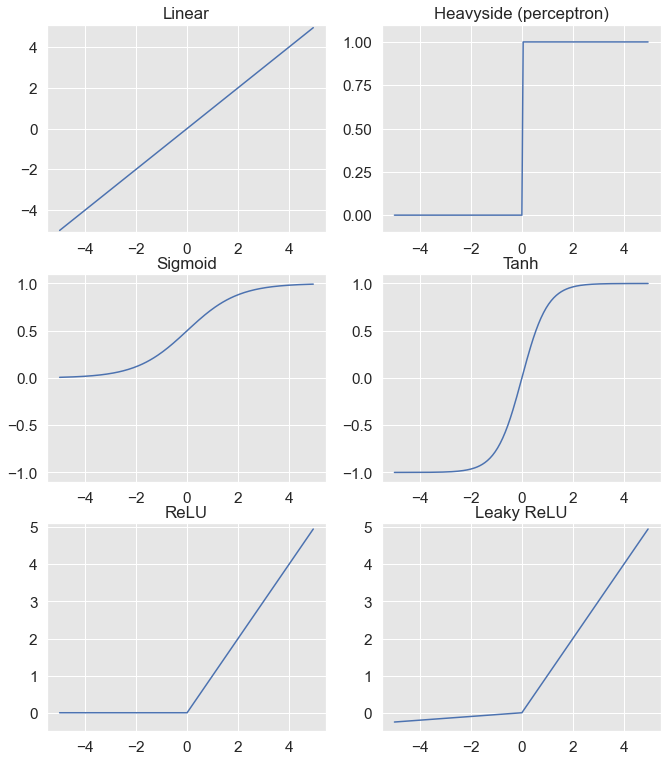

In [428]:
fig_activation

In [429]:
# ReLu for hidden layers:primary choice for hidden layers
# Sigmoid for output layer:ranges b/w 0-1 so can be interpreted as probabilities

In [430]:
class SimpleFraudMLP(torch.nn.Module):
    
        def __init__(self, input_size, hidden_size):
            super(SimpleFraudMLP, self).__init__()
            # parameters
            self.input_size = input_size
            self.hidden_size  = hidden_size
            
            #input to hidden
            self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
            self.relu = torch.nn.ReLU()
            #hidden to output
            self.fc2 = torch.nn.Linear(self.hidden_size, 1)
            self.sigmoid = torch.nn.Sigmoid()
            
        def forward(self, x):
            
            hidden = self.fc1(x)
            relu = self.relu(hidden)
            output = self.fc2(relu)
            output = self.sigmoid(output)
            
            return output

In [431]:
model = SimpleFraudMLP(len(input_features), 1000).to(DEVICE)

In [432]:
criterion = torch.nn.BCELoss().to(DEVICE)

In [433]:
model.eval()

SimpleFraudMLP(
  (fc1): Linear(in_features=15, out_features=1000, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=1000, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [434]:
def evaluate_model(model,generator,criterion):
    model.eval()
    batch_losses = []
    for x_batch, y_batch in generator:
        # Forward pass
        y_pred = model(x_batch)
        # Compute Loss
        loss = criterion(y_pred.squeeze(), y_batch)
        batch_losses.append(loss.item())
    mean_loss = np.mean(batch_losses)    
    return mean_loss
    
evaluate_model(model,testing_generator,criterion)

0.6720746339244001

In [435]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.07)

In [436]:
n_epochs = 150
#Setting the model in training mode
model.train()

#Training loop
start_time=time.time()
epochs_train_losses = []
epochs_test_losses = []
for epoch in range(n_epochs):
    model.train()
    train_loss=[]
    for x_batch, y_batch in training_generator:
        # Removing previously computed gradients
        optimizer.zero_grad()
        # Performing the forward pass on the current batch
        y_pred = model(x_batch)
        # Computing the loss given the current predictions
        loss = criterion(y_pred.squeeze(), y_batch)
        # Computing the gradients over the backward pass
        loss.backward()
        # Performing an optimization step from the current gradients
        optimizer.step()
        # Storing the current step's loss for display purposes
        train_loss.append(loss.item())
    
    #showing last training loss after each epoch
    epochs_train_losses.append(np.mean(train_loss))
    print('Epoch {}: train loss: {}'.format(epoch, np.mean(train_loss)))
    
    #evaluating the model on the test set after each epoch    
    val_loss = evaluate_model(model,testing_generator,criterion)    
    epochs_test_losses.append(val_loss)
    print('test loss: {}'.format(val_loss))   
    print("")
    
training_execution_time=time.time()-start_time

Epoch 0: train loss: 0.1037053480133886
test loss: 0.08909349757767118

Epoch 1: train loss: 0.09237557159323988
test loss: 0.0885631547574246

Epoch 2: train loss: 0.09050170186685062
test loss: 0.09406885837989987

Epoch 3: train loss: 0.08850917737199136
test loss: 0.08875488432343392

Epoch 4: train loss: 0.08733756715098823
test loss: 0.09059369580263235

Epoch 5: train loss: 0.0866159504900376
test loss: 0.09345376160561893

Epoch 6: train loss: 0.08575453127958088
test loss: 0.09097638947195281

Epoch 7: train loss: 0.08488061119415546
test loss: 0.09022257489827919

Epoch 8: train loss: 0.08446132925337309
test loss: 0.08936734393458157

Epoch 9: train loss: 0.08372878832517112
test loss: 0.08995182305693115

Epoch 10: train loss: 0.08312708564237925
test loss: 0.08888366166045707

Epoch 11: train loss: 0.08230579273213305
test loss: 0.08806554653782252

Epoch 12: train loss: 0.08288792498649082
test loss: 0.1119477366343798

Epoch 13: train loss: 0.08157940446685313
test loss:

Epoch 112: train loss: 0.06348989682152409
test loss: 0.1027514682922914

Epoch 113: train loss: 0.06414043552630704
test loss: 0.1355043031028746

Epoch 114: train loss: 0.06359195548631737
test loss: 0.22526180705822565

Epoch 115: train loss: 0.06339658547654138
test loss: 0.10077839795107424

Epoch 116: train loss: 0.06317912914150255
test loss: 0.10146821236669305

Epoch 117: train loss: 0.06371642711565412
test loss: 0.18632940063253045

Epoch 118: train loss: 0.0631536153787695
test loss: 0.10208593467042175

Epoch 119: train loss: 0.06261972918086711
test loss: 0.107512435940318

Epoch 120: train loss: 0.06259314037835159
test loss: 0.10210700188740614

Epoch 121: train loss: 0.06270724088751349
test loss: 0.1019796271144764

Epoch 122: train loss: 0.06243246028744364
test loss: 0.1112688296707347

Epoch 123: train loss: 0.06193915861086431
test loss: 0.10062301412365153

Epoch 124: train loss: 0.06213128876575794
test loss: 0.10333282116577418

Epoch 125: train loss: 0.0622659

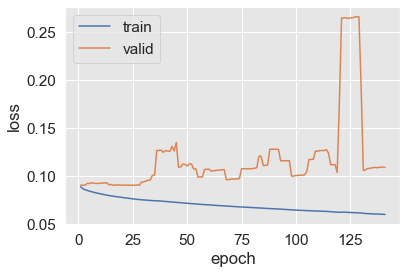

In [437]:
ma_window = 10

plt.plot(np.arange(len(epochs_train_losses)-ma_window + 1)+1, np.convolve(epochs_train_losses, np.ones(ma_window)/ma_window, mode='valid'))
plt.plot(np.arange(len(epochs_test_losses)-ma_window + 1)+1, np.convolve(epochs_test_losses, np.ones(ma_window)/ma_window, mode='valid'))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','valid'])
#plt.ylim([0.01,0.06])

In [438]:
print(training_execution_time)

89.35563206672668


In [439]:
start_time=time.time() 
predictions_test = model(x_test.to(DEVICE))
prediction_execution_time = time.time()-start_time
predictions_train = model(x_train.to(DEVICE))
print("Predictions took", prediction_execution_time,"seconds.")

Predictions took 0.04052996635437012 seconds.


In [440]:
predictions_df=test_df
predictions_df['predictions']=predictions_test.detach().cpu().numpy()
    
performance_assessment(predictions_df, top_k_list=[100])

AUC ROC  Average precision  Card Precision@100
0    0.813              0.669               0.791

In [441]:
delta_valid = delta_test

start_date_training_with_valid = start_date_training+datetime.timedelta(days=-(delta_delay+delta_valid))

(train_df, valid_df)=get_train_test_set(transactions_df,start_date_training_with_valid,
                                       delta_train=delta_train,delta_delay=delta_delay,delta_test=delta_test)

# By default, scales input data
(train_df, valid_df)=scaleData(train_df, valid_df, input_features)

In [442]:
class EarlyStopping:
    
    def __init__(self, patience=2, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = np.Inf
    
    def continue_training(self,current_score):
        if self.best_score > current_score:
            self.best_score = current_score
            self.counter = 0
            if self.verbose:
                print("New best score:", current_score)
        else:
            self.counter+=1
            if self.verbose:
                print(self.counter, " iterations since best score.")
                
        return self.counter <= self.patience        

In [443]:
seed_everything(SEED)

model = SimpleFraudMLP(len(input_features), 1000).to(DEVICE)

def prepare_generators(train_df,valid_df,batch_size=64):
    x_train = torch.FloatTensor(train_df[input_features].values)
    x_valid = torch.FloatTensor(valid_df[input_features].values)
    y_train = torch.FloatTensor(train_df[output_feature].values)
    y_valid = torch.FloatTensor(valid_df[output_feature].values)
    train_loader_params = {'batch_size': batch_size,
              'shuffle': True,
              'num_workers': 0}
    valid_loader_params = {'batch_size': batch_size,
              'num_workers': 0}
    # Generators
    
    training_set = FraudDataset(x_train, y_train)
    valid_set = FraudDataset(x_valid, y_valid)
    
    training_generator = torch.utils.data.DataLoader(training_set, **train_loader_params)
    valid_generator = torch.utils.data.DataLoader(valid_set, **valid_loader_params)
    
    return training_generator,valid_generator

training_generator,valid_generator = prepare_generators(train_df,valid_df,batch_size=64)

criterion = torch.nn.BCELoss().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0005)

In [444]:
def training_loop(model,training_generator,valid_generator,optimizer,criterion,max_epochs=100,apply_early_stopping=True,patience=2,verbose=False):
    #Setting the model in training mode
    model.train()

    if apply_early_stopping:
        early_stopping = EarlyStopping(verbose=verbose,patience=patience)
    
    all_train_losses = []
    all_valid_losses = []
    
    #Training loop
    start_time=time.time()
    for epoch in range(max_epochs):
        model.train()
        train_loss=[]
        for x_batch, y_batch in training_generator:
            optimizer.zero_grad()
            y_pred = model(x_batch)
            loss = criterion(y_pred.squeeze(), y_batch)
            loss.backward()
            optimizer.step()   
            train_loss.append(loss.item())
        
        #showing last training loss after each epoch
        all_train_losses.append(np.mean(train_loss))
        if verbose:
            print('')
            print('Epoch {}: train loss: {}'.format(epoch, np.mean(train_loss)))
        #evaluating the model on the test set after each epoch    
        valid_loss = evaluate_model(model,valid_generator,criterion)
        all_valid_losses.append(valid_loss)
        if verbose:
            print('valid loss: {}'.format(valid_loss))
        if apply_early_stopping:
            if not early_stopping.continue_training(valid_loss):
                if verbose:
                    print("Early stopping")
                break
        
    training_execution_time=time.time()-start_time
    return model,training_execution_time,all_train_losses,all_valid_losses

model,training_execution_time,train_losses,valid_losses = training_loop(model,training_generator,valid_generator,optimizer,criterion,max_epochs=500,verbose=True)


Epoch 0: train loss: 0.2462637474782813
valid loss: 0.16413915828790193
New best score: 0.16413915828790193

Epoch 1: train loss: 0.1487072940939946
valid loss: 0.1364693036785832
New best score: 0.1364693036785832

Epoch 2: train loss: 0.13241951456715617
valid loss: 0.1276103210118082
New best score: 0.1276103210118082

Epoch 3: train loss: 0.1256727323342704
valid loss: 0.12315647704181848
New best score: 0.12315647704181848

Epoch 4: train loss: 0.12158155077198222
valid loss: 0.12021220186150368
New best score: 0.12021220186150368

Epoch 5: train loss: 0.11873917862476573
valid loss: 0.11806687031079222
New best score: 0.11806687031079222

Epoch 6: train loss: 0.11643859841253447
valid loss: 0.11634988861135495
New best score: 0.11634988861135495

Epoch 7: train loss: 0.11455790081494777
valid loss: 0.11493856755119783
New best score: 0.11493856755119783

Epoch 8: train loss: 0.113049909438004
valid loss: 0.11375023574556833
New best score: 0.11375023574556833

Epoch 9: train los


Epoch 75: train loss: 0.09138110478362974
valid loss: 0.09735406984425621
New best score: 0.09735406984425621

Epoch 76: train loss: 0.0912995552428749
valid loss: 0.09728259725473178
New best score: 0.09728259725473178

Epoch 77: train loss: 0.09118594215609044
valid loss: 0.09720761755044445
New best score: 0.09720761755044445

Epoch 78: train loss: 0.0911803189027541
valid loss: 0.09713428151092411
New best score: 0.09713428151092411

Epoch 79: train loss: 0.09103565807493057
valid loss: 0.09706692552814881
New best score: 0.09706692552814881

Epoch 80: train loss: 0.09089819932051492
valid loss: 0.09699967091926086
New best score: 0.09699967091926086

Epoch 81: train loss: 0.09085094286120263
valid loss: 0.09693138065437476
New best score: 0.09693138065437476

Epoch 82: train loss: 0.09070914185965205
valid loss: 0.09686544625617471
New best score: 0.09686544625617471

Epoch 83: train loss: 0.09062083126851302
valid loss: 0.09680167704728651
New best score: 0.09680167704728651

Ep


Epoch 149: train loss: 0.08659638808376804
valid loss: 0.09416528821313455
New best score: 0.09416528821313455

Epoch 150: train loss: 0.0866735998436009
valid loss: 0.0941336531927924
New best score: 0.0941336531927924

Epoch 151: train loss: 0.08650843393588292
valid loss: 0.09411675876673357
New best score: 0.09411675876673357

Epoch 152: train loss: 0.08650360285036549
valid loss: 0.09411450794173612
New best score: 0.09411450794173612

Epoch 153: train loss: 0.08648337721979722
valid loss: 0.09407535724939756
New best score: 0.09407535724939756

Epoch 154: train loss: 0.08641565338580091
valid loss: 0.09405098015695443
New best score: 0.09405098015695443

Epoch 155: train loss: 0.08636277730539647
valid loss: 0.09402059952234045
New best score: 0.09402059952234045

Epoch 156: train loss: 0.08632688849792229
valid loss: 0.0940005154337412
New best score: 0.0940005154337412

Epoch 157: train loss: 0.08628535499429256
valid loss: 0.09397712690916694
New best score: 0.093977126909166

In [445]:
seed_everything(SEED)
model = SimpleFraudMLP(len(input_features), 1000).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0005)
model,training_execution_time,train_losses_adam,valid_losses_adam = training_loop(model,training_generator,valid_generator,optimizer,criterion,verbose=True)


Epoch 0: train loss: 0.10437140441142112
valid loss: 0.09560179540680515
New best score: 0.09560179540680515

Epoch 1: train loss: 0.08375686691396772
valid loss: 0.094609989322446
New best score: 0.094609989322446

Epoch 2: train loss: 0.08055318558069978
valid loss: 0.09275378181518595
New best score: 0.09275378181518595

Epoch 3: train loss: 0.07876660319942909
valid loss: 0.09375448765026198
1  iterations since best score.

Epoch 4: train loss: 0.07702484631232029
valid loss: 0.09523567510423837
2  iterations since best score.

Epoch 5: train loss: 0.07606484110929781
valid loss: 0.09551991334897869
3  iterations since best score.
Early stopping


(0.01, 0.06)

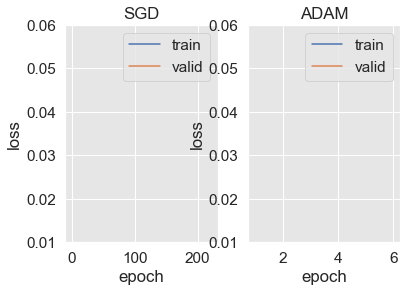

In [446]:
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(train_losses))+1, train_losses)
plt.plot(np.arange(len(valid_losses))+1, valid_losses)
plt.title("SGD")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','valid'])
plt.ylim([0.01,0.06])

plt.subplot(1, 2, 2) 
plt.plot(np.arange(len(train_losses_adam))+1, train_losses_adam)
plt.plot(np.arange(len(valid_losses_adam))+1, valid_losses_adam)
plt.title("ADAM")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','valid'])
plt.ylim([0.01,0.06])

In [447]:
class SimpleFraudMLPWithDropout(torch.nn.Module):
    
        def __init__(self, input_size, hidden_size,p):
            super(SimpleFraudMLPWithDropout, self).__init__()
            # parameters
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.p = p
            
            #input to hidden
            self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
            self.relu = torch.nn.ReLU()
            #hidden to output
            self.fc2 = torch.nn.Linear(self.hidden_size, 1)
            self.sigmoid = torch.nn.Sigmoid()
            
            self.dropout = torch.nn.Dropout(self.p)
            
        def forward(self, x):
            
            hidden = self.fc1(x)
            hidden = self.relu(hidden)
            
            hidden = self.dropout(hidden)
            
            output = self.fc2(hidden)
            output = self.sigmoid(output)
            
            return output

In [448]:
seed_everything(SEED)
model = SimpleFraudMLPWithDropout(len(input_features), 1000,0.2).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0005)
model,training_execution_time,train_losses_dropout,valid_losses_dropout = training_loop(model,training_generator,valid_generator,optimizer,criterion,verbose=False)

In [450]:
plt.plot(np.arange(len(train_losses_adam))+1, train_losses_adam)
plt.plot(np.arange(len(valid_losses_adam))+1, valid_losses_adam)
plt.plot(np.arange(len(train_losses_dropout))+1, train_losses_dropout)
plt.plot(np.arange(len(valid_losses_dropout))+1, valid_losses_dropout)
plt.title("Dropout effect")
plt.xlabel('epoch')
plt.ylabel('loss')(train_df, valid_df)=get_train_test_set(transactions_df,start_date_training_with_valid,
                                       delta_train=delta_train,delta_delay=delta_delay,delta_test=delta_test)

SyntaxError: cannot assign to function call (2651905138.py, line 7)

In [451]:
(train_df, valid_df)=get_train_test_set(transactions_df,start_date_training_with_valid,
                                       delta_train=delta_train,delta_delay=delta_delay,delta_test=delta_test)

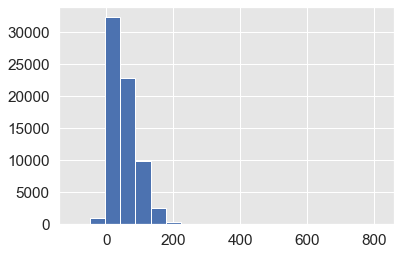

In [452]:
_ = plt.hist(train_df['TX_AMOUNT'].values,bins=20)